# Configure KBase Jupyter Dev Environment

In [2]:
%run agoracommutil.py
logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)

python version 3.11.13
KBBaseModules 0.0.1
modelseedpy 0.3.3
cobrakbase 0.4.0
Output files printed to:/Users/andrewfreiburger/Documents/Research/MicrobiomeNotebooks/NewWesternDiet/nboutput when using KBDevUtils.output_dir


# Getting PATRIC 16s list

In [6]:
gene_ids = {}
with open('data/16s_RNA_PATRIC.frn', 'r') as file:
    content = file.read()
lines = content.split('\n')
for line in lines:
    if line.startswith('>'):
        array = line.split(' ')
        gene_id = array[0][1:]
        gene_ids[gene_id] = None

util.save("16s_genes", gene_ids)

# Getting PATRIC 16s md5

In [ ]:
import requests
from tqdm import tqdm

genes = util.load("16s_genes")

gene_list = []
key_list = genes.keys()
count = 0
for i,gene_id in tqdm(enumerate(key_list)):
    if genes[gene_id] is None:
        gene_list.append(gene_id)
    if len(gene_list) >= 100:
        query = ",".join(gene_list)
        url = f'https://www.patricbrc.org/api/genome_feature/?in(patric_id,({query}))&select(patric_id,na_sequence_md5)&http_accept=application/json'
        response = requests.get(url)
        # Check if the request was successful
        if response.status_code == 200:
            # Parse the JSON response
            data = response.json()
            for i,gene in enumerate(data):
                if 'na_sequence_md5' in data[i]:
                    # print(data[i]['patric_id'])
                    genes[data[i]['patric_id']] = data[i]['na_sequence_md5']
            util.save("16s_genes",genes)
        else:
            count += 1
            print("Failed",count)
        gene_list = []
        print(count, end="\r")
if len(gene_list) > 0:
    query = ",".join(gene_list)
    url = f'https://www.patricbrc.org/api/genome_feature/?in(patric_id,({query}))&select(patric_id,na_sequence_md5)&http_accept=application/json'
    response = requests.get(url)
    # Check if the request was successful
    if response.status_code == 200:
        # Parse the JSON response
        data = response.json()
        for i,gene in enumerate(data):
            if 'na_sequence_md5' in data[i]:
                genes[data[i]['patric_id']] = data[i]['na_sequence_md5']
        util.save("16s_genes",genes)


fig|1507512.3.rna.287
fig|1163399.19.rna.5
fig|1352.9104.rna.15
fig|492670.18.rna.7
fig|485.681.rna.37
fig|562.8523.rna.5
fig|1352.9118.rna.23
fig|1115758.5.rna.17
fig|1288.88.rna.77
fig|1352.9096.rna.6
fig|1163399.19.rna.111
fig|1352.9101.rna.6
fig|492670.18.rna.18
fig|1280.3628.rna.61
fig|1352.9112.rna.4
fig|1352.9100.rna.29
fig|1322347.4.rna.47
fig|1352.9114.rna.22
fig|1115758.5.rna.9
fig|1507512.3.rna.94
fig|1507512.3.rna.294
fig|1163399.19.rna.106
fig|1115758.5.rna.413
fig|1352.9116.rna.7
fig|492670.18.rna.47
fig|69.24.rna.53
fig|2013114.3.rna.16
fig|2019568.3.rna.64
fig|29388.40.rna.64
fig|1496.840.rna.124
fig|451.7.rna.16
fig|1429399.3.rna.23
fig|69.24.rna.60
fig|1629663.3.rna.44
fig|86622.3.rna.15
fig|1681.23.rna.22
fig|451.7.rna.52
fig|1537.3.rna.319
fig|37636.39.rna.32
fig|29388.41.rna.44
fig|1537.3.rna.334
fig|2013114.3.rna.35
fig|1537.3.rna.19
fig|244366.23.rna.117
fig|987066.3.rna.36
fig|1255669.3.rna.44
fig|449.5.rna.43
fig|216816.126.rna.23
fig|1685.8.rna.20
fig|1537.3.r

In [11]:
print(len(genes))
print(list(genes.items())[-2:])

412548
[('fig|1173951.3.rna.34', 'c3395c3dcf55bb44661b3520d78aea26'), ('fig|1173951.3.rna.70', '9059b5d6818c0b63ff94c474c9c6fe1d')]


In [12]:
md5_seqs = {}
genes = util.load("16s_genes")
for gene_id in genes:
    if genes[gene_id] is not None:
        md5_seqs[genes[gene_id]] = None
util.save("md5_seqs",md5_seqs)

# Downloading 16s sequences from PATRIC

In [4]:
import requests
from tqdm import tqdm

md5_seqs = util.load("md5_seqs")
failed = []
for i,md5 in tqdm(enumerate(md5_seqs), total=len(md5_seqs)):
    if md5_seqs[md5] is not None:
        continue
    url = f'https://www.patricbrc.org/api/feature_sequence/?eq(md5,({md5}))&select(sequence)&http_accept=application/json'
    response = requests.get(url)
    # Check if the request was successful
    if response.status_code == 200:
        # Parse the JSON response
        data = response.json()
        if len(data) == 0:
            failed.append(md5)
            continue
        md5_seqs[md5] = data[0]['sequence']
        # if 
        # util.save("md5_seqs",md5_seqs)
    else:
        failed.append(md5)
    if i%100 == 0:
        util.save("md5_seqs",md5_seqs)
print(f"Failed to retrieve data for {failed}")

100%|██████████| 44912/44912 [2:20:50<00:00,  5.31it/s]   

Failed to retrieve data for ['1d0d7dfa2b2699ce934b44c9c229b9c6', 'be6b80df9306e35dbe8f783541f3c440', '8b90a1df3d825db8ba2106d0115b9376', '385c1d6e15020c060f9c7cc2f4bcf79c', '4c524b2bd420dde1651aadcf0dc643f3', '3ca114b8b2e9581a9139a985da271653', '48cd7555309a71a8fadbbc0ee6789506', '1aa60c49fb983843f6475387e76b625a', '04fa6a5f349465bc2688ee340cd50e9a', '73c7f3d52b77d637315353ce958b4deb', '1f631e46265e03b4cef1fdcc9aff2048', '7ae871d8c95ddbb8fdbfa9a4fbfc9ede', 'bf31ab146321381035a30e633c55b1be', 'c2a9c8118b595922f970cf7c5d50175f', 'fda48b5b03274253caa69b9bd4ad7edc', 'bcfb568e4bca4167def4044bfe1a7ad1', 'b9afcd530a8b986e623fd4703b88e53f', '78cec9212f5a1d0519264cc238e90f22', '7bdb7cf5d942ff0084d80807e4b115e8', 'f081258f336b56a55b22607ebde90e65', 'c949b0484fdab9911829fc9cf0a2f3e8', '5e9b8dbc995003ab7fcf783e03ebc3a7', '61a9279662b782650fba44dd18371634', '10c07ffd221537ea1aa945ef2f68b0ef', '1ccd5b2989d74ac410acfb75f425b2b2', '1e8a8b066a182c9048cf570e24dfe37b', '42d5c19db3775b5b124aafe76f32a4a1',

In [ ]:
# import requests
# from tqdm import tqdm

# md5_seqs = util.load("md5_seqs")
# md5s = md5_seqs.keys()
# md5_list = []
# for i,md5 in tqdm(enumerate(md5s)):
#     md5_list.append(md5)
#     if len(md5_list) >= 500:
#         query = ",".join(md5_list)
#         url = f'https://www.patricbrc.org/api/feature_sequence/?eq(md5,({md5_list}))&select(sequence)&http_accept=application/json'
#         response = requests.get(url)
#         # Check if the request was successful
#         if response.status_code == 200:
#             # Parse the JSON response
#             data = response.json()
#             for i,item in enumerate(data):
#                 if 'sequence' in item:
#                     md5_seqs[item['md5']] = item['sequence']
#             util.save("md5_seqs",md5_seqs)
#         else:
#             print(f"Failed to retrieve data for {md5_list}")
#         md5_list = []
# if len(md5_list) > 0:
#     query = ",".join(md5_list)
#     url = f'https://www.patricbrc.org/api/feature_sequence/?eq(md5,({md5_list}))&select(sequence)&http_accept=application/json'
#     response = requests.get(url)
#     # Check if the request was successful
#     if response.status_code == 200:
#         # Parse the JSON response
#         data = response.json()
#         for i,item in enumerate(data):
#             if 'sequence' in item:
#                 md5_seqs[item['md5']] = item['sequence']
#         util.save("md5_seqs",md5_seqs)

Failed to retrieve data for ['ef7e4cc6bccf26212aa084de6f392e2e', '057ec877093ba94e19f8d79318c08a25', '73eedb88b86ad3c8a30a011ff5d59b71', '9e1e82fe7435c1457331383264c3131d', '4fda668808a6da7ce9889a28ef4c20c9', 'a62912ea3c80aad150e669ede85015e9', 'fb276ac758cad7edfc104d0bd1d1810a', 'c6caafd593e29c34c8590d4483fe6a52', '29756b54f563ecddef3a645ccdc17862', '2e108b021fe00a7b89a8831a06b2749e', '4a1de5069084ea53c3bfe9d724fa521c', 'b0d54df346664e6242774a7738423890', 'b7d55bfff03a282dae90f7f9c1f1f167', '596a4830382d3f4f6059af4f61b644e2', '0b4e65b81144ab20244f1ec0144a5a66', '7f18086eecc5c523d0e78fd36f5da3bc', '181aef4ec1d07c1258b4365fea71b811', '9831a0725107ff9dc6ac91f5c3e4df14', '5cb2855f3fcca1eec7271b4a3448f2e0', '07eee64b0010b5ad7a75321515e7decb', '5c3d336caba19c98d7a69a03f15d69a7', '359380e06374984f9d9f9e8ff44f0bc9', 'eab2b7280aa777afd34d0de8429e4375', '0cec7e0acbfa80b9c1e3198cc9a9a7ce', 'abb6eb48747091914e6fef5ef78009e4', '994f56178a58d5b7efc8eadd59a090db', '71a520ba44d62ec03ef1158df7a51503',

KeyboardInterrupt: 

# 

In [22]:
[x for k, x in md5_seqs.items() if x is not None]

[]

In [ ]:
import requests

# Replace 'gene_id' with your PATRIC gene ID
md5_id = 'c3395c3dcf55bb44661b3520d78aea26'

# Define the URL for the PATRIC API
url = f'https://www.patricbrc.org/api/feature_sequence/?eq(md5,{md5_id})&select(sequence)&http_accept=application/json'
# Send a GET request to the PATRIC API
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON response
    data = response.json()

    # Get the gene sequence
    gene_sequence = data[0]['sequence']

    print(gene_sequence)
else:
    print('Failed to get gene sequence')

aaattgaagagtttgatcatggctcagattgaacgctggcggcaggcctaacacatgcaagtcgaacggtaacaggaagcagcttgctgcttcgctgacgagtggcggacgggtgagtaatgtctgggaaactgcctgatgg


# Blasting ASVs against PATRIC database

In [ ]:
import requests

# Replace 'gene_id' with your PATRIC gene ID
md5_id = 'c3395c3dcf55bb44661b3520d78aea26'

# Define the URL for the PATRIC API
url = f'https://www.patricbrc.org/api/feature_sequence/?eq(md5,{md5_id})&select(sequence)&http_accept=application/json'
# Send a GET request to the PATRIC API
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON response
    data = response.json()

    # Get the gene sequence
    gene_sequence = data[0]['sequence']

    print(gene_sequence)
else:
    print('Failed to get gene sequence')

# Loading Clade Mapping Data
# DONE

In [ ]:
from pandas import read_excel
mag_taxa = read_excel("MAGs_toKBase_formodels.xlsx")
genera_to_track = ["Planktophila", "Methylopumilus", "Polynucleobacter", "Pirellula_B", "UBA3064", "UBA954"]
clade_mag_mapping = {"other":[]}
for index, row in mag_taxa.iterrows():
    if not isinstance(row["classification"], str):  continue
    found = False
    for genus in genera_to_track:
        if genus not in clade_mag_mapping:
            clade_mag_mapping[genus] = []
        if genus in row["classification"]:
            clade_mag_mapping[genus].append(row["user_genome"])
            found = True
            break
    if not found:
        clade_mag_mapping["other"].append(row["user_genome"])
util.kbdevutil.save("clade_mag_mapping", clade_mag_mapping)


# Pulling genomes and getting functions hash from all genomes
# DONE

In [ ]:
clade_mag_mapping = util.kbdevutil.load("clade_mag_mapping")
mag_list = {}
mag_refs = {}
primary_mags = util.msrecon.kbase_api.list_objects(106947, object_type="KBaseGenomes.Genome")
for mag in primary_mags:
    if mag[1][-5:] == ".RAST":
        name = mag[1][0:-5]
        mag_refs[name] = mag
        mag_list[name] = "primary"
other_mags = util.msrecon.kbase_api.list_objects(145226, object_type="KBaseGenomes.Genome")
for mag in other_mags:
    if mag[1][-5:] == ".RAST":
        name = mag[1][0:-5]
        if name not in mag_refs:
            mag_refs[name] = mag
            mag_list[name] = "secondary"
#Checking if mag is missing
allcount = 0
primcount = 0
for clade in clade_mag_mapping:
    for mag in clade_mag_mapping[clade]:
        allcount += 1
        newmag = mag.replace(".","_")+"_mag"
        if newmag in mag_refs:
            primcount += 1
            mag_refs[mag] = mag_refs[newmag]
        elif mag not in mag_refs:
            print("Missing mag: ", mag)
util.kbdevutil.save("mag_refs", mag_refs)
util.kbdevutil.save("mag_list", mag_list)
print("All",allcount)
print("Primary",primcount)

All 3825
Primary 2093


# Creating clade genomes and computing function probabilities
# DONE

In [ ]:
#Downloading genomes for each mag to make clade genome construction faster
clade_mag_mapping = util.kbdevutil.load("clade_mag_mapping")
mag_refs = util.kbdevutil.load("mag_refs")
for clade in clade_mag_mapping:
    for mag in clade_mag_mapping[clade]:
        if mag in mag_refs:
            ref = mag_refs[mag]
            genome = util.msrecon.kbase_api.get_object(ref[1],ref[6])
            util.kbdevutil.save(mag,genome)

In [ ]:
#Now building clade genome objects and saving to file (will be loaded to KBase)
from cobrakbase.core.kbasegenome.genome import KBaseGenome
clade_mag_mapping = util.kbdevutil.load("clade_mag_mapping")
mag_refs = util.kbdevutil.load("mag_refs")
functions = {}
features = {}
feature_aliases = {}
feature_probabilities = {}
for clade in clade_mag_mapping:
    #Loading template genome
    with open("TemplateGenome.json", 'r') as f:
        template_genome = json.load(f)
    #Setting metadata
    template_genome["dna_size"] = 0
    template_genome["gc_content"] = 0.5
    template_genome["id"] = "GROW_"+clade
    template_genome["contig_ids"] = []
    template_genome["contig_lengths"] = []
    template_genome["num_contigs"] = 0
    template_genome["ontologies_present"] = {}
    template_genome["ontology_events"] = []
    template_genome["source"] = "GROW"
    template_genome["warnings"] = ["Artificial genome created to support clade modeling"]
    template_genome["features"] = []
    template_genome["cdss"] = []
    template_genome["source_id"] = "GROW"
    template_genome["molecule_type"] = "CladeGenome"
    template_genome["domain"] = "Bacteria"
    md5_list = []
    if clade not in functions:
        functions[clade] = {}
    for mag in clade_mag_mapping[clade]:
        if mag in mag_refs:
            ref = mag_refs[mag]
            genome = util.kbdevutil.load(mag)
            genome_functions = {}
            for ftr in genome["features"]:
                if "functions" in ftr:
                    for function in ftr["functions"]:
                        if function not in functions[clade]:
                            ftrid = clade+"_"+str(len(template_genome["contig_ids"])+1)
                            template_genome["contig_ids"].append(ftrid+".contig")
                            template_genome["contig_lengths"].append(len(ftr["dna_sequence"]))
                            template_genome["num_contigs"] += 1
                            template_genome["dna_size"] += len(ftr["dna_sequence"])
                            result = hashlib.md5(ftr["protein_translation"].encode())
                            md5 = result.hexdigest()
                            result = hashlib.md5(ftr["dna_sequence"].encode())
                            dnamd5 = result.hexdigest()
                            md5_list.append(md5)
                            functions[clade][function] = {"ftrid":ftrid, "probability":1}
                            features[ftrid] = {
                                "aliases": [],
                                "cdss": [
                                    ftrid+".CDS"
                                ],
                                "functions":[function],
                                "dna_sequence": ftr["dna_sequence"],
                                "dna_sequence_length": len(ftr["dna_sequence"]),
                                "id": ftrid,
                                "location": [
                                    [
                                        ftrid+".contig",
                                        1,
                                        "+",
                                        len(ftr["dna_sequence"])
                                    ]
                                ],
                                "md5": dnamd5,
                                "ontology_terms": {},
                                "protein_md5": md5,
                                "protein_translation": ftr["protein_translation"],
                                "protein_translation_length": len(ftr["protein_translation"]),
                                "warnings": []
                            }
                            cdsftr = features[ftrid].copy()
                            cdsftr["id"] = ftrid+".CDS"
                            cdsftr["parent_gene"] = ftrid
                            if "aliases" in ftr and len(ftr["aliases"]) >= 1:
                                features[ftrid]["aliases"].append(["gene",ftr["aliases"][0][1]])
                                if ftrid not in feature_aliases:
                                    feature_aliases[ftrid] = []
                                feature_aliases[ftrid].append([ftr["aliases"][0][1]])
                            template_genome["features"].append(features[ftrid])
                            template_genome["cdss"].append(cdsftr)
                        elif function not in genome_functions:#Don't want to count same function twice in a genome
                            ftrid = functions[clade][function]["ftrid"]
                            functions[clade][function]["probability"] += 1
                            if "aliases" in ftr and len(ftr["aliases"]) >= 1:
                                features[ftrid]["aliases"].append(["gene",ftr["aliases"][0][1]])
                                if ftrid not in feature_aliases:
                                    feature_aliases[ftrid] = []
                                feature_aliases[ftrid].append(ftr["aliases"][0][1])
                        genome_functions[function] = True
    for func in functions[clade]:
        functions[clade][func]["probability"] = functions[clade][func]["probability"]/len(clade_mag_mapping[clade])
        feature_probabilities[functions[clade][func]["ftrid"]] = functions[clade][func]["probability"]
    template_genome["feature_counts"] = {
        "CDS":len(template_genome["features"]),
        "gene":len(template_genome["features"]),
        "non_coding_features":0,
        "protein_encoding_gene":len(template_genome["features"])
    }                    
    md5_list.sort()
    result = hashlib.md5(";".join(md5_list).encode())
    template_genome["md5"] = result.hexdigest()
    #Writing FASTA
    ofile = open("Assemblies/"+clade+".fasta", "w")
    for func in functions[clade]:
        ofile.write(">" + functions[clade][func]["ftrid"] + "\n" +features[functions[clade][func]["ftrid"]]["dna_sequence"] + "\n")
    ofile.close()
    #Saving genome
    util.kbdevutil.save(clade+"_genome", template_genome)
util.kbdevutil.save("feature_aliases", feature_aliases)
util.kbdevutil.save("functions", functions)
util.kbdevutil.save("feature_probabilities", feature_probabilities)

# Loading assemblies to KBase
# DONE

In [ ]:
#Loading clade genome assemblies to KBase using SDK callbacks
afu = util.kbdevutil.afu_client()
#UBA954.fasta
clade_list = ["other","Planktophila","Methylopumilus","Polynucleobacter","Pirellula_B","UBA3064"]
for clade in clade_list:
    params = {
        'file': {
            'path': '/kb/module/work/tmp/'+clade+".fasta"
        },
        'workspace_id': 174284,
        'assembly_name': clade+".assembly"
    }
    result = afu.save_assembly_from_fasta2(params)

# Saving genomes to KBase
# DONE

In [ ]:
#Loading clade genomes to KBase using annotation API, which contains an SDK callback
from datetime import datetime
now = datetime.now()
timestamp = datetime.timestamp(now)
clade_list = ["UBA954","other","Planktophila","Methylopumilus","Polynucleobacter","Pirellula_B","UBA3064"]
anno = util.kbdevutil.anno_client()
anno.clients["GenomeFileUtil"] = util.kbdevutil.gfu_client()
for clade in clade_list:
    genome = util.kbdevutil.load(clade+"_genome")
    events = [{
        "id": "SSO",
        "event_id":"RAST:SSO:"+str(timestamp),
        "description": "RAST annotation of clade genome",
        "ontology_id": "SSO",
        "method": "RAST",
        "method_version": "1.9.5",
        "timestamp": str(timestamp),
        "ontology_terms": {},
    }]
    for ftr in genome["features"]:
        events[0]["ontology_terms"][ftr["id"]] = [{"term":"SSO:"+ftr["functions"][0]}]
    output = anno.add_annotation_ontology_events({
        "output_workspace":174284,
        "events":events,
        "overwrite_matching":True,
        "object":genome,
        "type":"KBaseGenomes.Genome",
        "output_name":clade+".genome",
        "save":1
    })

# Construct the clade models
# DONE

In [ ]:
#"UBA954",
clade_list = ["other","Planktophila","Methylopumilus","Polynucleobacter","Pirellula_B","UBA3064"]
for clade in clade_list:
    util.msrecon.build_metabolic_models({
        "workspace":174284,
        "genome_refs":["174284/"+clade+".genome"],
        "run_gapfilling":True,
        "atp_safe":True,
        "forced_atp_list":[],
        "gapfilling_media_list":None,
        "suffix":".mdl",
        "core_template":"auto",
        "gs_template":"auto",
        "gs_template_ref":None,
        "core_template_ref":None,
        "template_reactions_only":True,
        "output_core_models":False,
        "automated_atp_evaluation":True,
        "atp_medias":[],
        "load_default_medias":True,
        "max_gapfilling":5,
        "gapfilling_delta":0,
        "return_model_objects":False,
        "return_data":False,
        "save_report_to_kbase":False,
        "change_to_complete":False,
        "gapfilling_mode":"Cumulative",
        "base_media":None,
        "compound_list":None,
        "base_media_target_element":"C"
    })

/opt/env/python3_modelseed/lib/python3.11/site-packages/urllib3/util/ssl_.py:262: DeprecationWarning: ssl.PROTOCOL_TLS is deprecated
  context = SSLContext(ssl_version or ssl.PROTOCOL_SSLv23)
/opt/env/python3_modelseed/lib/python3.11/site-packages/urllib3/connection.py:374: DeprecationWarning: ssl.match_hostname() is deprecated
  match_hostname(cert, asserted_hostname)
/opt/env/python3_modelseed/lib/python3.11/site-packages/urllib3/util/ssl_.py:262: DeprecationWarning: ssl.PROTOCOL_TLS is deprecated
  context = SSLContext(ssl_version or ssl.PROTOCOL_SSLv23)
/opt/env/python3_modelseed/lib/python3.11/site-packages/urllib3/connection.py:374: DeprecationWarning: ssl.match_hostname() is deprecated
  match_hostname(cert, asserted_hostname)


N


/opt/env/python3_modelseed/lib/python3.11/site-packages/urllib3/util/ssl_.py:262: DeprecationWarning: ssl.PROTOCOL_TLS is deprecated
  context = SSLContext(ssl_version or ssl.PROTOCOL_SSLv23)
/opt/env/python3_modelseed/lib/python3.11/site-packages/urllib3/connection.py:374: DeprecationWarning: ssl.match_hostname() is deprecated
  match_hostname(cert, asserted_hostname)
1710772440.7858362 INFO: The current solver interface glpk doesn't support setting the optimality tolerance.
1710772547.7780695 INFO: The current solver interface glpk doesn't support setting the optimality tolerance.
1710772636.7279124 INFO: Compartment `e0` sounds like an external compartment. Using this one without counting boundary reactions.
1710772636.835424 INFO: Compartment `e0` sounds like an external compartment. Using this one without counting boundary reactions.
1710772636.9265068 INFO: Compartment `e0` sounds like an external compartment. Using this one without counting boundary reactions.
1710772637.0251577

Removing ungapfillable media Etho


1710772796.8349624 INFO: Objective with gapfill database:0.0; min objective:0.01
1710772797.1610184 INFO: The current solver interface glpk doesn't support setting the optimality tolerance.
1710772903.9313705 WARNING: No gapfilling solution found before filtering for mal-L activating rxn00062_c0
1710772904.067492 INFO: Objective with gapfill database:1.0000000000000036; min objective:0.01


Removing ungapfillable media mal-L


1710772904.1781723 INFO: Objective with gapfill database:5.000000000000005; min objective:0.01
1710772904.2884247 INFO: Objective with gapfill database:0.9999999999999993; min objective:0.01
1710772904.3965786 INFO: Objective with gapfill database:1.0000000000000036; min objective:0.01
1710772904.5053809 INFO: Objective with gapfill database:0.0; min objective:0.01
1710772904.8299124 INFO: The current solver interface glpk doesn't support setting the optimality tolerance.
1710772965.4247491 WARNING: No gapfilling solution found before filtering for empty activating rxn00062_c0
1710772965.565451 INFO: Objective with gapfill database:0.0; min objective:0.01


Removing ungapfillable media empty


1710772965.8979495 INFO: The current solver interface glpk doesn't support setting the optimality tolerance.
1710773084.1467848 WARNING: No gapfilling solution found before filtering for ANME activating rxn00062_c0
1710773084.2896948 INFO: Objective with gapfill database:0.5000000000000008; min objective:0.01


Removing ungapfillable media ANME


1710773084.3984883 INFO: Objective with gapfill database:0.5000000000000007; min objective:0.01
1710773084.5086753 INFO: Objective with gapfill database:0.5000000000000006; min objective:0.01
1710773084.6170697 INFO: Objective with gapfill database:1.0000000000000049; min objective:0.01
1710773084.724543 INFO: Objective with gapfill database:1.500000000000009; min objective:0.01
1710773084.8821797 INFO: Objective with gapfill database:19.125000000000107; min objective:0.01
1710773085.217814 INFO: Succ.O2/rxn00062_c0:rxn09269_c0> needed:5.750218040912325e-15 with min obj:2
1710773085.389841 INFO: Objective with gapfill database:0.3333333333333441; min objective:0.01


Adding gapfilling {'growth': 0, 'media': <modelseedpy.core.msmedia.MSMedia object at 0x7f3df1ad6c90>, 'target': 'rxn00062_c0', 'minobjective': 2, 'binary_check': False, 'new': {'rxn09269_c0': '>'}, 'reversed': {}}


1710773085.7037265 INFO: Ac/rxn00062_c0:rxn03020_c0> needed:1.7970150202126656e-16 with min obj:0.01
1710773085.7126248 INFO: Ac/rxn00062_c0:rxn15961_c0> needed:0.0 with min obj:0.01
1710773085.931435 INFO: Objective with gapfill database:1.3333333333333486; min objective:0.01


Adding gapfilling {'growth': 0, 'media': <modelseedpy.core.msmedia.MSMedia object at 0x7f3df1a8b5d0>, 'target': 'rxn00062_c0', 'minobjective': 0.01, 'binary_check': False, 'new': {'rxn03020_c0': '>', 'rxn15961_c0': '>'}, 'reversed': {}}


1710773086.222785 INFO: Succ/rxn00062_c0:rxn09269_c0> needed:3.593886275570203e-16 with min obj:0.01
1710773086.443656 INFO: Objective with gapfill database:0.33333333333333526; min objective:0.01


Adding gapfilling {'growth': 0, 'media': <modelseedpy.core.msmedia.MSMedia object at 0x7f3df1a89190>, 'target': 'rxn00062_c0', 'minobjective': 0.01, 'binary_check': False, 'new': {'rxn09269_c0': '>'}, 'reversed': {}}


1710773086.7272015 INFO: For/rxn00062_c0:rxn03020_c0> needed:0.0 with min obj:0.01
1710773086.7359908 INFO: For/rxn00062_c0:rxn15961_c0> needed:0.0 with min obj:0.01
1710773086.956974 INFO: Objective with gapfill database:2.125000000000031; min objective:0.01


Adding gapfilling {'growth': 0, 'media': <modelseedpy.core.msmedia.MSMedia object at 0x7f3df1a2fad0>, 'target': 'rxn00062_c0', 'minobjective': 0.01, 'binary_check': False, 'new': {'rxn03020_c0': '>', 'rxn15961_c0': '>'}, 'reversed': {}}


1710773087.4553406 INFO: Objective with gapfill database:1.0000000000000053; min objective:0.01


Adding gapfilling {'growth': 0, 'media': <modelseedpy.core.msmedia.MSMedia object at 0x7f3df1a2cc90>, 'target': 'rxn00062_c0', 'minobjective': 1.5, 'binary_check': False, 'new': {}, 'reversed': {}}


1710773087.7880778 INFO: For.NO/rxn00062_c0:rxn15962_c0< needed:-1.0782090121276111e-15 with min obj:0.01
1710773087.7967556 INFO: For.NO/rxn00062_c0:rxn40505_c0< needed:0.0 with min obj:0.01
1710773088.0176163 INFO: Objective with gapfill database:5.0000000000000195; min objective:0.01


Adding gapfilling {'growth': 0, 'media': <modelseedpy.core.msmedia.MSMedia object at 0x7f3df1a2c690>, 'target': 'rxn00062_c0', 'minobjective': 0.01, 'binary_check': False, 'new': {'rxn15962_c0': '<', 'rxn40505_c0': '<'}, 'reversed': {}}


1710773088.5143216 INFO: Objective with gapfill database:1.0000000000000002; min objective:0.01


Adding gapfilling {'growth': 0, 'media': <modelseedpy.core.msmedia.MSMedia object at 0x7f3df1bd9cd0>, 'target': 'rxn00062_c0', 'minobjective': 2.5, 'binary_check': False, 'new': {}, 'reversed': {}}


1710773088.7991202 INFO: H2.CO2/rxn00062_c0:rxn03020_c0> needed:0.0 with min obj:0.01
1710773088.808213 INFO: H2.CO2/rxn00062_c0:rxn15961_c0> needed:0.0 with min obj:0.01
1710773089.027513 INFO: Objective with gapfill database:1.0000000000000044; min objective:0.01


Adding gapfilling {'growth': 0, 'media': <modelseedpy.core.msmedia.MSMedia object at 0x7f3df1b61590>, 'target': 'rxn00062_c0', 'minobjective': 0.01, 'binary_check': False, 'new': {'rxn03020_c0': '>', 'rxn15961_c0': '>'}, 'reversed': {}}


1710773089.3148785 INFO: H2.Ac/rxn00062_c0:rxn03020_c0> needed:1.9693683073378293e-15 with min obj:0.01
1710773089.3239148 INFO: H2.Ac/rxn00062_c0:rxn15961_c0> needed:0.0 with min obj:0.01
1710773089.5576873 INFO: Objective with gapfill database:0.0; min objective:0.01


Adding gapfilling {'growth': 0, 'media': <modelseedpy.core.msmedia.MSMedia object at 0x7f3df1b60f90>, 'target': 'rxn00062_c0', 'minobjective': 0.01, 'binary_check': False, 'new': {'rxn03020_c0': '>', 'rxn15961_c0': '>'}, 'reversed': {}}


1710773089.8673077 INFO: The current solver interface glpk doesn't support setting the optimality tolerance.
1710773145.2589488 WARNING: No gapfilling solution found for Light activating rxn00062_c0
1710773145.449857 INFO: Objective with gapfill database:0.0; min objective:0.01
1710773145.781234 INFO: The current solver interface glpk doesn't support setting the optimality tolerance.
1710773272.7237577 WARNING: No gapfilling solution found for Methane activating rxn00062_c0
1710773272.9225807 INFO: Objective with gapfill database:0.49999999999999883; min objective:0.01
1710773273.2680297 INFO: Methanol/rxn00062_c0:rxn24606_c0> needed:-8.086387884888123e-16 with min obj:0.01
1710773273.276864 INFO: Methanol/rxn00062_c0:rxn24607_c0> needed:0.0 with min obj:0.01
1710773273.28567 INFO: Methanol/rxn00062_c0:rxn03020_c0< needed:0.0 with min obj:0.01
1710773273.294432 INFO: Methanol/rxn00062_c0:rxn15962_c0< needed:0.0 with min obj:0.01
1710773273.3032026 INFO: Methanol/rxn00062_c0:rxn40505_c0

Adding gapfilling {'growth': 0, 'media': <modelseedpy.core.msmedia.MSMedia object at 0x7f3df1c881d0>, 'target': 'rxn00062_c0', 'minobjective': 0.01, 'binary_check': False, 'new': {'rxn24606_c0': '>', 'rxn24607_c0': '>', 'rxn03020_c0': '<', 'rxn15962_c0': '<', 'rxn40505_c0': '<'}, 'reversed': {}}


1710773273.818923 INFO: Methanol.H2/rxn00062_c0:rxn24606_c0> needed:0.0 with min obj:0.01
1710773273.8277328 INFO: Methanol.H2/rxn00062_c0:rxn24607_c0> needed:0.0 with min obj:0.01
1710773273.8366833 INFO: Methanol.H2/rxn00062_c0:rxn15961_c0> needed:0.0 with min obj:0.01
1710773274.0665314 INFO: Objective with gapfill database:0.49999999999999967; min objective:0.01


Adding gapfilling {'growth': 0, 'media': <modelseedpy.core.msmedia.MSMedia object at 0x7f3df1c8a750>, 'target': 'rxn00062_c0', 'minobjective': 0.01, 'binary_check': False, 'new': {'rxn24606_c0': '>', 'rxn24607_c0': '>', 'rxn15961_c0': '>'}, 'reversed': {}}


1710773274.3919265 INFO: Methanamine.H2/rxn00062_c0:EX_cpd00187_e0< needed:0.0 with min obj:0.01
1710773274.400712 INFO: Methanamine.H2/rxn00062_c0:rxn24608_c0> needed:0.0 with min obj:0.01
1710773274.411173 INFO: Methanamine.H2/rxn00062_c0:rxn24609_c0> needed:0.0 with min obj:0.01
1710773274.423774 INFO: Methanamine.H2/rxn00062_c0:rxn31759_c0< needed:0.0 with min obj:0.01
1710773274.4327526 INFO: Methanamine.H2/rxn00062_c0:rxn15961_c0> needed:0.0 with min obj:0.01
1710773274.6622047 INFO: Objective with gapfill database:1.0000000000000002; min objective:0.01


Adding gapfilling {'growth': 0, 'media': <modelseedpy.core.msmedia.MSMedia object at 0x7f3df1cc7d90>, 'target': 'rxn00062_c0', 'minobjective': 0.01, 'binary_check': False, 'new': {'EX_cpd00187_e0': '<', 'rxn24608_c0': '>', 'rxn24609_c0': '>', 'rxn31759_c0': '<', 'rxn15961_c0': '>'}, 'reversed': {}}


1710773274.9846814 INFO: Dimethylamine.H2/rxn00062_c0:EX_cpd00425_e0< needed:0.0 with min obj:0.01
1710773274.9936013 INFO: Dimethylamine.H2/rxn00062_c0:rxn24608_c0> needed:0.0 with min obj:0.01
1710773275.002482 INFO: Dimethylamine.H2/rxn00062_c0:rxn24609_c0> needed:0.0 with min obj:0.01
1710773275.0114741 INFO: Dimethylamine.H2/rxn00062_c0:rxn24610_c0> needed:0.0 with min obj:0.01
1710773275.0204003 INFO: Dimethylamine.H2/rxn00062_c0:rxn15961_c0> needed:0.0 with min obj:0.01
1710773275.0293906 INFO: Dimethylamine.H2/rxn00062_c0:rxn24611_c0> needed:0.0 with min obj:0.01
1710773275.038242 INFO: Dimethylamine.H2/rxn00062_c0:rxn33011_c0< needed:0.0 with min obj:0.01
1710773275.2627437 INFO: Objective with gapfill database:1.4999999999999998; min objective:0.01


Adding gapfilling {'growth': 0, 'media': <modelseedpy.core.msmedia.MSMedia object at 0x7f3df1cc43d0>, 'target': 'rxn00062_c0', 'minobjective': 0.01, 'binary_check': False, 'new': {'EX_cpd00425_e0': '<', 'rxn24608_c0': '>', 'rxn24609_c0': '>', 'rxn24610_c0': '>', 'rxn15961_c0': '>', 'rxn24611_c0': '>', 'rxn33011_c0': '<'}, 'reversed': {}}


1710773275.569629 INFO: Trimethylamine.H2/rxn00062_c0:rxn24608_c0> needed:0.0 with min obj:0.01
1710773275.5784538 INFO: Trimethylamine.H2/rxn00062_c0:rxn24609_c0> needed:0.0 with min obj:0.01
1710773275.5873065 INFO: Trimethylamine.H2/rxn00062_c0:rxn24610_c0> needed:0.0 with min obj:0.01
1710773275.5960832 INFO: Trimethylamine.H2/rxn00062_c0:rxn24613_c0> needed:0.0 with min obj:0.01
1710773275.60484 INFO: Trimethylamine.H2/rxn00062_c0:rxn09318_c0< needed:0.0 with min obj:0.01
1710773275.6137812 INFO: Trimethylamine.H2/rxn00062_c0:rxn15961_c0> needed:0.0 with min obj:0.01
1710773275.6226764 INFO: Trimethylamine.H2/rxn00062_c0:rxn24611_c0> needed:0.0 with min obj:0.01
1710773275.7117455 INFO: max_gapfilling: 5, best_score: 0.0
1710773275.7124414 INFO: Setting FBAModel computed_attributes to mdlutl attributes
1710773275.7135775 INFO: Setting FBAModel computed_attributes to mdlutl attributes


Adding gapfilling {'growth': 0, 'media': <modelseedpy.core.msmedia.MSMedia object at 0x7f3df1cc6d10>, 'target': 'rxn00062_c0', 'minobjective': 0.01, 'binary_check': False, 'new': {'rxn24608_c0': '>', 'rxn24609_c0': '>', 'rxn24610_c0': '>', 'rxn24613_c0': '>', 'rxn09318_c0': '<', 'rxn15961_c0': '>', 'rxn24611_c0': '>'}, 'reversed': {}}
{<modelseedpy.core.msmedia.MSMedia object at 0x7f3df1ad6c90>: {'growth': 0, 'media': <modelseedpy.core.msmedia.MSMedia object at 0x7f3df1ad6c90>, 'target': 'rxn00062_c0', 'minobjective': 2, 'binary_check': False, 'new': {'rxn09269_c0': '>'}, 'reversed': {}}, <modelseedpy.core.msmedia.MSMedia object at 0x7f3df1a8b5d0>: {'growth': 0, 'media': <modelseedpy.core.msmedia.MSMedia object at 0x7f3df1a8b5d0>, 'target': 'rxn00062_c0', 'minobjective': 0.01, 'binary_check': False, 'new': {'rxn03020_c0': '>', 'rxn15961_c0': '>'}, 'reversed': {}}, <modelseedpy.core.msmedia.MSMedia object at 0x7f3df1a89190>: {'growth': 0, 'media': <modelseedpy.core.msmedia.MSMedia objec

1710773277.8779063 INFO: Setting FBAModel computed_attributes to mdlutl attributes


Failed:<rxn10157_c0
Failed:<rxn00146_c0
Failed:>rxn10123_c0
Failed:>rxn10124_c0
Failed:>rxn00532_c0
Failed:<rxn10155_c0
Failed:>rxn12575_c0
Failed:<rxn00429_c0
Failed:<rxn00145_c0
Failed:>rxn12822_c0
Failed:>rxn00704_c0
Failed:>rxn01671_c0
Failed:<rxn00377_c0
Failed:>rxn00778_c0
Failed:>rxn05206_c0
Failed:<rxn05611_c0
Failed:<rxn14159_c0
Failed:<rxn00154_c0
Failed:>rxn45223_c0
Failed:<rxn48579_c0
Failed:>rxn39679_c0
Failed:<rxn08735_c0
Failed:<rxn08736_c0
Failed:<rxn39860_c0
Failed:<rxn44043_c0
Failed:<rxn13339_c0
Failed:<rxn13321_c0
Failed:<rxn42976_c0
Failed:<rxn20627_c0
Failed:>rxn09193_c0
Failed:<rxn08234_c0
Failed:<rxn23850_c0
Failed:<rxn40368_c0
Failed:>rxn20583_c0
Failed:<rxn16596_c0
Failed:>rxn11667_c0
Failed:<rxn09388_c0
Failed:>rxn16149_c0
Failed:<rxn43657_c0


1710773286.4691327 INFO: Expansion time:empty:8.415746569051407
1710773286.4698327 INFO: Filtered count:39 out of 3345
/scratch/shared/code/ModelSEEDpy/modelseedpy/core/msmodelutl.py:29: DeprecationWarning: invalid escape sequence '\d'
  if re.search("^(cpd\d+)", metabolite.id):
/scratch/shared/code/ModelSEEDpy/modelseedpy/core/msmodelutl.py:30: DeprecationWarning: invalid escape sequence '\d'
  m = re.search("^(cpd\d+)", metabolite.id)
/scratch/shared/code/ModelSEEDpy/modelseedpy/core/msmodelutl.py:35: DeprecationWarning: invalid escape sequence '\d'
  if re.search("^(cpd\d+)", item):
/scratch/shared/code/ModelSEEDpy/modelseedpy/core/msmodelutl.py:36: DeprecationWarning: invalid escape sequence '\d'
  m = re.search("^(cpd\d+)", item)
/scratch/shared/code/ModelSEEDpy/modelseedpy/core/msmodelutl.py:38: DeprecationWarning: invalid escape sequence '\d'
  elif re.search("^(cpd\d+)", metabolite.annotation[anno]):
/scratch/shared/code/ModelSEEDpy/modelseedpy/core/msmodelutl.py:39: Deprecatio

KeyboardInterrupt: 

# Adding probabilities to clade models
# DONE

In [ ]:
feature_probabilities = util.kbdevutil.load("feature_probabilities")
clade_list = ["UBA954","other","Planktophila","Methylopumilus","Polynucleobacter","Pirellula_B","UBA3064"]
for clade in clade_list:
    mdlutl = util.msrecon.get_model(clade+".genome.mdl",174284)
    for rxn in mdlutl.model.reactions:
        highest_prob = None
        for gene in rxn.genes:
            if gene.id in feature_probabilities:
                if highest_prob == None or feature_probabilities[gene.id] > highest_prob:
                    highest_prob = feature_probabilities[gene.id]
        if highest_prob != None:
            rxn.probability = highest_prob
            print(clade,rxn.id, highest_prob)
        else:
            print(clade,rxn.id, "No probability")
    util.msrecon.save_model(mdlutl,174284,clade+".genome.mdl")

1710821424.6265604 INFO: metabolites 1341
1710821429.790126 INFO: reactions 1344
1710821429.986801 INFO: The current solver interface glpk doesn't support setting the optimality tolerance.
1710821430.4939919 INFO: Default biomass: [bio1]
1710821430.5800378 INFO: Setting FBAModel computed_attributes to mdlutl attributes


UBA954 rxn02201_c0 0.9166666666666666
UBA954 rxn00351_c0 0.6944444444444444
UBA954 rxn07431_c0 0.1388888888888889
UBA954 rxn00836_c0 0.6388888888888888
UBA954 rxn00423_c0 0.6111111111111112
UBA954 rxn00364_c0 0.3055555555555556
UBA954 rxn05561_c0 0.7222222222222222
UBA954 rxn03408_c0 0.8611111111111112
UBA954 rxn05250_c0 0.9722222222222222
UBA954 rxn00646_c0 0.6666666666666666
UBA954 rxn05440_c0 0.75
UBA954 rxn01673_c0 0.9722222222222222
UBA954 rxn02342_c0 0.6944444444444444
UBA954 rxn01452_c0 0.8888888888888888
UBA954 rxn00642_c0 0.1388888888888889
UBA954 rxn00022_c0 0.16666666666666666
UBA954 rxn02733_c0 0.8055555555555556
UBA954 rxn02000_c0 0.3055555555555556
UBA954 rxn03239_c0 0.16666666666666666
UBA954 rxn00322_c0 0.6944444444444444
UBA954 rxn05457_c0 0.8333333333333334
UBA954 rxn00107_c0 0.9722222222222222
UBA954 rxn12008_c0 0.7222222222222222
UBA954 rxn04070_c0 0.8888888888888888
UBA954 rxn00199_c0 0.8333333333333334
UBA954 rxn10231_c0 0.8888888888888888
UBA954 rxn10270_c0 0.722

1710821438.9093251 INFO: metabolites 2030
1710821449.917384 INFO: reactions 2463
1710821450.2173426 INFO: The current solver interface glpk doesn't support setting the optimality tolerance.
1710821451.1629853 INFO: Default biomass: [bio1]
1710821451.275955 INFO: Setting FBAModel computed_attributes to mdlutl attributes


other rxn02201_c0 0.7052260716382853
other rxn00351_c0 0.2833235466823253
other rxn07431_c0 0.26746917204932474
other rxn00836_c0 0.45625366999412803
other rxn02209_c0 0.0005871990604815032
other rxn08977_c0 0.0182031708749266
other rxn05318_c0 0.21021726365237817
other rxn01094_c0 0.0005871990604815032
other rxn00423_c0 0.48209042865531415
other rxn10298_c0 0.046095126247798004
other rxn00364_c0 0.6221374045801527
other rxn05561_c0 0.18438050499119202
other rxn09126_c0 0.002348796241926013
other rxn03408_c0 0.8329418672930123
other rxn02177_c0 0.23018203170874926
other rxn05250_c0 0.7798003523194363
other rxn00646_c0 0.1432765707574868
other rxn05440_c0 0.6467997651203758
other rxn00935_c0 0.11949500880798591
other rxn01673_c0 0.7953611274221961
other rxn00247_c0 0.2621843805049912
other rxn05625_c0 0.029653552554315912
other rxn02360_c0 0.1330005871990605
other rxn02342_c0 0.4221961244862008
other rxn05156_c0 0.03229594832648268
other rxn01452_c0 0.40487375220199645
other rxn00642_c0

1710821453.2644045 INFO: metabolites 1270
1710821457.8610606 INFO: reactions 1208
1710821458.02638 INFO: The current solver interface glpk doesn't support setting the optimality tolerance.
1710821458.4780707 INFO: Default biomass: [bio1]
1710821458.5514321 INFO: Setting FBAModel computed_attributes to mdlutl attributes


Planktophila rxn02201_c0 0.7459016393442623
Planktophila rxn07431_c0 0.01639344262295082
Planktophila rxn00836_c0 0.860655737704918
Planktophila rxn00423_c0 0.32786885245901637
Planktophila rxn00364_c0 0.09836065573770492
Planktophila rxn03408_c0 0.8688524590163934
Planktophila rxn02177_c0 0.09836065573770492
Planktophila rxn05250_c0 0.6311475409836066
Planktophila rxn05440_c0 0.6967213114754098
Planktophila rxn01673_c0 0.7295081967213115
Planktophila rxn05625_c0 0.00819672131147541
Planktophila rxn02360_c0 0.22950819672131148
Planktophila rxn02342_c0 0.8852459016393442
Planktophila rxn00642_c0 0.30327868852459017
Planktophila rxn00022_c0 0.7131147540983607
Planktophila rxn02000_c0 0.00819672131147541
Planktophila rxn03239_c0 0.6311475409836066
Planktophila rxn02632_c0 0.01639344262295082
Planktophila rxn00322_c0 0.01639344262295082
Planktophila rxn05457_c0 0.6311475409836066
Planktophila rxn00107_c0 0.7295081967213115
Planktophila rxn08934_c0 0.45901639344262296
Planktophila rxn12008_

1710821460.2020216 INFO: metabolites 1201
1710821464.1408339 INFO: reactions 1141
1710821464.2838147 INFO: The current solver interface glpk doesn't support setting the optimality tolerance.
1710821472.3570313 INFO: Default biomass: [bio1]
1710821472.4206595 INFO: Setting FBAModel computed_attributes to mdlutl attributes


Methylopumilus rxn02201_c0 0.9629629629629629
Methylopumilus rxn00351_c0 0.6172839506172839
Methylopumilus rxn00836_c0 0.6419753086419753
Methylopumilus rxn00423_c0 0.49382716049382713
Methylopumilus rxn00364_c0 0.7530864197530864
Methylopumilus rxn05561_c0 0.024691358024691357
Methylopumilus rxn03408_c0 0.9382716049382716
Methylopumilus rxn02177_c0 0.691358024691358
Methylopumilus rxn05250_c0 0.20987654320987653
Methylopumilus rxn00646_c0 0.5802469135802469
Methylopumilus rxn05440_c0 0.9382716049382716
Methylopumilus rxn00935_c0 0.691358024691358
Methylopumilus rxn01673_c0 0.09876543209876543
Methylopumilus rxn02342_c0 0.2839506172839506
Methylopumilus rxn00642_c0 0.012345679012345678
Methylopumilus rxn03239_c0 0.012345679012345678
Methylopumilus rxn00322_c0 0.9629629629629629
Methylopumilus rxn05457_c0 0.8395061728395061
Methylopumilus rxn00107_c0 0.09876543209876543
Methylopumilus rxn12008_c0 0.9506172839506173
Methylopumilus rxn07966_c0 0.024691358024691357
Methylopumilus rxn04070_

1710821474.0030656 INFO: metabolites 1436
1710821479.417063 INFO: reactions 1387
1710821479.6082954 INFO: The current solver interface glpk doesn't support setting the optimality tolerance.
1710821480.121053 INFO: Default biomass: [bio1]
1710821480.203712 INFO: Setting FBAModel computed_attributes to mdlutl attributes


Polynucleobacter rxn02201_c0 0.8582677165354331
Polynucleobacter rxn00351_c0 0.8976377952755905
Polynucleobacter rxn00836_c0 0.007874015748031496
Polynucleobacter rxn00423_c0 0.7086614173228346
Polynucleobacter rxn00364_c0 0.7716535433070866
Polynucleobacter rxn05561_c0 0.6299212598425197
Polynucleobacter rxn03408_c0 0.8661417322834646
Polynucleobacter rxn02177_c0 0.4409448818897638
Polynucleobacter rxn05250_c0 0.984251968503937
Polynucleobacter rxn00646_c0 0.8503937007874016
Polynucleobacter rxn05440_c0 0.889763779527559
Polynucleobacter rxn00935_c0 0.007874015748031496
Polynucleobacter rxn01673_c0 0.8346456692913385
Polynucleobacter rxn05625_c0 0.023622047244094488
Polynucleobacter rxn02342_c0 0.8976377952755905
Polynucleobacter rxn01452_c0 0.9212598425196851
Polynucleobacter rxn00642_c0 0.07086614173228346
Polynucleobacter rxn00022_c0 0.007874015748031496
Polynucleobacter rxn02733_c0 0.41732283464566927
Polynucleobacter rxn02000_c0 0.1889763779527559
Polynucleobacter rxn03239_c0 0.1

1710821481.8222284 INFO: metabolites 1227
1710821485.5552034 INFO: reactions 1171
1710821485.7065835 INFO: The current solver interface glpk doesn't support setting the optimality tolerance.
1710821486.1391506 INFO: Default biomass: [bio1]
1710821486.204757 INFO: Setting FBAModel computed_attributes to mdlutl attributes


Pirellula_B rxn02201_c0 1.0
Pirellula_B rxn07431_c0 0.5
Pirellula_B rxn00836_c0 0.8333333333333334
Pirellula_B rxn05318_c0 0.16666666666666666
Pirellula_B rxn00423_c0 1.0
Pirellula_B rxn00364_c0 0.8333333333333334
Pirellula_B rxn05250_c0 1.0
Pirellula_B rxn05440_c0 0.6666666666666666
Pirellula_B rxn00935_c0 0.5
Pirellula_B rxn01673_c0 1.0
Pirellula_B rxn02360_c0 0.5
Pirellula_B rxn02342_c0 0.8333333333333334
Pirellula_B rxn01452_c0 0.5
Pirellula_B rxn00642_c0 0.6666666666666666
Pirellula_B rxn00022_c0 1.0
Pirellula_B rxn03239_c0 0.5
Pirellula_B rxn02632_c0 1.0
Pirellula_B rxn00322_c0 1.0
Pirellula_B rxn05457_c0 0.5
Pirellula_B rxn00107_c0 1.0
Pirellula_B rxn12008_c0 0.16666666666666666
Pirellula_B rxn07966_c0 0.5
Pirellula_B rxn04070_c0 0.3333333333333333
Pirellula_B rxn00199_c0 1.0
Pirellula_B rxn01358_c0 1.0
Pirellula_B rxn12637_c0 0.8333333333333334
Pirellula_B rxn09240_c0 0.8333333333333334
Pirellula_B rxn00172_c0 0.8333333333333334
Pirellula_B rxn01219_c0 0.8333333333333334
Pirell

1710821489.9681494 INFO: metabolites 1314
1710821495.0079985 INFO: reactions 1279
1710821495.156027 INFO: The current solver interface glpk doesn't support setting the optimality tolerance.
1710821495.6530128 INFO: Default biomass: [bio1]
1710821495.715527 INFO: Setting FBAModel computed_attributes to mdlutl attributes


UBA3064 rxn02201_c0 0.851063829787234
UBA3064 rxn00351_c0 0.9148936170212766
UBA3064 rxn05318_c0 0.8297872340425532
UBA3064 rxn00423_c0 0.8297872340425532
UBA3064 rxn00364_c0 0.8936170212765957
UBA3064 rxn05561_c0 0.9361702127659575
UBA3064 rxn03408_c0 0.8723404255319149
UBA3064 rxn05250_c0 1.0
UBA3064 rxn00646_c0 0.9148936170212766
UBA3064 rxn05440_c0 0.851063829787234
UBA3064 rxn01673_c0 0.8723404255319149
UBA3064 rxn05625_c0 0.8723404255319149
UBA3064 rxn02342_c0 1.0
UBA3064 rxn01452_c0 0.9361702127659575
UBA3064 rxn00642_c0 0.10638297872340426
UBA3064 rxn00022_c0 0.8297872340425532
UBA3064 rxn02733_c0 0.9574468085106383
UBA3064 rxn02000_c0 0.1702127659574468
UBA3064 rxn03239_c0 0.9574468085106383
UBA3064 rxn00322_c0 0.8297872340425532
UBA3064 rxn00654_c0 0.9361702127659575
UBA3064 rxn05457_c0 0.8723404255319149
UBA3064 rxn00107_c0 0.8723404255319149
UBA3064 rxn08934_c0 0.8297872340425532
UBA3064 rxn12008_c0 0.8085106382978723
UBA3064 rxn04070_c0 0.8936170212765957
UBA3064 rxn03433_

# Printing genome alias translations
# DONE

In [ ]:
clade_list = ["UBA954","other","Planktophila","Methylopumilus","Polynucleobacter","Pirellula_B","UBA3064"]
grow_to_clade = {}
for clade in clade_list:
    genome = util.kbdevutil.load(clade+"_genome")
    for ftr in genome["features"]:
        if "aliases" in ftr:
            for alias in ftr["aliases"]:
                grow_to_clade[alias[1]] = [ftr["id"],clade]
util.kbdevutil.save("grow_to_clade", grow_to_clade)

# Translating abundances
# DONE - but need to explore other coefficients of "other"

In [ ]:
clade_mag_mapping = util.kbdevutil.load("clade_mag_mapping")
mag_list = util.kbdevutil.load("mag_list")
mag_abundances = {}
condition_list = []
abundance = read_csv("MetaT/norm.counts.rpk_edger.bins_mean.csv")
for column_name, series in abundance.iteritems():
    if column_name != "rn" and column_name != "Unnamed: 0":
        condition_list.append(column_name)
for index, row in abundance.iterrows():
    if row["rn"] in mag_list:
        if row["rn"] not in mag_abundances:
            mag_abundances[row["rn"]] = {}
        for condition in condition_list:
            if condition in row:
                mag_abundances[row["rn"]][condition] = row[condition]
    else:
        print("MAG in abundance mismatches other data: ", row["rn"])
#Adding up all abundances for mags in clades
clade_abundances = {}
for clade in clade_mag_mapping:
    clade_abundances[clade] = {}
    for mag in clade_mag_mapping[clade]:
        if mag in mag_abundances:
            for condition in mag_abundances[mag]:
                if condition not in clade_abundances[clade]:
                    clade_abundances[clade][condition] = 0
                clade_abundances[clade][condition] += mag_abundances[mag][condition]
        else:
            print("MAG in clade ",clade," not found in abundance data:", mag)
    if clade == "other":
        for condition in condition_list:
            clade_abundances[clade][condition] = 0.001*clade_abundances[clade][condition]
#Normalizing
for condition in condition_list:
    total = 0
    for clade in clade_abundances:
        total += clade_abundances[clade][condition]
    for clade in clade_abundances:
        clade_abundances[clade][condition] = clade_abundances[clade][condition]/total
util.kbdevutil.save("condition_list", condition_list)
util.kbdevutil.save("mag_abundances", mag_abundances)
util.kbdevutil.save("clade_abundances", clade_abundances)

# Translating metagenome expression to clade expression
# DONE

In [ ]:
condition_list = util.kbdevutil.load("condition_list")
grow_to_clade = util.kbdevutil.load("grow_to_clade")
util.extract_metaT_data("MetaT-20240116T195841Z-001.zip")
metaT = read_csv("MetaT/norm.counts.rpk_edger_geTMM.csv")
clade_list = ["UBA954","other","Planktophila","Methylopumilus","Polynucleobacter","Pirellula_B","UBA3064"]
clade_records = {}
feature_entries = {}
for clade in clade_list:
    clade_records[clade] = []
    feature_entries[clade] = {}
for index, row in metaT.iterrows():
    geneid = row["Unnamed: 0"]
    if geneid in grow_to_clade:
        clade = grow_to_clade[geneid][1]
        ftrid = grow_to_clade[geneid][0]
        if ftrid not in feature_entries[clade]:
            feature_entries[clade][ftrid] = {"id":ftrid}
            clade_records[clade].append(feature_entries[clade][ftrid])
        for column_name in condition_list:
            if column_name not in feature_entries[clade][ftrid]:
                feature_entries[clade][ftrid][column_name] = 0
            feature_entries[clade][ftrid][column_name] += row[column_name]
for clade in clade_list:
    df = DataFrame.from_records(clade_records[clade])
    df.to_csv("MetaT/"+clade+"_expression.csv")
util.kbdevutil.save("feature_entries", feature_entries)

# Building and saving community model

In [ ]:
import cobra
clade_list = ["Planktophila","Methylopumilus","Polynucleobacter","Pirellula_B","UBA3064","UBA954","other"]
member_models = []
template_refs = []
genome_refs = []
for clade in clade_list:
    model = util.msrecon.get_model(clade+".genome.mdl",174284)
    template_refs.append(model.model.template_ref)
    genome_refs.append(model.model.genome_ref)
    member_models.append(model.model)
comm_model = MSCommunity.build_from_species_models(
    member_models,
    mdlid="GROWCladeCommunityModel", 
    name="GROWCladeCommunityModel",
    names=clade_list,
    abundances=None,
    #basemodel=base_model
)
cobra.io.save_json_model(comm_model.model, 'GROW_community_mdl.json')

1713290260.174887 INFO: metabolites 1270
1713290260.4518101 INFO: reactions 1208
1713290261.194043 INFO: Default biomass: [bio1]
1713290261.884539 INFO: metabolites 1201
1713290262.249917 INFO: reactions 1141
1713290262.790032 INFO: Default biomass: [bio1]
1713290263.55696 INFO: metabolites 1436
1713290263.9922261 INFO: reactions 1387
1713290264.6720588 INFO: Default biomass: [bio1]
1713290265.399043 INFO: metabolites 1227
1713290265.8003871 INFO: reactions 1171
1713290266.347948 INFO: Default biomass: [bio1]
1713290267.25964 INFO: metabolites 1314
1713290267.741444 INFO: reactions 1279
1713290268.346796 INFO: Default biomass: [bio1]
1713290269.345962 INFO: metabolites 1341
1713290269.686969 INFO: reactions 1344
1713290270.584286 INFO: Default biomass: [bio1]
1713290271.9784489 INFO: metabolites 2030
1713290272.9051452 INFO: reactions 2463
1713290274.179053 INFO: Default biomass: [bio1]
1713290287.984567 INFO: Making atp hydrolysis reaction for species: Planktophila
1713290288.152918 I

# Creating and saving model with abundances of each sample\
# DONOT RUN - ABUNDANCES NOT CACHED

In [ ]:
clade_list = ["Planktophila","Methylopumilus","Polynucleobacter","Pirellula_B","UBA3064","UBA954","other"]
clade_abundances = util.kbdevutil.load("clade_abundances")
model = util.msrecon.get_model("BaseCommunity.mdl",174284)
comm_model = MSCommunity(
    model=model,
    ids=clade_list,
    abundances=None,
    kinetic_coeff=800,
    lp_filename=None,
    printing=False
)
condition_to_community_model = {}
for condition in condition_list:
    abundance_hash = {}
    for clade in clade_abundances:
        if condition in clade_abundances[clade]:
            abundance_hash[clade] = clade_abundances[clade][condition]
    comm_model.set_abundance()
    util.msrecon.save_model(comm_model,174284,condition[0:-32].".commdl")
    condition_to_community_model[condition] = condition[0:-32]+".commdl"
util.kbdevutil.save("condition_to_community_model", condition_to_community_model)

# Simulating community model in each condition

In [ ]:
from optlang.symbolics import Zero, add
import cobra
clade_list = ["Planktophila","Methylopumilus","Polynucleobacter","Pirellula_B","UBA3064","UBA954","other"]
clade_abundances = util.load("clade_abundances")
condition_list = util.load("condition_list")
feature_entries = util.load("feature_entries")
min_prob = 0.05
min_expression = 0
exp_coef = -10
prob_exp = 1
ex_weight = 1
kinetics_coefs = [200,250,300,350,400,450,500,600,700,800,900,1000]
for kinetics_coef in kinetics_coefs:
    output = {
        "kinetics_coef":kinetics_coef,
        "conditions":{}
    }
    model_copy = cobra.io.json.from_json(cobra.io.json.to_json(comm_model.model))
    current_comm_model = MSCommunity(
        model=model_copy,
        names=clade_list
    )
    mdlutl = current_comm_model.mdlutl
    pkgmgr = MSPackageManager.get_pkg_mgr(mdlutl)
    media = util.msrecon.get_media("KBaseMedia/Complete")
    for condition in condition_list:
        output["conditions"][condition] = {"solution":{}}
        pkgmgr.getpkg("ObjConstPkg").clear()
        #Setting abundances from condition abundance data
        abundance_hash = {}
        for clade in clade_abundances:
            if condition in clade_abundances[clade]:
                abundance_hash[clade] = clade_abundances[clade][condition]
        current_comm_model.set_abundance(abundance_hash)
        #Setting media
        pkgmgr.getpkg("KBaseMediaPkg").build_package(media)
        #Adding commkinetic constraints
        pkgmgr.getpkg("CommKineticPkg").build_package(kinetics_coef, current_comm_model)
        #Adding elemental uptake constraints
        pkgmgr.getpkg("ElementUptakePkg").build_package({"C": 300})
        #Maximize biomass production
        #mdlutl.model.objective = "bio1"
        mdlutl.model.objective = mdlutl.model.problem.Objective(Zero, direction="max")
        mdlutl.model.objective.set_linear_coefficients({mdlutl.model.reactions.bio1.forward_variable: 1})
        current_comm_model.print_lp("Run.lp")
        output["conditions"][condition]["max_growth"] = mdlutl.model.slim_optimize()
        output["conditions"][condition]["carbon_uptake"] = pkgmgr.getpkg("ElementUptakePkg").variables["elements"]["C"].primal
        print("Initial growth:", output["conditions"][condition]["max_growth"])
        print("Carbon uptake:",output["conditions"][condition]["carbon_uptake"])
        if str(output["conditions"][condition]["max_growth"]) == "nan":
            print("Skipping condition due to infeasibility", condition)
            continue
        #Constraining to 90% of community biomass
        pkgmgr.getpkg("ObjConstPkg").clear()
        pkgmgr.getpkg("ObjConstPkg").build_package(output["conditions"][condition]["max_growth"] * 0.9, None)
        #Creating minimal probability objective
        coef = {}
        for rxn in comm_model.model.reactions:
            if "rxn" == rxn.id[0:3]:
                currrxn = current_comm_model.model.reactions.get_by_id(rxn.id)
                coef.update(
                    {
                        currrxn.forward_variable: max(
                            min_prob, (1 - float(rxn.probability) ** prob_exp)
                        )
                    }
                )
                coef.update(
                    {
                        currrxn.reverse_variable: max(
                            min_prob, (1 - float(rxn.probability) ** prob_exp)
                        )
                    }
                )
            elif "EX_" == rxn.id[0:3]:
                currrxn = current_comm_model.model.reactions.get_by_id(rxn.id)
                coef.update({currrxn.forward_variable: ex_weight})
                coef.update({currrxn.reverse_variable: ex_weight})
        #Adding expression data to minimum probability objective
        for clade in feature_entries:
            total = 0
            for ftr in feature_entries[clade]:
                total += feature_entries[clade][ftr][condition]
            for ftr in feature_entries[clade]:
                feature_entries[clade][ftr][condition] = feature_entries[clade][ftr][condition]/total
        for rxn in mdlutl.model.reactions:
            highest_exp = 0
            for gene in rxn.genes:
                array = gene.id.split("_")
                array.pop()
                clade = "_".join(array)
                if gene.id in feature_entries[clade] and condition in feature_entries[clade][gene.id]:
                    if feature_entries[clade][gene.id][condition] > highest_exp:
                        highest_exp = feature_entries[clade][gene.id][condition]
            if highest_exp > min_expression: 
                coef.update(
                    {
                        rxn.forward_variable: exp_coef * highest_exp
                    }
                )
                coef.update(
                    {
                        rxn.reverse_variable: exp_coef * highest_exp
                    }
                )
        #Setting the objective
        mdlutl.model.objective = mdlutl.model.problem.Objective(Zero, direction="min")
        mdlutl.model.objective.set_linear_coefficients(coef)
        with open(util.output_dir+"/"+condition+".lp", "w") as out:
            out.write(str(mdlutl.model.solver))
        #Solving the LP
        solution = mdlutl.model.optimize()
        output["conditions"][condition]["objective"] = solution.objective_value
        output["conditions"][condition]["solution"][rxn.id] = solution.fluxes[rxn.id]
        for rxn in mdlutl.model.reactions:
            output["conditions"][condition]["solution"][rxn.id] = solution.fluxes[rxn.id]
    util.save(str(kinetics_coef)+"_output", output)

1711031140.1316202 INFO: Making atp hydrolysis reaction for species: Planktophila
1711031140.3115578 INFO: Making atp hydrolysis reaction for species: Methylopumilus


bio1 {<Metabolite cpd11416_c0 at 0x7fe07bdead00>: 1, <Metabolite cpd11416_c1 at 0x7fdfed6e9310>: -0.14285714285714285, <Metabolite cpd11416_c2 at 0x7fdfedc9f760>: -0.14285714285714285, <Metabolite cpd11416_c3 at 0x7fe04bc6c2b0>: -0.14285714285714285, <Metabolite cpd11416_c4 at 0x7fe04aea9af0>: -0.14285714285714285, <Metabolite cpd11416_c5 at 0x7fdfedcc5e50>: -0.14285714285714285, <Metabolite cpd11416_c6 at 0x7fe07cdd59a0>: -0.14285714285714285, <Metabolite cpd11416_c7 at 0x7fe07bdeacd0>: -0.14285714285714285}
SK_cpd11416_c0 {<Metabolite cpd11416_c0 at 0x7fe07bdead00>: -1}
1 Planktophila


1711031140.496806 INFO: Making atp hydrolysis reaction for species: Polynucleobacter
1711031140.677014 INFO: Making atp hydrolysis reaction for species: Pirellula_B


2 Methylopumilus
3 Polynucleobacter


1711031140.872345 INFO: Making atp hydrolysis reaction for species: UBA3064


4 Pirellula_B
5 UBA3064


1711031141.07634 INFO: Making atp hydrolysis reaction for species: UBA954
1711031141.282558 INFO: Making atp hydrolysis reaction for species: other


6 UBA954
7 other
Initial growth: 0.0
Carbon uptake: -0.0
Initial growth: 0.0
Carbon uptake: 0.0
Initial growth: 0.0
Carbon uptake: 0.0
Initial growth: 0.0
Carbon uptake: 0.0
Initial growth: 0.0
Carbon uptake: 0.0
Initial growth: 0.0
Carbon uptake: 0.0
Initial growth: 0.0
Carbon uptake: 0.0
Initial growth: 0.0
Carbon uptake: 0.0
Initial growth: 0.0
Carbon uptake: 0.0
Initial growth: 0.0
Carbon uptake: 0.0
Initial growth: 0.0
Carbon uptake: 0.0
Initial growth: 0.0
Carbon uptake: 0.0
Initial growth: 0.0
Carbon uptake: 0.0
Initial growth: 0.0
Carbon uptake: 0.0
Initial growth: 0.0
Carbon uptake: 0.0
Initial growth: 0.0
Carbon uptake: 0.0
Initial growth: 0.0
Carbon uptake: 0.0
Initial growth: 0.0
Carbon uptake: 0.0
Initial growth: 0.0
Carbon uptake: 0.0
Initial growth: 0.0
Carbon uptake: 0.0
Initial growth: 0.0
Carbon uptake: 0.0
Initial growth: 0.0
Carbon uptake: 0.0
Initial growth: 0.0
Carbon uptake: 0.0
Initial growth: 0.0
Carbon uptake: 0.0
Initial growth: 0.0
Carbon uptake: 0.0
Initial

1711031936.550504 INFO: Making atp hydrolysis reaction for species: Planktophila
1711031936.733082 INFO: Making atp hydrolysis reaction for species: Methylopumilus


bio1 {<Metabolite cpd11416_c0 at 0x7fdf59a73be0>: 1, <Metabolite cpd11416_c1 at 0x7fdfefc921f0>: -0.14285714285714285, <Metabolite cpd11416_c2 at 0x7fdf7b308640>: -0.14285714285714285, <Metabolite cpd11416_c3 at 0x7fdf7bad5190>: -0.14285714285714285, <Metabolite cpd11416_c4 at 0x7fdfef95b9d0>: -0.14285714285714285, <Metabolite cpd11416_c5 at 0x7fdf48585d00>: -0.14285714285714285, <Metabolite cpd11416_c6 at 0x7fdf59b0e880>: -0.14285714285714285, <Metabolite cpd11416_c7 at 0x7fdf59a73bb0>: -0.14285714285714285}
SK_cpd11416_c0 {<Metabolite cpd11416_c0 at 0x7fdf59a73be0>: -1}
1 Planktophila


1711031936.903732 INFO: Making atp hydrolysis reaction for species: Polynucleobacter
1711031937.0801978 INFO: Making atp hydrolysis reaction for species: Pirellula_B


2 Methylopumilus
3 Polynucleobacter


1711031937.263492 INFO: Making atp hydrolysis reaction for species: UBA3064
1711031937.438112 INFO: Making atp hydrolysis reaction for species: UBA954


4 Pirellula_B
5 UBA3064


1711031937.611318 INFO: Making atp hydrolysis reaction for species: other


6 UBA954
7 other
Initial growth: 0.0
Carbon uptake: -0.0
Initial growth: 0.0
Carbon uptake: 0.0
Initial growth: 0.0
Carbon uptake: -0.0
Initial growth: 0.0
Carbon uptake: -0.0
Initial growth: 0.0
Carbon uptake: -0.0
Initial growth: 0.0
Carbon uptake: -0.0
Initial growth: 0.0
Carbon uptake: -0.0
Initial growth: 0.0
Carbon uptake: -0.0
Initial growth: 0.0
Carbon uptake: -0.0
Initial growth: 0.0
Carbon uptake: -0.0
Initial growth: 0.0
Carbon uptake: -0.0
Initial growth: 0.0
Carbon uptake: -0.0
Initial growth: 0.0
Carbon uptake: -0.0
Initial growth: 0.0
Carbon uptake: -0.0
Initial growth: 0.0
Carbon uptake: -0.0
Initial growth: 0.0
Carbon uptake: -0.0
Initial growth: 0.0
Carbon uptake: -0.0
Initial growth: 0.0
Carbon uptake: -0.0
Initial growth: 0.0
Carbon uptake: -0.0
Initial growth: 0.0
Carbon uptake: -0.0
Initial growth: 0.0
Carbon uptake: -0.0
Initial growth: 0.0
Carbon uptake: -0.0
Initial growth: 0.0
Carbon uptake: -0.0
Initial growth: 0.0
Carbon uptake: -0.0
Initial growth: 0.0
Carb

1711032781.7592561 INFO: Making atp hydrolysis reaction for species: Planktophila
1711032781.958178 INFO: Making atp hydrolysis reaction for species: Methylopumilus


bio1 {<Metabolite cpd11416_c0 at 0x7fdf7bb2afa0>: 1, <Metabolite cpd11416_c1 at 0x7fe07ed3a5b0>: -0.14285714285714285, <Metabolite cpd11416_c2 at 0x7fdf58b07a00>: -0.14285714285714285, <Metabolite cpd11416_c3 at 0x7fe04d1e6520>: -0.14285714285714285, <Metabolite cpd11416_c4 at 0x7fe04d0cdd60>: -0.14285714285714285, <Metabolite cpd11416_c5 at 0x7fdf687b2100>: -0.14285714285714285, <Metabolite cpd11416_c6 at 0x7fdf61892c40>: -0.14285714285714285, <Metabolite cpd11416_c7 at 0x7fdf7bb2af70>: -0.14285714285714285}
SK_cpd11416_c0 {<Metabolite cpd11416_c0 at 0x7fdf7bb2afa0>: -1}
1 Planktophila


1711032782.1698828 INFO: Making atp hydrolysis reaction for species: Polynucleobacter


2 Methylopumilus
3 Polynucleobacter


1711032782.370983 INFO: Making atp hydrolysis reaction for species: Pirellula_B
1711032782.5721269 INFO: Making atp hydrolysis reaction for species: UBA3064
1711032782.771195 INFO: Making atp hydrolysis reaction for species: UBA954


4 Pirellula_B
5 UBA3064


1711032782.97141 INFO: Making atp hydrolysis reaction for species: other


6 UBA954
7 other
Initial growth: 4.579035013556777
Carbon uptake: 300.0
Initial growth: 4.344054783381539
Carbon uptake: 300.0
Initial growth: 4.351326501473011
Carbon uptake: 300.0
Initial growth: 4.68559757926713
Carbon uptake: 300.0
Initial growth: 4.750281874646399
Carbon uptake: 300.0
Initial growth: 4.503354410036431
Carbon uptake: 300.0
Initial growth: 4.658709429872164
Carbon uptake: 300.0
Initial growth: 4.868845127315028
Carbon uptake: 300.0
Initial growth: 4.575879842797868
Carbon uptake: 300.0
Initial growth: 4.974871602660052
Carbon uptake: 300.0
Initial growth: 4.578876339657578
Carbon uptake: 300.0
Initial growth: 4.655531064106663
Carbon uptake: 300.0
Initial growth: 4.8853905996592735
Carbon uptake: 300.0
Initial growth: 4.888937085993452
Carbon uptake: 300.0
Initial growth: 4.38936895412043
Carbon uptake: 300.0
Initial growth: 4.73080383444834
Carbon uptake: 300.0
Initial growth: 4.706385295882551
Carbon uptake: 300.0
Initial growth: 4.739952286462059
Carbon uptake: 3

1711033513.270422 INFO: Making atp hydrolysis reaction for species: Planktophila
1711033513.446183 INFO: Making atp hydrolysis reaction for species: Methylopumilus


bio1 {<Metabolite cpd11416_c0 at 0x7fdf61c59d30>: 1, <Metabolite cpd11416_c1 at 0x7fdf4ab66340>: -0.14285714285714285, <Metabolite cpd11416_c2 at 0x7fdf49b1b790>: -0.14285714285714285, <Metabolite cpd11416_c3 at 0x7fdf7e7702e0>: -0.14285714285714285, <Metabolite cpd11416_c4 at 0x7fdf7cd40b20>: -0.14285714285714285, <Metabolite cpd11416_c5 at 0x7fdf5943be80>: -0.14285714285714285, <Metabolite cpd11416_c6 at 0x7fdf4aa9a9d0>: -0.14285714285714285, <Metabolite cpd11416_c7 at 0x7fdf61c59d00>: -0.14285714285714285}
SK_cpd11416_c0 {<Metabolite cpd11416_c0 at 0x7fdf61c59d30>: -1}
1 Planktophila


1711033513.623103 INFO: Making atp hydrolysis reaction for species: Polynucleobacter
1711033513.794793 INFO: Making atp hydrolysis reaction for species: Pirellula_B


2 Methylopumilus
3 Polynucleobacter


1711033513.970334 INFO: Making atp hydrolysis reaction for species: UBA3064
1711033514.143469 INFO: Making atp hydrolysis reaction for species: UBA954


4 Pirellula_B
5 UBA3064


1711033514.317149 INFO: Making atp hydrolysis reaction for species: other


6 UBA954
7 other
Initial growth: 6.3690167444690085
Carbon uptake: 300.0
Initial growth: 6.14988083193994
Carbon uptake: 300.0
Initial growth: 6.173363964729593
Carbon uptake: 300.0
Initial growth: 6.380338637147613
Carbon uptake: 300.0
Initial growth: 6.643524855677418
Carbon uptake: 300.0
Initial growth: 6.377746403289286
Carbon uptake: 300.0
Initial growth: 6.228384157755664
Carbon uptake: 300.0
Initial growth: 6.54341882437241
Carbon uptake: 300.0
Initial growth: 6.224129818221703
Carbon uptake: 300.0
Initial growth: 6.467998998672151
Carbon uptake: 300.0
Initial growth: 6.261418258249074
Carbon uptake: 300.0
Initial growth: 6.304271518020011
Carbon uptake: 300.0
Initial growth: 6.277367371479056
Carbon uptake: 300.0
Initial growth: 6.593655610828951
Carbon uptake: 300.0
Initial growth: 6.18338540294375
Carbon uptake: 300.0
Initial growth: 6.519434366145562
Carbon uptake: 300.0
Initial growth: 6.560389231426252
Carbon uptake: 300.0
Initial growth: 6.264969902503983
Carbon uptake: 3

1711034632.371773 INFO: Making atp hydrolysis reaction for species: Planktophila


bio1 {<Metabolite cpd11416_c0 at 0x7fdf7e4dbd00>: 1, <Metabolite cpd11416_c1 at 0x7fdf28efe2e0>: -0.14285714285714285, <Metabolite cpd11416_c2 at 0x7fe02c9b1730>: -0.14285714285714285, <Metabolite cpd11416_c3 at 0x7fdf4a98d280>: -0.14285714285714285, <Metabolite cpd11416_c4 at 0x7fdf284f8ac0>: -0.14285714285714285, <Metabolite cpd11416_c5 at 0x7fdfd80f0e20>: -0.14285714285714285, <Metabolite cpd11416_c6 at 0x7fdf284909a0>: -0.14285714285714285, <Metabolite cpd11416_c7 at 0x7fdf7e4dbcd0>: -0.14285714285714285}
SK_cpd11416_c0 {<Metabolite cpd11416_c0 at 0x7fdf7e4dbd00>: -1}


1711034632.6060212 INFO: Making atp hydrolysis reaction for species: Methylopumilus


1 Planktophila


1711034632.840118 INFO: Making atp hydrolysis reaction for species: Polynucleobacter


2 Methylopumilus


1711034633.076007 INFO: Making atp hydrolysis reaction for species: Pirellula_B


3 Polynucleobacter


1711034633.310566 INFO: Making atp hydrolysis reaction for species: UBA3064


4 Pirellula_B


1711034633.5462132 INFO: Making atp hydrolysis reaction for species: UBA954


5 UBA3064


1711034633.779904 INFO: Making atp hydrolysis reaction for species: other


6 UBA954
7 other
Initial growth: 6.749632847631741
Carbon uptake: 300.0
Initial growth: 6.577003558541102
Carbon uptake: 300.0
Initial growth: 6.58839059450309
Carbon uptake: 300.0
Initial growth: 6.753156460911571
Carbon uptake: 300.0
Initial growth: 6.901586264224661
Carbon uptake: 300.0
Initial growth: 6.71927317633455
Carbon uptake: 300.0
Initial growth: 6.601641186909082
Carbon uptake: 300.0
Initial growth: 6.878767264934134
Carbon uptake: 300.0
Initial growth: 6.621803939031841
Carbon uptake: 300.0
Initial growth: 6.80421637794115
Carbon uptake: 300.0
Initial growth: 6.665195645550203
Carbon uptake: 300.0
Initial growth: 6.670715003098733
Carbon uptake: 300.0
Initial growth: 6.6052657371330685
Carbon uptake: 300.0
Initial growth: 6.917877288845308
Carbon uptake: 300.0
Initial growth: 6.612884442168136
Carbon uptake: 300.0
Initial growth: 6.8352785422956135
Carbon uptake: 300.0
Initial growth: 6.792134775514959
Carbon uptake: 300.0
Initial growth: 6.6392271529793785
Carbon uptake:

1711035649.983753 INFO: Making atp hydrolysis reaction for species: Planktophila


bio1 {<Metabolite cpd11416_c0 at 0x7fdf28ea35b0>: 1, <Metabolite cpd11416_c1 at 0x7fdf4af2db80>: -0.14285714285714285, <Metabolite cpd11416_c2 at 0x7fdf4b36ffd0>: -0.14285714285714285, <Metabolite cpd11416_c3 at 0x7fdf2838eb50>: -0.14285714285714285, <Metabolite cpd11416_c4 at 0x7fdf3a3f63d0>: -0.14285714285714285, <Metabolite cpd11416_c5 at 0x7fdf638d5700>: -0.14285714285714285, <Metabolite cpd11416_c6 at 0x7fdf5bac0250>: -0.14285714285714285, <Metabolite cpd11416_c7 at 0x7fdf28ea3580>: -0.14285714285714285}
SK_cpd11416_c0 {<Metabolite cpd11416_c0 at 0x7fdf28ea35b0>: -1}


1711035650.246971 INFO: Making atp hydrolysis reaction for species: Methylopumilus


1 Planktophila


1711035650.5115619 INFO: Making atp hydrolysis reaction for species: Polynucleobacter


2 Methylopumilus


1711035650.7755861 INFO: Making atp hydrolysis reaction for species: Pirellula_B


3 Polynucleobacter


1711035651.039556 INFO: Making atp hydrolysis reaction for species: UBA3064


4 Pirellula_B


1711035651.304502 INFO: Making atp hydrolysis reaction for species: UBA954


5 UBA3064


1711035651.5683498 INFO: Making atp hydrolysis reaction for species: other


6 UBA954
7 other
Initial growth: 6.937238205584025
Carbon uptake: 300.0
Initial growth: 6.752698411605684
Carbon uptake: 300.0
Initial growth: 6.725733183211518
Carbon uptake: 300.0
Initial growth: 6.944001510899958
Carbon uptake: 300.0
Initial growth: 6.960181462982957
Carbon uptake: 300.0
Initial growth: 6.8799053272033035
Carbon uptake: 300.0
Initial growth: 6.799376089886223
Carbon uptake: 300.0
Initial growth: 6.975344144786577
Carbon uptake: 300.0
Initial growth: 6.818852520834932
Carbon uptake: 300.0
Initial growth: 6.884595342320482
Carbon uptake: 300.0
Initial growth: 6.873448466966198
Carbon uptake: 300.0
Initial growth: 6.865775455906842
Carbon uptake: 300.0
Initial growth: 6.754151478490797
Carbon uptake: 300.0
Initial growth: 7.044622322357021
Carbon uptake: 300.0
Initial growth: 6.785312582389177
Carbon uptake: 300.0
Initial growth: 6.934087932691683
Carbon uptake: 300.0
Initial growth: 6.929915888268395
Carbon uptake: 300.0
Initial growth: 6.832896563856835
Carbon uptake

1711036753.7276568 INFO: Making atp hydrolysis reaction for species: Planktophila


bio1 {<Metabolite cpd11416_c0 at 0x7fe02dd0caf0>: 1, <Metabolite cpd11416_c1 at 0x7fdf186aa0d0>: -0.14285714285714285, <Metabolite cpd11416_c2 at 0x7fdf3ac48520>: -0.14285714285714285, <Metabolite cpd11416_c3 at 0x7fdf6580b070>: -0.14285714285714285, <Metabolite cpd11416_c4 at 0x7fdf3ae6e8b0>: -0.14285714285714285, <Metabolite cpd11416_c5 at 0x7fdf4bbc6c10>: -0.14285714285714285, <Metabolite cpd11416_c6 at 0x7fdf6bb6a790>: -0.14285714285714285, <Metabolite cpd11416_c7 at 0x7fe02dd0cac0>: -0.14285714285714285}
SK_cpd11416_c0 {<Metabolite cpd11416_c0 at 0x7fe02dd0caf0>: -1}


1711036753.9383411 INFO: Making atp hydrolysis reaction for species: Methylopumilus


1 Planktophila


1711036754.149665 INFO: Making atp hydrolysis reaction for species: Polynucleobacter


2 Methylopumilus


1711036754.359563 INFO: Making atp hydrolysis reaction for species: Pirellula_B


3 Polynucleobacter


1711036754.5721679 INFO: Making atp hydrolysis reaction for species: UBA3064


4 Pirellula_B


1711036754.783485 INFO: Making atp hydrolysis reaction for species: UBA954


5 UBA3064


1711036754.9938738 INFO: Making atp hydrolysis reaction for species: other


6 UBA954
7 other
Initial growth: 6.977857198520157
Carbon uptake: 300.0
Initial growth: 6.785240600282612
Carbon uptake: 300.0
Initial growth: 6.751713632952379
Carbon uptake: 300.0
Initial growth: 7.003942156766554
Carbon uptake: 300.0
Initial growth: 6.998904475450045
Carbon uptake: 300.0
Initial growth: 6.8929070354903015
Carbon uptake: 300.0
Initial growth: 6.871882282856516
Carbon uptake: 300.0
Initial growth: 7.032984552058251
Carbon uptake: 300.0
Initial growth: 6.868701747686154
Carbon uptake: 300.0
Initial growth: 6.934095244097309
Carbon uptake: 300.0
Initial growth: 6.902890613457041
Carbon uptake: 300.0
Initial growth: 6.922208398968512
Carbon uptake: 300.0
Initial growth: 6.8603840329568735
Carbon uptake: 300.0
Initial growth: 7.1377884520728685
Carbon uptake: 300.0
Initial growth: 6.828958111418299
Carbon uptake: 300.0
Initial growth: 6.995310078588681
Carbon uptake: 300.0
Initial growth: 6.976546837773175
Carbon uptake: 300.0
Initial growth: 6.905291920072595
Carbon upta

1711037759.401372 INFO: Making atp hydrolysis reaction for species: Planktophila


bio1 {<Metabolite cpd11416_c0 at 0x7fdf2b18b2b0>: 1, <Metabolite cpd11416_c1 at 0x7fe02dba7850>: -0.14285714285714285, <Metabolite cpd11416_c2 at 0x7fdf5d162ca0>: -0.14285714285714285, <Metabolite cpd11416_c3 at 0x7fe04ebdc7f0>: -0.14285714285714285, <Metabolite cpd11416_c4 at 0x7fdf2976d070>: -0.14285714285714285, <Metabolite cpd11416_c5 at 0x7fdf4d2c23d0>: -0.14285714285714285, <Metabolite cpd11416_c6 at 0x7fdf3af3ff10>: -0.14285714285714285, <Metabolite cpd11416_c7 at 0x7fdf2b18b280>: -0.14285714285714285}
SK_cpd11416_c0 {<Metabolite cpd11416_c0 at 0x7fdf2b18b2b0>: -1}


1711037759.682278 INFO: Making atp hydrolysis reaction for species: Methylopumilus


1 Planktophila


1711037759.964988 INFO: Making atp hydrolysis reaction for species: Polynucleobacter


2 Methylopumilus


1711037760.2478058 INFO: Making atp hydrolysis reaction for species: Pirellula_B


3 Polynucleobacter


1711037760.595092 INFO: Making atp hydrolysis reaction for species: UBA3064


4 Pirellula_B


1711037760.882692 INFO: Making atp hydrolysis reaction for species: UBA954


5 UBA3064


1711037761.163172 INFO: Making atp hydrolysis reaction for species: other


6 UBA954
7 other
Initial growth: 6.994209030790927
Carbon uptake: 300.0
Initial growth: 6.8426570431937375
Carbon uptake: 300.0
Initial growth: 6.801640597009114
Carbon uptake: 300.0
Initial growth: 7.0343316089681585
Carbon uptake: 300.0
Initial growth: 7.077432620494376
Carbon uptake: 300.0
Initial growth: 6.901418075000062
Carbon uptake: 300.0
Initial growth: 6.8805462673854
Carbon uptake: 300.0
Initial growth: 7.116378305788235
Carbon uptake: 300.0
Initial growth: 6.877074639964351
Carbon uptake: 300.0
Initial growth: 7.018449187356574
Carbon uptake: 300.0
Initial growth: 6.912642624784475
Carbon uptake: 300.0
Initial growth: 6.933161982789327
Carbon uptake: 300.0
Initial growth: 6.918726415379028
Carbon uptake: 300.0
Initial growth: 7.199547379133496
Carbon uptake: 300.0
Initial growth: 6.877123587904755
Carbon uptake: 300.0
Initial growth: 7.081616451101043
Carbon uptake: 300.0
Initial growth: 6.9946344416396755
Carbon uptake: 300.0
Initial growth: 6.915860695213257
Carbon uptake

1711038556.7503989 INFO: Making atp hydrolysis reaction for species: Planktophila
1711038556.927047 INFO: Making atp hydrolysis reaction for species: Methylopumilus


bio1 {<Metabolite cpd11416_c0 at 0x7fdf3bec18b0>: 1, <Metabolite cpd11416_c1 at 0x7fdf3cb5ce80>: -0.14285714285714285, <Metabolite cpd11416_c2 at 0x7fdf3c064310>: -0.14285714285714285, <Metabolite cpd11416_c3 at 0x7fdf3c37fdf0>: -0.14285714285714285, <Metabolite cpd11416_c4 at 0x7fdf4d90d670>: -0.14285714285714285, <Metabolite cpd11416_c5 at 0x7fe02ef4b9d0>: -0.14285714285714285, <Metabolite cpd11416_c6 at 0x7fdf18819550>: -0.14285714285714285, <Metabolite cpd11416_c7 at 0x7fdf3bec1880>: -0.14285714285714285}
SK_cpd11416_c0 {<Metabolite cpd11416_c0 at 0x7fdf3bec18b0>: -1}
1 Planktophila


1711038557.100855 INFO: Making atp hydrolysis reaction for species: Polynucleobacter
1711038557.273721 INFO: Making atp hydrolysis reaction for species: Pirellula_B


2 Methylopumilus
3 Polynucleobacter


1711038557.4509492 INFO: Making atp hydrolysis reaction for species: UBA3064
1711038557.625955 INFO: Making atp hydrolysis reaction for species: UBA954


4 Pirellula_B
5 UBA3064


1711038557.800024 INFO: Making atp hydrolysis reaction for species: other


6 UBA954
7 other
Initial growth: 7.006761269031146
Carbon uptake: 300.0
Initial growth: 6.881449032139673
Carbon uptake: 300.0
Initial growth: 6.850099793257953
Carbon uptake: 300.0
Initial growth: 7.062994750890157
Carbon uptake: 300.0
Initial growth: 7.149669355629175
Carbon uptake: 300.0
Initial growth: 6.909564157073173
Carbon uptake: 300.0
Initial growth: 6.886813532957004
Carbon uptake: 300.0
Initial growth: 7.1513073405422745
Carbon uptake: 300.0
Initial growth: 6.88407479675918
Carbon uptake: 300.0
Initial growth: 7.064423422723962
Carbon uptake: 300.0
Initial growth: 6.92056780905492
Carbon uptake: 300.0
Initial growth: 6.941859108401006
Carbon uptake: 300.0
Initial growth: 6.92835629602259
Carbon uptake: 300.0
Initial growth: 7.237011406731023
Carbon uptake: 300.0
Initial growth: 6.909566042370502
Carbon uptake: 300.0
Initial growth: 7.121536326113748
Carbon uptake: 300.0
Initial growth: 7.0082434059833565
Carbon uptake: 300.0
Initial growth: 6.924708463989845
Carbon uptake: 

1711039300.403216 INFO: Making atp hydrolysis reaction for species: Planktophila
1711039300.5766761 INFO: Making atp hydrolysis reaction for species: Methylopumilus


bio1 {<Metabolite cpd11416_c0 at 0x7fdf6e7c2cd0>: 1, <Metabolite cpd11416_c1 at 0x7fdf66e922e0>: -0.14285714285714285, <Metabolite cpd11416_c2 at 0x7fdf3d82b730>: -0.14285714285714285, <Metabolite cpd11416_c3 at 0x7fdf2e2de280>: -0.14285714285714285, <Metabolite cpd11416_c4 at 0x7fdf66c6dac0>: -0.14285714285714285, <Metabolite cpd11416_c5 at 0x7fdf2ed01e20>: -0.14285714285714285, <Metabolite cpd11416_c6 at 0x7fdf6c2089a0>: -0.14285714285714285, <Metabolite cpd11416_c7 at 0x7fdf6e7c2ca0>: -0.14285714285714285}
SK_cpd11416_c0 {<Metabolite cpd11416_c0 at 0x7fdf6e7c2cd0>: -1}
1 Planktophila


1711039300.751149 INFO: Making atp hydrolysis reaction for species: Polynucleobacter
1711039300.922845 INFO: Making atp hydrolysis reaction for species: Pirellula_B


2 Methylopumilus
3 Polynucleobacter


1711039301.095961 INFO: Making atp hydrolysis reaction for species: UBA3064
1711039301.267393 INFO: Making atp hydrolysis reaction for species: UBA954


4 Pirellula_B
5 UBA3064


1711039301.4388769 INFO: Making atp hydrolysis reaction for species: other


6 UBA954
7 other
Initial growth: 7.017708319177844
Carbon uptake: 300.0
Initial growth: 6.907956675955465
Carbon uptake: 300.0
Initial growth: 6.883301634204701
Carbon uptake: 300.0
Initial growth: 7.089618584065519
Carbon uptake: 300.0
Initial growth: 7.202708774160274
Carbon uptake: 300.0
Initial growth: 6.9183042309925336
Carbon uptake: 300.0
Initial growth: 6.896043639867453
Carbon uptake: 300.0
Initial growth: 7.17758757392855
Carbon uptake: 300.0
Initial growth: 6.8932398210576515
Carbon uptake: 300.0
Initial growth: 7.0805801567338955
Carbon uptake: 300.0
Initial growth: 6.9292821827152595
Carbon uptake: 300.0
Initial growth: 6.950846317006178
Carbon uptake: 300.0
Initial growth: 6.93789555405742
Carbon uptake: 300.0
Initial growth: 7.273321185328937
Carbon uptake: 300.0
Initial growth: 6.919241487135106
Carbon uptake: 300.0
Initial growth: 7.144978736752376
Carbon uptake: 300.0
Initial growth: 7.019951500967146
Carbon uptake: 300.0
Initial growth: 6.933943725282878
Carbon uptak

1711040027.608796 INFO: Making atp hydrolysis reaction for species: Planktophila
1711040027.7862022 INFO: Making atp hydrolysis reaction for species: Methylopumilus


bio1 {<Metabolite cpd11416_c0 at 0x7fdf5f2a89d0>: 1, <Metabolite cpd11416_c1 at 0x7fdf08f1bfa0>: -0.14285714285714285, <Metabolite cpd11416_c2 at 0x7fe04f334430>: -0.14285714285714285, <Metabolite cpd11416_c3 at 0x7fe04f616f40>: -0.14285714285714285, <Metabolite cpd11416_c4 at 0x7fe02f3f3790>: -0.14285714285714285, <Metabolite cpd11416_c5 at 0x7fdf3ecaeaf0>: -0.14285714285714285, <Metabolite cpd11416_c6 at 0x7fdf4e78c670>: -0.14285714285714285, <Metabolite cpd11416_c7 at 0x7fdf5f2a89a0>: -0.14285714285714285}
SK_cpd11416_c0 {<Metabolite cpd11416_c0 at 0x7fdf5f2a89d0>: -1}
1 Planktophila


1711040027.957937 INFO: Making atp hydrolysis reaction for species: Polynucleobacter
1711040028.129323 INFO: Making atp hydrolysis reaction for species: Pirellula_B


2 Methylopumilus
3 Polynucleobacter


1711040028.305331 INFO: Making atp hydrolysis reaction for species: UBA3064


4 Pirellula_B


1711040030.779665 INFO: Making atp hydrolysis reaction for species: UBA954


5 UBA3064


1711040030.9973671 INFO: Making atp hydrolysis reaction for species: other


6 UBA954
7 other
Initial growth: 7.0269851002041035
Carbon uptake: 300.0
Initial growth: 6.920881759219244
Carbon uptake: 300.0
Initial growth: 6.9124824198835375
Carbon uptake: 300.0
Initial growth: 7.11324626488091
Carbon uptake: 300.0
Initial growth: 7.238667278100905
Carbon uptake: 300.0
Initial growth: 6.926557758293242
Carbon uptake: 300.0
Initial growth: 6.90502100987883
Carbon uptake: 300.0
Initial growth: 7.203403475286714
Carbon uptake: 300.0
Initial growth: 6.901666689974924
Carbon uptake: 300.0
Initial growth: 7.09602882056451
Carbon uptake: 300.0
Initial growth: 6.936838961039233
Carbon uptake: 300.0
Initial growth: 6.958647332738501
Carbon uptake: 300.0
Initial growth: 6.946289389248591
Carbon uptake: 300.0
Initial growth: 7.308910730136306
Carbon uptake: 300.0
Initial growth: 6.9284117166835575
Carbon uptake: 300.0
Initial growth: 7.166846061686247
Carbon uptake: 300.0
Initial growth: 7.030862440131269
Carbon uptake: 300.0
Initial growth: 6.942006454999997
Carbon uptake:

1711040771.409375 INFO: Making atp hydrolysis reaction for species: Planktophila
1711040771.594882 INFO: Making atp hydrolysis reaction for species: Methylopumilus


bio1 {<Metabolite cpd11416_c0 at 0x7fdf008e69d0>: 1, <Metabolite cpd11416_c1 at 0x7fdf3ebd2fa0>: -0.14285714285714285, <Metabolite cpd11416_c2 at 0x7fded81fd430>: -0.14285714285714285, <Metabolite cpd11416_c3 at 0x7fdf5f1a3f40>: -0.14285714285714285, <Metabolite cpd11416_c4 at 0x7fdf67de67c0>: -0.14285714285714285, <Metabolite cpd11416_c5 at 0x7fdf00e4daf0>: -0.14285714285714285, <Metabolite cpd11416_c6 at 0x7fdf3e89e670>: -0.14285714285714285, <Metabolite cpd11416_c7 at 0x7fdf008e69a0>: -0.14285714285714285}
SK_cpd11416_c0 {<Metabolite cpd11416_c0 at 0x7fdf008e69d0>: -1}
1 Planktophila


1711040771.780062 INFO: Making atp hydrolysis reaction for species: Polynucleobacter
1711040771.965348 INFO: Making atp hydrolysis reaction for species: Pirellula_B


2 Methylopumilus
3 Polynucleobacter


1711040772.1515222 INFO: Making atp hydrolysis reaction for species: UBA3064
1711040772.334093 INFO: Making atp hydrolysis reaction for species: UBA954


4 Pirellula_B
5 UBA3064


1711040772.518581 INFO: Making atp hydrolysis reaction for species: other


6 UBA954
7 other
Initial growth: 7.03556273761484
Carbon uptake: 300.0
Initial growth: 6.930269820573334
Carbon uptake: 300.0
Initial growth: 6.940172574620461
Carbon uptake: 300.0
Initial growth: 7.132611158151658
Carbon uptake: 300.0
Initial growth: 7.2730392310278145
Carbon uptake: 300.0
Initial growth: 6.934245954331514
Carbon uptake: 300.0
Initial growth: 6.9130461355857395
Carbon uptake: 300.0
Initial growth: 7.229405753054462
Carbon uptake: 300.0
Initial growth: 6.909291291362393
Carbon uptake: 300.0
Initial growth: 7.111038651948083
Carbon uptake: 300.0
Initial growth: 6.943624390244774
Carbon uptake: 300.0
Initial growth: 6.966015171255139
Carbon uptake: 300.0
Initial growth: 6.954009858968113
Carbon uptake: 300.0
Initial growth: 7.344207259759509
Carbon uptake: 300.0
Initial growth: 6.9373615814993705
Carbon uptake: 300.0
Initial growth: 7.188706865240955
Carbon uptake: 300.0
Initial growth: 7.04011983036794
Carbon uptake: 300.0
Initial growth: 6.949220312311608
Carbon uptake

In [ ]:
import pandas as pd
import itertools
# Create an empty dataframe
df = pd.DataFrame()
records = []
record_hash = {}
for rxn in comm_model.model.reactions:
    record = {"id":rxn.id,"name":rxn.name}
    record_hash[rxn.id] = record
    for kinetics_coef in solutions:
        for condition in solutions[kinetics_coef]:
            record["KC:"+str(kinetics_coef)+"_"+condition] = solutions[kinetics_coef][condition].fluxes[rxn.id]
    records.append(record)
df = pd.DataFrame.from_records(records)
df.to_csv("CommunityModelFluxResults.csv")

In [ ]:
len(solutions)

NameError: name 'solutions' is not defined

In [ ]:
interactions = {}
for kinetics_coef in solutions:
    interactions[kinetics_coef] = {}
    for condition in solutions[kinetics_coef]:
        interactions[kinetics_coef][condition] = comm_model.compute_interactions(
            solution=solutions[kinetics_coef][condition],
            visualize=False,
            show_figure=False
        )
for clade1, clade2 in itertools.combinations(clade_list, 2):
    record = {"id":clade1+"/"+clade2,"name":"interaction"}
    record_hash[clade1+"/"+clade2] = record
    
            
            record["KC:"+str(kinetics_coef)+"_"+condition] = 0

In [ ]:
['cpd00001_c6', 'cpd00356_c6', 'cpd00012_c6', 'cpd00013_c6', 'cpd00067_c6', 'cpd00299_c6', 'cpd09878_e0', 'cpd00002_c6', 'cpd09878_c6', 'cpd00008_c6', 'cpd00009_c6', 'cpd00015_c5', 'cpd00067_c5', 'cpd00080_c5', 'cpd00095_c5', 'cpd00982_c5', 'cpd15753_c2', 'cpd00037_c2', 'cpd15771_c2', 'cpd00014_c2', 'cpd00208_e0', 'cpd01914_e0', 'cpd00022_c6', 'cpd00054_c6', 'cpd00010_c6', 'cpd00722_c6', 'cpd00064_e0', 'cpd00002_c2', 'cpd00013_c2', 'cpd00041_c2', 'cpd00012_c2', 'cpd00018_c2', 'cpd00067_c2', 'cpd00132_c2', 'cpd00013_c5', 'cpd00216_c5', 'cpd00001_c5', 'cpd00020_c5', 'cpd00093_c5', 'cpd00910_c6', 'cpd00108_c6', 'cpd00121_c6', 'cpd22027_c4', 'cpd00005_c4', 'cpd00067_c4', 'cpd22022_c4', 'cpd00006_c4', 'cpd00358_c6', 'cpd00367_c6', 'cpd00046_c6', 'cpd00978_c6', 'cpd00097_c2', 'cpd00383_c2', 'cpd00986_c2', 'cpd01716_c2', 'cpd00208_c6', 'cpd00027_c6', 'cpd00002_c5', 'cpd02775_c5', 'cpd00008_c5', 'cpd02894_c5', 'cpd00871_c6', 'cpd00011_c6', 'cpd00169_c6', 'cpd00002_c4', 'cpd00177_c4', 'cpd00008_c4', 'cpd00115_c4', 'cpd00007_c2', 'cpd03446_c2', 'cpd15359_c2', 'cpd00382_c6', 'cpd00076_c6', 'cpd00035_c5', 'cpd00117_c5', 'cpd00009_e0', 'cpd00971_e0', 'cpd00971_c6', 'cpd00408_c4', 'cpd00712_c4', 'cpd00006_c2', 'cpd00223_c2', 'cpd00145_c2', 'cpd00005_c2', 'cpd00159_c5', 'cpd15500_c5', 'cpd15499_c5', 'cpd00146_c6', 'cpd00089_c6', 'cpd00387_c6', 'cpd00847_c6', 'cpd00009_c2', 'cpd00032_c2', 'cpd00001_c2', 'cpd00011_c2', 'cpd00061_c2', 'cpd00268_c4', 'cpd00722_c4', 'cpd03456_c4', 'cpd00029_c4', 'cpd00012_c5', 'cpd02642_c5', 'cpd00103_c5', 'cpd08288_c6', 'cpd08301_c6', 'cpd00043_c6', 'cpd00091_c6', 'cpd00348_c6', 'cpd00241_c5', 'cpd00249_c5', 'cpd00091_c5', 'cpd00295_c5', 'cpd00020_c2', 'cpd00054_c2', 'cpd00035_c2', 'cpd15315_c4', 'cpd00001_c4', 'cpd00908_c4', 'cpd15298_c4', 'cpd00003_c4', 'cpd03607_c4', 'cpd00004_c4', 'cpd00011_c4', 'cpd08449_c4', 'cpd01329_c6', 'cpd15495_c6', 'cpd00018_c6', 'cpd00182_c6', 'cpd00341_c5', 'cpd00011_c5', 'cpd00118_c5', 'cpd00106_c2', 'cpd15353_c2', 'cpd00036_c2', 'cpd15352_c2', 'cpd00024_c4', 'cpd00107_c4', 'cpd00200_c4', 'cpd00023_c4', 'cpd00053_c5', 'cpd08210_c5', 'cpd00023_c5', 'cpd02572_c6', 'cpd02507_c6', 'cpd00029_c6', 'cpd00120_c6', 'cpd00211_c6', 'cpd00020_c6', 'cpd00199_c6', 'cpd03708_c6', 'cpd00658_c2', 'cpd00024_c2', 'cpd03451_c2', 'cpd11476_c4', 'cpd11477_c4', 'cpd12237_c5', 'cpd11420_c5', 'cpd14507_c5', 'cpd11421_c5', 'cpd00006_c6', 'cpd00223_c6', 'cpd00005_c6', 'cpd00843_c6', 'cpd11578_e0', 'cpd11578_c6', 'cpd11497_c4', 'cpd11498_c4', 'cpd00358_c5', 'cpd00367_c5', 'cpd00046_c5', 'cpd00978_c5', 'cpd00044_c2', 'cpd00193_c2', 'cpd00004_c6', 'cpd11509_c5', 'cpd11510_c5', 'cpd00355_c6', 'cpd02016_c6', 'cpd00072_c2', 'cpd00196_c2', 'cpd00236_c2', 'cpd00003_c5', 'cpd00199_c5', 'cpd00004_c5', 'cpd00036_c5', 'cpd00249_e0', 'cpd00067_e0', 'cpd00249_c2', 'cpd00822_c6', 'cpd00036_c6', 'cpd00094_c6', 'cpd11579_e0', 'cpd11579_c6', 'cpd00003_c2', 'cpd02147_c2', 'cpd00004_c2', 'cpd03606_c2', 'cpd00066_c4', 'cpd00143_c4', 'cpd00275_c5', 'cpd00434_c4', 'cpd00281_c4', 'cpd00210_e0', 'cpd00210_c6', 'cpd00008_c2', 'cpd11421_c2', 'cpd00177_c2', 'cpd11420_c2', 'cpd00357_c5', 'cpd00297_c5', 'cpd15414_c4', 'cpd00104_c4', 'cpd15352_c5', 'cpd15353_c5', 'cpd03217_c6', 'cpd03220_c6', 'cpd03048_e0', 'cpd03048_c6', 'cpd15361_c2', 'cpd15360_c2', 'cpd02978_c5', 'cpd02315_c5', 'cpd00421_c5', 'cpd15310_c4', 'cpd15525_c4', 'cpd00142_c6', 'cpd00279_c6', 'cpd00201_c2', 'cpd02394_c2', 'cpd00087_c2', 'cpd02678_c2', 'cpd00630_c5', 'cpd00078_c5', 'cpd01507_c5', 'cpd00104_e0', 'cpd00104_c5', 'cpd00009_c5', 'cpd02182_c4', 'cpd00042_c4', 'cpd00428_c4', 'cpd00092_c5', 'cpd00010_c4', 'cpd01080_c4', 'cpd00327_c4', 'cpd00012_c4', 'cpd00018_c4', 'cpd00413_c6', 'cpd00015_c6', 'cpd00650_c6', 'cpd00982_c6', 'cpd00478_c2', 'cpd00016_c2', 'cpd00025_c2', 'cpd00213_c5', 'cpd14702_c5', 'cpd00056_c5', 'cpd14703_c5', 'cpd11596_e0', 'cpd11596_c6', 'cpd00006_c5', 'cpd00005_c5', 'cpd00024_c5', 'cpd00956_c5', 'cpd02210_c5', 'cpd00210_c4', 'cpd00007_c4', 'cpd00036_c4', 'cpd00081_c4', 'cpd04122_c4', 'cpd00137_e0', 'cpd10516_e0', 'cpd00137_c6', 'cpd10516_c6', 'cpd00363_e0', 'cpd00344_c5', 'cpd00378_c5', 'cpd00017_c4', 'cpd02216_c4', 'cpd00019_c4', 'cpd02762_c4', 'cpd03196_c6', 'cpd00138_c6', 'cpd00338_c2', 'cpd02345_c2', 'cpd02566_c2', 'cpd21005_c5', 'cpd15560_c5', 'cpd14589_c5', 'cpd15561_c5', 'cpd00017_c5', 'cpd00800_c5', 'cpd00764_c5', 'cpd02701_c5', 'cpd00395_e0', 'cpd00395_c6', 'cpd00053_c2', 'cpd00216_c2', 'cpd00093_c2', 'cpd00023_c2', 'cpd00891_c5', 'cpd00519_c5', 'cpd11466_c4', 'cpd11467_c4', 'cpd00221_c5', 'cpd03198_c6', 'cpd15746_c2', 'cpd15764_c2', 'cpd00294_c4', 'cpd00009_c4', 'cpd00438_c4', 'cpd36025_c4', 'cpd19505_c4', 'cpd00254_c4', 'cpd00254_e0', 'cpd00113_c4', 'cpd17567_c4', 'cpd17568_c4', 'cpd00123_c5', 'cpd14700_c5', 'cpd00891_c6', 'cpd00078_c6', 'cpd11575_e0', 'cpd11575_c6', 'cpd08023_e0', 'cpd08023_c6', 'cpd00171_c2', 'cpd00198_c2', 'cpd11620_c4', 'cpd11621_c4', 'cpd00229_c5', 'cpd00139_c5', 'cpd00002_c3', 'cpd00297_c3', 'cpd00008_c3', 'cpd00357_c3', 'cpd15508_c5', 'cpd15507_c5', 'cpd01620_c3', 'cpd00003_c3', 'cpd03426_c3', 'cpd00004_c3', 'cpd00067_c3', 'cpd00001_c1', 'cpd00076_c1', 'cpd00027_c1', 'cpd00082_c1', 'cpd03918_c3', 'cpd03919_c3', 'cpd00024_c3', 'cpd00117_c3', 'cpd00020_c3', 'cpd00186_c3', 'cpd00532_c4', 'cpd00025_c4', 'cpd00012_c3', 'cpd00023_c3', 'cpd01982_c3', 'cpd00001_c3', 'cpd00053_c3', 'cpd00103_c3', 'cpd00002_c1', 'cpd00873_c1', 'cpd00012_c1', 'cpd00638_c1', 'cpd08288_c3', 'cpd00046_c3', 'cpd08301_c3', 'cpd00031_c3', 'cpd00038_c3', 'cpd15514_c5', 'cpd15510_c5', 'cpd15354_c4', 'cpd00080_c4', 'cpd15237_c4', 'cpd15352_c3', 'cpd15353_c3', 'cpd00130_c1', 'cpd15560_c1', 'cpd00032_c1', 'cpd15561_c1', 'cpd00264_e0', 'cpd00009_c3', 'cpd00264_c3', 'cpd03517_c4', 'cpd12847_c4', 'cpd12848_c4', 'cpd00533_c5', 'cpd00096_c5', 'cpd00017_c3', 'cpd03447_c3', 'cpd00019_c3', 'cpd03448_c3', 'cpd00214_c1', 'cpd15346_c1', 'cpd00018_c1', 'cpd00067_c1', 'cpd15538_c1', 'cpd16335_c3', 'cpd03451_c3', 'cpd00223_c5', 'cpd00145_c5', 'cpd00242_c1', 'cpd00011_c1', 'cpd00290_c3', 'cpd00095_c3', 'cpd00102_c3', 'cpd15302_c4', 'cpd00387_c4', 'cpd00155_c4', 'cpd00025_c1', 'cpd00007_c1', 'cpd03920_c3', 'cpd15323_c4', 'cpd02090_c4', 'cpd00136_c3', 'cpd00216_c3', 'cpd15339_c1', 'cpd15531_c1', 'cpd15506_c5', 'cpd00220_e0', 'cpd00220_c3', 'cpd00084_e0', 'cpd00084_c3', 'cpd00060_c4', 'cpd15306_c5', 'cpd15521_c5', 'cpd00045_c3', 'cpd00018_c3', 'cpd15500_c1', 'cpd15499_c1', 'cpd00047_c3', 'cpd00087_c3', 'cpd00201_c3', 'cpd00412_c4', 'cpd00299_c4', 'cpd00119_e0', 'cpd00119_c3', 'cpd15603_c4', 'cpd00033_c4', 'cpd00084_c4', 'cpd00305_e0', 'cpd00305_c3', 'cpd11310_c1', 'cpd02893_c1', 'cpd00322_e0', 'cpd00322_c5', 'cpd15330_c4', 'cpd02147_c3', 'cpd03606_c3', 'cpd00203_c1', 'cpd00009_c1', 'cpd00169_c1', 'cpd02904_c3', 'cpd03423_c3', 'cpd00264_c4', 'cpd00330_c5', 'cpd00393_c5', 'cpd00006_c3', 'cpd00773_c3', 'cpd00005_c3', 'cpd02820_c3', 'cpd02172_c4', 'cpd00136_c4', 'cpd02419_c4', 'cpd02698_c3', 'cpd02724_c3', 'cpd00003_c1', 'cpd03118_c1', 'cpd00004_c1', 'cpd03119_c1', 'cpd00052_c3', 'cpd08286_c3', 'cpd08287_c3', 'cpd09844_c1', 'cpd01507_c1', 'cpd00126_c3', 'cpd00166_c3', 'cpd02498_c5', 'cpd02569_c5', 'cpd15395_c4', 'cpd15531_c4', 'cpd11959_c4', 'cpd15339_c4', 'cpd00113_c3', 'cpd00202_c3', 'cpd00283_c3', 'cpd00223_c1', 'cpd00008_c1', 'cpd00482_c1', 'cpd00022_c4', 'cpd00449_c4', 'cpd00836_c4', 'cpd15521_c4', 'cpd00052_c4', 'cpd15417_c4', 'cpd02799_c5', 'cpd02597_c5', 'cpd00482_c3', 'cpd00061_c3', 'cpd01242_e0', 'cpd01242_c1', 'cpd11517_c4', 'cpd11518_c4', 'cpd01693_c1', 'cpd00079_c1', 'cpd00219_c6', 'cpd00868_c6', 'cpd15329_c5', 'cpd00327_c5', 'cpd00010_c5', 'cpd15526_c5', 'cpd11593_e0', 'cpd11593_c5', 'cpd00003_c6', 'cpd00403_c6', 'cpd00672_c6', 'cpd00114_c1', 'cpd00497_c1', 'cpd00239_c5', 'cpd00239_e0', 'cpd00164_c6', 'cpd03517_c5', 'cpd12847_c5', 'cpd00018_c5', 'cpd12848_c5', 'cpd00081_c5', 'cpd00081_e0', 'cpd00017_c6', 'cpd00033_c6', 'cpd00019_c6', 'cpd00183_c6', 'cpd11537_c5', 'cpd11538_c5', 'cpd00037_c1', 'cpd02782_c1', 'cpd00268_c5', 'cpd00268_e0', 'cpd15605_e0', 'cpd15605_c5', 'cpd00102_c5', 'cpd00203_c5', 'cpd05262_c6', 'cpd00437_c6', 'cpd15352_c4', 'cpd15353_c4', 'cpd00689_c5', 'cpd00755_c5', 'cpd11514_c4', 'cpd11515_c4', 'cpd02083_c5', 'cpd00060_c5', 'cpd00791_c5', 'cpd03091_c5', 'cpd00355_c1', 'cpd00029_c5', 'cpd00196_c5', 'cpd15553_c4', 'cpd15529_c4', 'cpd03428_c6', 'cpd11610_c6', 'cpd03431_c6', 'cpd11609_c6', 'cpd00103_c1', 'cpd00218_c1', 'cpd00041_e0', 'cpd00041_c5', 'cpd15336_c4', 'cpd01741_c4', 'cpd02375_c5', 'cpd00106_c5', 'cpd00020_c4', 'cpd00061_c4', 'cpd00026_c5', 'cpd00043_c5', 'cpd00196_c1', 'cpd00029_c1', 'cpd02295_c5', 'cpd02557_c5', 'cpd00635_c6', 'cpd00166_c6', 'cpd11472_c5', 'cpd11492_c5', 'cpd11490_c5', 'cpd11493_c5', 'cpd00276_e0', 'cpd00288_c4', 'cpd00048_e0', 'cpd00048_c1', 'cpd02021_c5', 'cpd15553_c5', 'cpd15529_c5', 'cpd00047_c1', 'cpd02333_c5', 'cpd03470_c5', 'cpd00061_c5', 'cpd00082_c6', 'cpd00115_c6', 'cpd00072_c6', 'cpd00177_c6', 'cpd00355_c5', 'cpd00873_c5', 'cpd03122_c1', 'cpd03123_c1', 'cpd00655_c4', 'cpd00215_e0', 'cpd00215_c5', 'cpd00288_c5', 'cpd15269_c1', 'cpd15342_c1', 'cpd15534_c1', 'cpd01679_c4', 'cpd00768_c4', 'cpd00069_c5', 'cpd00604_c5', 'cpd00655_c5', 'cpd11580_e0', 'cpd11580_c5', 'cpd00668_c6', 'cpd02569_c6', 'cpd00079_c6', 'cpd00911_c6', 'cpd00068_c4', 'cpd00114_c4', 'cpd11573_c5', 'cpd00068_c5', 'cpd00114_c5', 'cpd00284_c5', 'cpd02711_c5', 'cpd01775_c4', 'cpd00103_c4', 'cpd00055_c5', 'cpd00198_c5', 'cpd00157_c5', 'cpd01775_c5', 'cpd19030_c6', 'cpd19047_c6', 'cpd00498_c4', 'cpd10162_c4', 'cpd10515_c5', 'cpd10516_c5', 'cpd00498_c5', 'cpd10162_c5', 'cpd02197_c5', 'cpd00347_c5', 'cpd00107_e0', 'cpd00107_c6', 'cpd00774_c5', 'cpd11526_c5', 'cpd11527_c5', 'cpd11474_c6', 'cpd11475_c6', 'cpd00871_c5', 'cpd00169_c5', 'cpd00063_c5', 'cpd00063_e0', 'cpd00082_e0', 'cpd00802_c5', 'cpd11526_c4', 'cpd11527_c4', 'cpd00180_c6', 'cpd00047_c6', 'cpd00132_c5', 'cpd03385_c5', 'cpd11468_c6', 'cpd11469_c6', 'cpd00080_e0', 'cpd00196_c6', 'cpd00802_c4', 'cpd00183_c5', 'cpd00007_c5', 'cpd00025_c5', 'cpd00033_c5', 'cpd00006_c1', 'cpd00013_c1', 'cpd00005_c1', 'cpd00075_c1', 'cpd00867_c5', 'cpd00121_c5', 'cpd11514_c5', 'cpd11515_c5', 'cpd03449_c5', 'cpd00019_c5', 'cpd00342_c5', 'cpd00064_c5', 'cpd00241_c6', 'cpd00295_c6', 'cpd00811_c6', 'cpd00055_c6', 'cpd00425_c6', 'cpd00239_c6', 'cpd00081_c6', 'cpd02536_c1', 'cpd01630_c1', 'cpd15555_c4', 'cpd15499_c6', 'cpd00441_c6', 'cpd15500_c6', 'cpd02746_c1', 'cpd00113_c1', 'cpd02229_c1', 'cpd11421_c4', 'cpd11420_c4', 'cpd00041_c6', 'cpd00053_c6', 'cpd00023_c6', 'cpd00132_c6', 'cpd00309_c6', 'cpd04399_c6', 'cpd00007_c6', 'cpd15073_c6', 'cpd00441_e0', 'cpd11568_c1', 'cpd11569_c1', 'cpd00106_c4', 'cpd00142_c4', 'cpd00780_c4', 'cpd11420_c6', 'cpd11421_c6', 'cpd00010_c3', 'cpd15237_c3', 'cpd15238_c3', 'cpd00116_c6', 'cpd00342_c4', 'cpd00064_c4', 'cpd00025_c3', 'cpd00305_c6', 'cpd15606_c1', 'cpd00069_c1', 'cpd00033_c1', 'cpd15717_c4', 'cpd15723_c4', 'cpd00022_c3', 'cpd00227_c3', 'cpd00790_c3', 'cpd00238_c4', 'cpd04918_c4', 'cpd00797_c6', 'cpd00017_c2', 'cpd15561_c2', 'cpd00019_c2', 'cpd00011_c3', 'cpd00013_c3', 'cpd00146_c3', 'cpd08210_c6', 'cpd00443_c6', 'cpd11546_c1', 'cpd11547_c1', 'cpd00157_c3', 'cpd00076_e0', 'cpd01693_c2', 'cpd00064_c6', 'cpd00118_c6', 'cpd11539_c1', 'cpd11540_c1', 'cpd00705_c6', 'cpd00024_c6', 'cpd00269_c6', 'cpd12370_c3', 'cpd11493_c3', 'cpd01695_c4', 'cpd03114_c4', 'cpd15420_c1', 'cpd00080_c1', 'cpd15548_c1', 'cpd00046_c1', 'cpd00080_c3', 'cpd02522_c6', 'cpd04103_c6', 'cpd04104_c6', 'cpd00035_c3', 'cpd00890_c3', 'cpd00349_c6', 'cpd00238_c6', 'cpd00386_c4', 'cpd00120_c3', 'cpd00015_c3', 'cpd00650_c3', 'cpd00982_c3', 'cpd04111_c6', 'cpd00015_c1', 'cpd00129_c1', 'cpd02431_c1', 'cpd00982_c1', 'cpd00114_c3', 'cpd02884_c3', 'cpd03470_c6', 'cpd00169_c3', 'cpd00262_c4', 'cpd00592_c4', 'cpd15808_c6', 'cpd00782_c6', 'cpd11509_c4', 'cpd11510_c4', 'cpd11558_c1', 'cpd11559_c1', 'cpd11586_c3', 'cpd02656_c4', 'cpd00220_c4', 'cpd02882_c4', 'cpd15358_c1', 'cpd01080_c1', 'cpd00062_c3', 'cpd00129_c3', 'cpd02431_c3', 'cpd00035_c4', 'cpd00117_c4', 'cpd11468_c1', 'cpd11492_c1', 'cpd11491_c1', 'cpd11493_c1', 'cpd11310_c3', 'cpd02893_c3', 'cpd00039_c6', 'cpd15705_c2', 'cpd15681_c2', 'cpd11500_c5', 'cpd11501_c5', 'cpd00129_e0', 'cpd00129_c6', 'cpd03453_e0', 'cpd03726_e0', 'cpd00811_c4', 'cpd00441_c4', 'cpd11476_c6', 'cpd00134_c6', 'cpd11493_c6', 'cpd00242_c6', 'cpd00070_c6', 'cpd03422_c5', 'cpd03918_c5', 'cpd15306_c2', 'cpd15521_c2', 'cpd00363_c6', 'cpd00095_c2', 'cpd00157_c2', 'cpd00125_c6', 'cpd00347_c6', 'cpd00731_c6', 'cpd03490_c6', 'cpd02862_c6', 'cpd00220_c1', 'cpd00050_c1', 'cpd00071_c6', 'cpd00071_e0', 'cpd15703_c2', 'cpd15679_c2', 'cpd11640_c6', 'cpd11640_e0', 'cpd00091_c1', 'cpd00249_c1', 'cpd00434_c2', 'cpd00281_c2', 'cpd00260_c4', 'cpd00221_e0', 'cpd00221_c6', 'cpd09812_c4', 'cpd09813_c4', 'cpd00497_c6', 'cpd00126_c6', 'cpd15307_c2', 'cpd15522_c2', 'cpd00260_c6', 'cpd03187_c6', 'cpd11584_c2', 'cpd00119_c2', 'cpd00078_c1', 'cpd00449_c1', 'cpd00010_c1', 'cpd00860_c1', 'cpd00100_e0', 'cpd00100_c4', 'cpd00038_c6', 'cpd00957_c6', 'cpd02826_c6', 'cpd02140_c6', 'cpd00773_c5', 'cpd02820_c5', 'cpd15310_c2', 'cpd15525_c2', 'cpd00268_c6', 'cpd02857_c2', 'cpd27735_c4', 'cpd00193_c4', 'cpd28060_c4', 'cpd02197_c6', 'cpd00040_c4', 'cpd00843_c4', 'cpd00201_c6', 'cpd02851_c6', 'cpd00087_c6', 'cpd02884_c6', 'cpd00045_c2', 'cpd00048_c2', 'cpd00244_e0', 'cpd00244_c6', 'cpd00102_c2', 'cpd00227_c1', 'cpd00346_c1', 'cpd00971_c4', 'cpd11583_e0', 'cpd11583_c6', 'cpd00135_c6', 'cpd00064_c2', 'cpd00129_c2', 'cpd00024_e0', 'cpd08289_c2', 'cpd00284_c6', 'cpd00171_c6', 'cpd15556_c5', 'cpd15532_c5', 'cpd02524_c5', 'cpd02666_c5', 'cpd00349_c2', 'cpd08021_c4', 'cpd15499_c4', 'cpd00450_c4', 'cpd15500_c4', 'cpd02826_c2', 'cpd02446_c6', 'cpd02721_c6', 'cpd00106_e0', 'cpd00106_c6', 'cpd00044_c6', 'cpd00045_c6', 'cpd00010_c2', 'cpd00050_c2', 'cpd00022_c2', 'cpd01270_c2', 'cpd00506_c6', 'cpd00042_c6', 'cpd15690_c2', 'cpd15696_c2', 'cpd00911_c4', 'cpd00284_c4', 'cpd00790_c6', 'cpd00096_c6', 'cpd03518_c6', 'cpd03519_c6', 'cpd03470_c2', 'cpd00084_c6', 'cpd08021_e0', 'cpd00450_e0', 'cpd00001_e0', 'cpd02557_c6', 'cpd02590_c6', 'cpd00113_c6', 'cpd00130_c6', 'cpd11830_c2', 'cpd12225_c2', 'cpd00125_c2', 'cpd00238_c2', 'cpd02685_c6', 'cpd03289_c6', 'cpd01217_c6', 'cpd15540_c6', 'cpd15793_c6', 'cpd00100_c6', 'cpd00159_c1', 'cpd00020_c1', 'cpd00060_c2', 'cpd00324_c2', 'cpd00094_c2', 'cpd00292_c4', 'cpd00279_c4', 'cpd00034_c5', 'cpd00205_e0', 'cpd00034_e0', 'cpd00205_c5', 'cpd00794_e0', 'cpd00523_c2', 'cpd11492_c6', 'cpd11489_c6', 'cpd11483_c6', 'cpd11471_c6', 'cpd00171_c4', 'cpd00908_c1', 'cpd08023_c2', 'cpd00054_c4', 'cpd00738_c4', 'cpd02465_c6', 'cpd11506_c6', 'cpd11507_c6', 'cpd00061_c6', 'cpd02030_c6', 'cpd00932_c6', 'cpd11521_c1', 'cpd11522_c1', 'cpd00079_c2', 'cpd00055_c2', 'cpd00081_c2', 'cpd03116_c6', 'cpd02060_c6', 'cpd03118_c6', 'cpd03129_c6', 'cpd00817_c6', 'cpd00346_c6', 'cpd02120_c6', 'cpd00069_c6', 'cpd00604_c6', 'cpd03671_c2', 'cpd00812_c4', 'cpd17039_c4', 'cpd03002_c6', 'cpd02993_c6', 'cpd14698_c1', 'cpd00213_c1', 'cpd14699_c1', 'cpd00056_c1', 'cpd00282_c2', 'cpd00247_c2', 'cpd00024_c1', 'cpd00342_c1', 'cpd00918_c1', 'cpd00023_c1', 'cpd01501_c6', 'cpd02597_c6', 'cpd02730_c6', 'cpd00154_e0', 'cpd00154_c6', 'cpd10515_c3', 'cpd10516_c3', 'cpd00246_e0', 'cpd00048_c6', 'cpd00122_c1', 'cpd00492_c1', 'cpd00051_e0', 'cpd00117_c6', 'cpd00186_c6', 'cpd00214_c6', 'cpd00075_e0', 'cpd00649_c1', 'cpd02679_c1', 'cpd00792_c1', 'cpd02655_c1', 'cpd00438_e0', 'cpd00136_c6', 'cpd00216_c6', 'cpd00764_c1', 'cpd01311_c1', 'cpd00644_e0', 'cpd00007_c3', 'cpd00041_c3', 'cpd03470_c3', 'cpd00040_c6', 'cpd00039_e0', 'cpd00424_c1', 'cpd00084_c1', 'cpd00094_c1', 'cpd00738_c6', 'cpd15514_c3', 'cpd15510_c3', 'cpd00035_e0', 'cpd00062_c6', 'cpd03116_c1', 'cpd03117_c1', 'cpd00533_c3', 'cpd11420_c3', 'cpd00096_c3', 'cpd11421_c3', 'cpd00184_e0', 'cpd00030_e0', 'cpd00030_c6', 'cpd01293_c1', 'cpd00209_e0', 'cpd00223_c3', 'cpd00145_c3', 'cpd00289_c6', 'cpd02591_c6', 'cpd00033_e0', 'cpd00504_c1', 'cpd02465_c1', 'cpd01017_c6', 'cpd15306_c3', 'cpd15521_c3', 'cpd00367_e0', 'cpd00906_c6', 'cpd00268_c1', 'cpd00322_c3', 'cpd00128_e0', 'cpd00101_c6', 'cpd00307_c6', 'cpd02843_c1', 'cpd00930_c1', 'cpd02893_c6', 'cpd01669_c3', 'cpd00362_c3', 'cpd00048_c3', 'cpd00085_c6', 'cpd15683_c3', 'cpd15716_c3', 'cpd00465_c3', 'cpd00596_c3', 'cpd00408_c6', 'cpd00712_c6', 'cpd00105_c1', 'cpd00105_e0', 'cpd15268_c3', 'cpd15329_c3', 'cpd00330_c3', 'cpd00393_c3', 'cpd00393_c6', 'cpd00099_e0', 'cpd00099_c6', 'cpd02498_c3', 'cpd02569_c3', 'cpd01262_e0', 'cpd01262_c3', 'cpd00132_e0', 'cpd00382_c1', 'cpd03198_c1', 'cpd11498_c3', 'cpd11499_c3', 'cpd00179_e0', 'cpd00179_c3', 'cpd11466_c3', 'cpd11492_c3', 'cpd11485_c3', 'cpd00731_e0', 'cpd10515_e0', 'cpd00075_c6', 'cpd02661_c1', 'cpd00521_c1', 'cpd03115_c3', 'cpd03127_c3', 'cpd00246_c6', 'cpd00475_c6', 'cpd00226_c6', 'cpd01329_e0', 'cpd01329_c3', 'cpd00447_c6', 'cpd00540_c6', 'cpd00207_c1', 'cpd00309_c1', 'cpd00299_c3', 'cpd00412_c3', 'cpd08615_c3', 'cpd00268_c3', 'cpd00722_c3', 'cpd00029_c3', 'cpd00081_c3', 'cpd15671_c6', 'cpd11432_c6', 'cpd15677_c6', 'cpd00858_c3', 'cpd02097_c3', 'cpd00038_c1', 'cpd03518_c1', 'cpd11590_c3', 'cpd00060_c3', 'cpd00207_c3', 'cpd01982_c2', 'cpd00103_c2', 'cpd00626_c3', 'cpd00521_c3', 'cpd01260_c3', 'cpd02060_c3', 'cpd00051_c5', 'cpd00152_c5', 'cpd00599_c3', 'cpd00077_c3', 'cpd00282_c3', 'cpd15500_c3', 'cpd00247_c3', 'cpd15499_c3', 'cpd00200_c5', 'cpd14698_c5', 'cpd15557_c3', 'cpd15533_c3', 'cpd00400_c5', 'cpd01150_c5', 'cpd02691_c3', 'cpd02124_c3', 'cpd00842_c3', 'cpd00279_c3', 'cpd15684_c4', 'cpd00046_c4', 'cpd00062_c5', 'cpd00014_c5', 'cpd08366_c5', 'cpd00760_c3', 'cpd02125_c3', 'cpd00286_c3', 'cpd02862_c3', 'cpd02948_c3', 'cpd00091_c3', 'cpd15680_c4', 'cpd15686_c4', 'cpd00048_c4', 'cpd02857_c3', 'cpd00699_c3', 'cpd00388_c3', 'cpd00073_c3', 'cpd02536_c3', 'cpd01630_c3', 'cpd00115_c5', 'cpd00177_c5', 'cpd08288_c2', 'cpd08301_c2', 'cpd00046_c2', 'cpd00331_c4', 'cpd00038_c5', 'cpd00031_c5', 'cpd00242_c3', 'cpd00032_c3', 'cpd00309_c3', 'cpd00300_c3', 'cpd11468_c3', 'cpd11469_c3', 'cpd02799_c3', 'cpd00036_c3', 'cpd00296_c5', 'cpd00058_e0', 'cpd00058_c3', 'cpd00609_c3', 'cpd02439_c3', 'cpd11519_c4', 'cpd02233_c5', 'cpd02024_c5', 'cpd03915_c3', 'cpd00421_c3', 'cpd03916_c3', 'cpd00142_c3', 'cpd00178_c3', 'cpd11217_c5', 'cpd02152_c3', 'cpd00051_c3', 'cpd00106_c3', 'cpd00837_c4', 'cpd00118_c4', 'cpd00147_c4', 'cpd00424_c5', 'cpd00084_c5', 'cpd00094_c5', 'cpd00807_c3', 'cpd00641_c3', 'cpd00184_c3', 'cpd00151_c3', 'cpd00509_c3', 'cpd11436_c4', 'cpd11437_c4', 'cpd00461_c3', 'cpd02731_c3', 'cpd03812_c4', 'cpd03813_c4', 'cpd00919_c3', 'cpd02483_c3', 'cpd00311_c3', 'cpd00515_c3', 'cpd00126_c5', 'cpd15687_c3', 'cpd00054_c3', 'cpd15693_c3', 'cpd02961_c5', 'cpd03521_c5', 'cpd00022_c1', 'cpd00123_c1', 'cpd00712_c1', 'cpd00895_c1', 'cpd03120_c1', 'cpd03121_c1', 'cpd00128_c5', 'cpd02211_c1', 'cpd00136_c5', 'cpd15366_c2', 'cpd15569_c2', 'cpd00616_c1', 'cpd03607_c1', 'cpd08449_c1', 'cpd00443_c5', 'cpd00102_c1', 'cpd22830_c1', 'cpd00171_c5', 'cpd00016_c5', 'cpd11620_c1', 'cpd11621_c1', 'cpd00858_c5', 'cpd27484_c1', 'cpd26672_c1', 'cpd00045_c1', 'cpd00081_c1', 'cpd27735_c1', 'cpd00044_c1', 'cpd28060_c1', 'cpd02851_c5', 'cpd02506_c5', 'cpd21083_c1', 'cpd14866_c1', 'cpd00147_c5', 'cpd01981_c5', 'cpd14865_c1', 'cpd21082_c1', 'cpd02227_c5', 'cpd00282_c5', 'cpd00247_c5', 'cpd21041_c1', 'cpd00022_c5', 'cpd00449_c5', 'cpd00836_c5', 'cpd27758_c1', 'cpd08615_c1', 'cpd28083_c1', 'cpd08301_c1', 'cpd00289_c2', 'cpd02168_c2', 'cpd17278_c1', 'cpd00017_c1', 'cpd00060_c1', 'cpd03091_c1', 'cpd17281_c1', 'cpd31852_c1', 'cpd32612_c1', 'cpd24820_c1', 'cpd21005_c1', 'cpd14589_c1', 'cpd00097_c5', 'cpd00071_c5', 'cpd00986_c5', 'cpd15481_c1', 'cpd15480_c1', 'cpd00177_c1', 'cpd32711_c1', 'cpd24823_c1', 'cpd00106_c1', 'cpd00804_c1', 'cpd00510_c3', 'cpd01242_c3', 'cpd00082_c2', 'cpd03724_e0', 'cpd03724_c3', 'cpd07923_c2', 'cpd07924_c2', 'cpd00082_c3', 'cpd00072_c3', 'cpd00311_c5', 'cpd00834_c1', 'cpd00655_c1', 'cpd08632_c4', 'cpd08631_c4', 'cpd11498_c5', 'cpd11499_c5', 'cpd00460_c1', 'cpd15810_c1', 'cpd01260_c5', 'cpd02060_c5', 'cpd00518_c3', 'cpd11209_c4', 'cpd00274_c4', 'cpd00096_c1', 'cpd00533_c1', 'cpd00231_c2', 'cpd00233_c2', 'cpd15371_c2', 'cpd15572_c2', 'cpd11466_c5', 'cpd11485_c5', 'cpd11560_c1', 'cpd11561_c1', 'cpd00423_e0', 'cpd00423_c3', 'cpd28070_c4', 'cpd33817_c4', 'cpd27744_c4', 'cpd00421_c4', 'cpd03918_c4', 'cpd00210_c1', 'cpd00109_c1', 'cpd00110_c1', 'cpd31335_c2', 'cpd31339_c2', 'cpd15557_c5', 'cpd15533_c5', 'cpd15904_c1', 'cpd02246_c1', 'cpd03706_c3', 'cpd19503_c4', 'cpd21288_c4', 'cpd00395_c1', 'cpd00540_e0', 'cpd00540_c3', 'cpd36635_c4', 'cpd11492_c4', 'cpd11493_c4', 'cpd00095_c1', 'cpd02611_c1', 'cpd15752_c2', 'cpd15770_c2', 'cpd02233_e0', 'cpd11479_c5', 'cpd11473_c5', 'cpd00071_c3', 'cpd02258_c3', 'cpd22028_c4', 'cpd22065_c4', 'cpd00842_c5', 'cpd00279_c5', 'cpd00782_c1', 'cpd04111_c1', 'cpd00794_c2', 'cpd00027_c2', 'cpd00501_c2', 'cpd02524_c2', 'cpd02666_c2', 'cpd00666_c3', 'cpd00268_c2', 'cpd00286_c5', 'cpd02862_c5', 'cpd02948_c5', 'cpd00349_c1', 'cpd00236_c1', 'cpd02089_c1', 'cpd00379_c1', 'cpd01644_c3', 'cpd02183_c3', 'cpd00014_c1', 'cpd00971_c2', 'cpd00190_c1', 'cpd00170_c1', 'cpd01007_c3', 'cpd00127_c3', 'cpd02857_c5', 'cpd00699_c5', 'cpd00332_c1', 'cpd00812_c1', 'cpd00031_c1', 'cpd00012_e0', 'cpd19047_c4', 'cpd00060_e0', 'cpd00107_c1', 'cpd11571_c2', 'cpd11572_c2', 'cpd03115_c5', 'cpd03127_c5', 'cpd00121_c1', 'cpd00524_c1', 'cpd00863_c1', 'cpd00072_c1', 'cpd00242_c5', 'cpd00032_c5', 'cpd02720_c1', 'cpd02882_c1', 'cpd00286_c2', 'cpd00946_c2', 'cpd00091_c2', 'cpd03189_c2', 'cpd00213_c2', 'cpd00860_c2', 'cpd00056_c2', 'cpd03487_c1', 'cpd03488_c1', 'cpd12225_c3', 'cpd12005_c3', 'cpd11468_c5', 'cpd11469_c5', 'cpd00065_e0', 'cpd00065_c1', 'cpd00978_c2', 'cpd00358_c2', 'cpd00338_c1', 'cpd00689_c1', 'cpd15748_c2', 'cpd15766_c2', 'cpd00635_c4', 'cpd00166_c4', 'cpd00058_c5', 'cpd00299_c5', 'cpd00412_c5', 'cpd12543_c1', 'cpd00070_c1', 'cpd12848_c1', 'cpd00175_c1', 'cpd03915_c5', 'cpd03916_c5', 'cpd15809_c1', 'cpd15889_c1', 'cpd15754_c2', 'cpd15772_c2', 'cpd11590_c5', 'cpd00125_c5', 'cpd00087_c5', 'cpd00054_c5', 'cpd00202_c1', 'cpd21032_c4', 'cpd00013_c4', 'cpd00090_c2', 'cpd00068_c2', 'cpd00125_c1', 'cpd00299_c1', 'cpd00087_c1', 'cpd00298_c1', 'cpd00620_c2', 'cpd00834_c2', 'cpd11550_c5', 'cpd11551_c5', 'cpd00292_c1', 'cpd00279_c1', 'cpd00137_c2', 'cpd00029_c2', 'cpd02371_c3', 'cpd02152_c5', 'cpd15543_c5', 'cpd15536_c5', 'cpd00413_c1', 'cpd15747_c2', 'cpd15765_c2', 'cpd00452_c4', 'cpd21301_c4', 'cpd00822_c4', 'cpd19019_c4', 'cpd00334_c3', 'cpd00159_c3', 'cpd00078_c4', 'cpd00807_c5', 'cpd00641_c5', 'cpd11580_c1', 'cpd00053_c1', 'cpd00158_c3', 'cpd00027_c3', 'cpd00039_c1', 'cpd02074_c1', 'cpd15751_c2', 'cpd15769_c2', 'cpd15687_c5', 'cpd15693_c5', 'cpd11552_c1', 'cpd11553_c1', 'cpd15585_c3', 'cpd00116_c3', 'cpd06707_c1', 'cpd00153_c1', 'cpd00322_c1', 'cpd00976_c2', 'cpd00977_c2', 'cpd15584_c3', 'cpd00626_c5', 'cpd00521_c5', 'cpd00804_c6', 'cpd00025_c6', 'cpd00111_c6', 'cpd00327_c6', 'cpd01080_c6', 'cpd15526_c2', 'cpd00052_c2', 'cpd15421_c2', 'cpd11587_c4', 'cpd00053_c4', 'cpd15542_c6', 'cpd15535_c6', 'cpd00156_c4', 'cpd00123_c4', 'cpd11480_c4', 'cpd11489_c4', 'cpd02089_c6', 'cpd00379_c6', 'cpd00179_c4', 'cpd00630_c4', 'cpd01507_c4', 'cpd15543_c4', 'cpd15536_c4', 'cpd00339_c6', 'cpd08630_c4', 'cpd00549_c6', 'cpd00047_c5', 'cpd31161_c6', 'cpd02824_c6', 'cpd00216_c4', 'cpd00093_c4', 'cpd15511_c6', 'cpd15513_c6', 'cpd00051_c4', 'cpd00152_c4', 'cpd15398_c6', 'cpd15397_c6', 'cpd01335_c6', 'cpd03846_c6', 'cpd02979_c2', 'cpd02991_c2', 'cpd15504_c6', 'cpd15501_c6', 'cpd03519_c2', 'cpd03666_c2', 'cpd00038_c4', 'cpd00047_c4', 'cpd02978_c4', 'cpd00193_c6', 'cpd00924_c6', 'cpd15498_c4', 'cpd15502_c6', 'cpd15349_c4', 'cpd15269_c4', 'cpd15325_c6', 'cpd01741_c6', 'cpd00080_c6', 'cpd00264_c6', 'cpd11468_c4', 'cpd15325_c4', 'cpd11451_e0', 'cpd11606_e0', 'cpd11479_c4', 'cpd11473_c4', 'cpd03372_c6', 'cpd03287_c6', 'cpd11525_c4', 'cpd02483_c6', 'cpd15684_c2', 'cpd00854_c4', 'cpd02828_c4', 'cpd00873_c4', 'cpd00638_c4', 'cpd01792_c6', 'cpd01882_c4', 'cpd00015_c4', 'cpd01966_c4', 'cpd00982_c4', 'cpd00480_c6', 'cpd03860_c6', 'cpd11478_c4', 'cpd11488_c4', 'cpd00120_c4', 'cpd00211_c4', 'cpd00031_c4', 'cpd00222_c6', 'cpd02835_c4', 'cpd02930_c4', 'cpd00014_c4', 'cpd03002_c4', 'cpd00957_c4', 'cpd00931_c4', 'cpd11591_c2', 'cpd00033_c2', 'cpd12370_c2', 'cpd11493_c2', 'cpd08630_c5', 'cpd08631_c5', 'cpd00292_c2', 'cpd00279_c2', 'cpd02140_c5', 'cpd02893_c5', 'cpd00037_c6', 'cpd00492_c6', 'cpd00014_c6', 'cpd00332_c2', 'cpd14720_c5', 'cpd02535_c1', 'cpd10162_c1', 'cpd00107_c2', 'cpd00200_c2', 'cpd15401_c6', 'cpd15387_c6', 'cpd15399_c6', 'cpd16034_c6', 'cpd10515_c6', 'cpd00557_c6', 'cpd00102_c4', 'cpd00203_c4', 'cpd00220_c5', 'cpd00050_c5', 'cpd00938_c6', 'cpd02255_c6', 'cpd08615_c5', 'cpd00202_c5', 'cpd00830_c5', 'cpd00040_c5', 'cpd11548_c6', 'cpd11549_c6', 'cpd11476_c2', 'cpd11477_c2', 'cpd00031_c2', 'cpd00038_c2', 'cpd01620_c5', 'cpd03426_c5', 'cpd03725_e0', 'cpd03725_c6', 'cpd00297_c6', 'cpd00357_c6', 'cpd00288_c1', 'cpd11497_c2', 'cpd11498_c2', 'cpd03919_c5', 'cpd00867_c4', 'cpd00121_c4', 'cpd00424_c6', 'cpd00497_c2', 'cpd00126_c2', 'cpd00438_c1', 'cpd00383_c5', 'cpd01716_c5', 'cpd00201_c5', 'cpd01133_c6', 'cpd00264_c2', 'cpd00264_c5', 'cpd00345_c6', 'cpd03197_c6', 'cpd15606_e0', 'cpd15606_c5', 'cpd02835_c2', 'cpd02930_c2', 'cpd03002_c2', 'cpd00282_c4', 'cpd00247_c4', 'cpd15547_c5', 'cpd15540_c5', 'cpd11466_c2', 'cpd11467_c2', 'cpd03447_c5', 'cpd03448_c5', 'cpd03122_c6', 'cpd03123_c6', 'cpd01777_c1', 'cpd02979_c1', 'cpd03447_c2', 'cpd03448_c2', 'cpd16335_c5', 'cpd03451_c5', 'cpd11583_c5', 'cpd08615_c6', 'cpd00015_c2', 'cpd15237_c2', 'cpd00982_c2', 'cpd11537_c4', 'cpd11538_c4', 'cpd00932_c5', 'cpd00086_c6', 'cpd02124_c6', 'cpd03195_c6', 'cpd00588_c6', 'cpd02711_c1', 'cpd11589_e0', 'cpd11589_c5', 'cpd00254_c2', 'cpd16335_c2', 'cpd03920_c5', 'cpd15337_c1', 'cpd03847_c1', 'cpd00039_c2', 'cpd08629_c5', 'cpd15560_c6', 'cpd15561_c6', 'cpd00294_c2', 'cpd00438_c2', 'cpd00073_e0', 'cpd00073_c4', 'cpd03200_c6', 'cpd00508_c1', 'cpd03919_c2', 'cpd03920_c2', 'cpd00485_c5', 'cpd00083_c5', 'cpd15421_c5', 'cpd00156_c6', 'cpd00123_c6', 'cpd00367_c4', 'cpd27484_c6', 'cpd26672_c6', 'cpd00034_c1', 'cpd00699_c6', 'cpd01716_c6', 'cpd19019_c6', 'cpd15557_c4', 'cpd15533_c4', 'cpd11534_c1', 'cpd11535_c1', 'cpd00220_c2', 'cpd00023_e0', 'cpd00260_c2', 'cpd00331_c2', 'cpd00233_c1', 'cpd00066_c1', 'cpd00231_c1', 'cpd00084_c2', 'cpd11588_e0', 'cpd11588_c5', 'cpd11531_c6', 'cpd11532_c6', 'cpd00724_c6', 'cpd03113_c1', 'cpd03126_c1', 'cpd02611_c2', 'cpd00841_c2', 'cpd00113_c2', 'cpd00842_c4', 'cpd01982_c5', 'cpd02394_c5', 'cpd11582_c1', 'cpd00161_c1', 'cpd00035_c1', 'cpd19001_c6', 'cpd00115_c1', 'cpd00126_c1', 'cpd00080_c2', 'cpd15547_c2', 'cpd15604_e0', 'cpd15604_c5', 'cpd00305_c5', 'cpd11518_c2', 'cpd11519_c2', 'cpd02978_c6', 'cpd03521_c6', 'cpd11589_c6', 'cpd11225_c1', 'cpd02656_c1', 'cpd00812_c2', 'cpd00090_c5', 'cpd00638_c5', 'cpd02386_c6', 'cpd00229_c6', 'cpd01845_c5', 'cpd11490_c6', 'cpd01399_c6', 'cpd02857_c4', 'cpd00699_c4', 'cpd15294_c6', 'cpd15330_c6', 'cpd00161_c2', 'cpd02211_c2', 'cpd00286_c4', 'cpd02862_c4', 'cpd02948_c4', 'cpd00091_c4', 'cpd00175_c6', 'cpd00026_c6', 'cpd11459_c6', 'cpd15808_c1', 'cpd15829_c1', 'cpd00029_e0', 'cpd15827_c1', 'cpd00054_c1', 'cpd00062_c1', 'cpd00026_c2', 'cpd00043_c2', 'cpd15509_c6', 'cpd00054_e0', 'cpd00322_c2', 'cpd04103_c1', 'cpd04104_c1', 'cpd02187_c3', 'cpd03572_c3', 'cpd00425_c2', 'cpd02246_c2', 'cpd02438_c2', 'cpd15895_c2', 'cpd02835_c3', 'cpd03584_c3', 'cpd11484_c3', 'cpd01669_c6', 'cpd00362_c6', 'cpd11481_c2', 'cpd11485_c2', 'cpd00193_c1', 'cpd00116_c2', 'cpd11529_c5', 'cpd11530_c5', 'cpd00041_c1', 'cpd03470_c1', 'cpd01017_c3', 'cpd00033_c3', 'cpd15505_c6', 'cpd00289_c1', 'cpd02797_c1', 'cpd00180_c1', 'cpd15557_c2', 'cpd02625_c2', 'cpd01974_c2', 'cpd00089_c1', 'cpd15510_c6', 'cpd00841_c1', 'cpd00811_c2', 'cpd00078_c2', 'cpd15828_c1', 'cpd02817_c1', 'cpd00485_c3', 'cpd00083_c3', 'cpd02484_c1', 'cpd02065_c2', 'cpd00483_c2', 'cpd00231_c3', 'cpd00233_c3', 'cpd00374_c1', 'cpd00275_c2', 'cpd00339_c1', 'cpd02678_c3', 'cpd02394_c3', 'cpd00347_c3', 'cpd00441_c2', 'cpd00092_c1', 'cpd00475_c1', 'cpd02692_c2', 'cpd00868_c1', 'cpd15839_c1', 'cpd02535_c3', 'cpd00508_c3', 'cpd02824_c1', 'cpd01749_c2', 'cpd00047_c2', 'cpd15692_c3', 'cpd15698_c3', 'cpd00065_c2', 'cpd11593_c3', 'cpd03118_c3', 'cpd03119_c3', 'cpd01048_c6', 'cpd04098_c6', 'cpd00516_c3', 'cpd00039_c3', 'cpd00393_e0', 'cpd00393_c1', 'cpd03449_c3', 'cpd00100_c3', 'cpd03443_c3', 'cpd03444_c3', 'cpd00149_e0', 'cpd00149_c4', 'cpd00873_c3', 'cpd00218_c3', 'cpd00497_c3', 'cpd01217_c1', 'cpd00078_c3', 'cpd00338_c3', 'cpd00642_c1', 'cpd00831_c1', 'cpd00026_c4', 'cpd00079_c4', 'cpd00523_c4', 'cpd00658_c3', 'cpd01997_c3', 'cpd00062_c4', 'cpd02611_c4', 'cpd00037_c4', 'cpd15341_c1', 'cpd00557_c3', 'cpd01329_c4', 'cpd00216_c1', 'cpd00219_c1', 'cpd00182_c3', 'cpd03445_c3', 'cpd00774_c3', 'cpd02698_c4', 'cpd02724_c4', 'cpd08286_c4', 'cpd08287_c4', 'cpd01772_c3', 'cpd02021_c3', 'cpd00101_c1', 'cpd00171_c1', 'cpd00793_c3', 'cpd00030_c4', 'cpd00383_c1', 'cpd01716_c1', 'cpd02229_c3', 'cpd00191_c4', 'cpd08210_c4', 'cpd00443_c4', 'cpd02930_c3', 'cpd00338_c4', 'cpd00298_c3', 'cpd00041_c4', 'cpd03470_c4', 'cpd11474_c1', 'cpd11475_c1', 'cpd00014_c3', 'cpd00016_c4', 'cpd00099_c3', 'cpd00774_c4', 'cpd01620_c4', 'cpd11461_c3', 'cpd11463_c3', 'cpd11462_c3', 'cpd00205_c3', 'cpd00254_c3', 'cpd00063_c3', 'cpd00149_c3', 'cpd00030_c3', 'cpd00034_c3', 'cpd00016_c3', 'cpd00345_c3', 'cpd00042_c3', 'cpd00028_c3', 'cpd00118_c3', 'cpd00056_c3', 'cpd15560_c3', 'cpd15793_c3', 'cpd15540_c3', 'cpd03736_c3', 'cpd15665_c3', 'cpd11416_c3', 'cpd03422_c3', 'cpd15666_c3', 'cpd00305_c4', 'cpd00793_c4', 'cpd00654_e0', 'cpd00654_c1', 'cpd00069_e0', 'cpd00061_c1', 'cpd01030_e0', 'cpd01973_c1', 'cpd00762_c1', 'cpd15329_c1', 'cpd11582_e0', 'cpd11441_c4', 'cpd15676_c4', 'cpd15682_c4', 'cpd02394_c1', 'cpd02678_c1', 'cpd11481_c4', 'cpd00199_c4', 'cpd01171_e0', 'cpd03752_c1', 'cpd00032_c6', 'cpd15892_c1', 'cpd00658_c4', 'cpd03451_c4', 'cpd00541_c1', 'cpd14955_c1', 'cpd20413_c1', 'cpd20412_c1', 'cpd20411_c1', 'cpd00965_c4', 'cpd00531_c4', 'cpd00128_c1', 'cpd03525_c4', 'cpd01977_c6', 'cpd01982_c1', 'cpd00419_c4', 'cpd00493_c4', 'cpd11568_c6', 'cpd11569_c6', 'cpd08288_c1', 'cpd18042_c1', 'cpd22795_c1', 'cpd00095_c4', 'cpd15606_c6', 'cpd24817_c1', 'cpd10515_c4', 'cpd15366_c1', 'cpd15569_c1', 'cpd00550_c4', 'cpd11539_c6', 'cpd11540_c6', 'cpd00072_c4', 'cpd00290_c4', 'cpd24818_c1', 'cpd03116_c4', 'cpd03117_c4', 'cpd00053_e0', 'cpd00052_c1', 'cpd00215_c4', 'cpd11591_e0', 'cpd11591_c6', 'cpd02168_c1', 'cpd31161_c1', 'cpd35985_c1', 'cpd00161_c4', 'cpd00071_c4', 'cpd02851_c4', 'cpd02884_c4', 'cpd11491_c6', 'cpd15277_c1', 'cpd15327_c1', 'cpd15524_c1', 'cpd34057_c1', 'cpd31636_c1', 'cpd00201_c4', 'cpd00087_c4', 'cpd00731_c4', 'cpd15537_c4', 'cpd15345_c4', 'cpd34826_c1', 'cpd15554_c4', 'cpd15530_c4', 'cpd23146_c1', 'cpd02465_c4', 'cpd02120_c4', 'cpd15526_c1', 'cpd15421_c1', 'cpd00282_c6', 'cpd00343_c6', 'cpd00350_c4', 'cpd02590_c4', 'cpd02991_c1', 'cpd34482_c1', 'cpd11432_c4', 'cpd15671_c4', 'cpd15677_c4', 'cpd00295_c4', 'cpd15688_c1', 'cpd15721_c1', 'cpd15423_c4', 'cpd15277_c4', 'cpd15327_c4', 'cpd15524_c4', 'cpd11481_c1', 'cpd11485_c1', 'cpd00135_c4', 'cpd00182_c4', 'cpd11439_c4', 'cpd15675_c4', 'cpd15681_c4', 'cpd00449_c6', 'cpd00860_c6', 'cpd00118_e0', 'cpd00249_c6', 'cpd00227_c6', 'cpd11435_c4', 'cpd15673_c4', 'cpd15679_c4', 'cpd00293_c1', 'cpd00213_c4', 'cpd00101_c4', 'cpd00198_c4', 'cpd15239_c4', 'cpd15326_c4', 'cpd00342_c6', 'cpd00918_c6', 'cpd11434_c4', 'cpd15672_c4', 'cpd15678_c4', 'cpd00036_c1', 'cpd11585_e0', 'cpd11585_c1', 'cpd00113_c5', 'cpd00350_c5', 'cpd02229_c5', 'cpd02097_c5', 'cpd15421_c6', 'cpd15557_c6', 'cpd03285_c3', 'cpd00460_c3', 'cpd03113_c5', 'cpd03114_c5', 'cpd00135_c5', 'cpd19019_c5', 'cpd03752_c2', 'cpd00093_c3', 'cpd00689_c6', 'cpd00755_c6', 'cpd00040_c3', 'cpd15298_c3', 'cpd15294_c3', 'cpd00161_e0', 'cpd00161_c5', 'cpd15510_c2', 'cpd00117_c2', 'cpd15505_c2', 'cpd00655_c6', 'cpd01042_c5', 'cpd14545_c5', 'cpd00070_c5', 'cpd00134_c5', 'cpd00774_c6', 'cpd08289_c3', 'cpd18082_c4', 'cpd18081_c4', 'cpd01741_c5', 'cpd15533_c6', 'cpd02968_c3', 'cpd03494_c3', 'cpd09255_c3', 'cpd00063_c6', 'cpd00810_c6', 'cpd00103_c6', 'cpd00247_c6', 'cpd09791_c3', 'cpd01871_c3', 'cpd15238_c5', 'cpd03126_c5', 'cpd00356_c5', 'cpd11478_c6', 'cpd11465_c6', 'cpd09844_c3', 'cpd01507_c3', 'cpd11313_c4', 'cpd11312_c4', 'cpd00925_c5', 'cpd03163_c3', 'cpd03392_c3', 'cpd00290_c6', 'cpd00363_c3', 'cpd00925_c3', 'cpd00332_c5', 'cpd00292_c5', 'cpd00810_c3', 'cpd08625_c5', 'cpd09027_c5', 'cpd15268_c6', 'cpd15329_c6', 'cpd03372_c3', 'cpd11478_c3', 'cpd11465_c3', 'cpd19001_c4', 'cpd19006_c4', 'cpd00644_c6', 'cpd15277_c5', 'cpd15327_c5', 'cpd03449_c6', 'cpd15277_c3', 'cpd15327_c3', 'cpd00875_c6', 'cpd15832_c3', 'cpd15883_c3', 'cpd03734_c5', 'cpd00109_c4', 'cpd00110_c4', 'cpd02978_c3', 'cpd03666_c3', 'cpd00202_c6', 'cpd11556_c5', 'cpd11557_c5', 'cpd04918_c3', 'cpd08316_c3', 'cpd15237_c5', 'cpd00060_c6', 'cpd11556_c3', 'cpd11557_c3', 'cpd00446_c3', 'cpd00338_c6', 'cpd00107_c3', 'cpd03187_c5', 'cpd01747_c5', 'cpd00703_c5', 'cpd01449_c4', 'cpd01845_c4', 'cpd01620_c6', 'cpd03426_c6', 'cpd00350_c3', 'cpd00065_c5', 'cpd01749_c5', 'cpd03918_c6', 'cpd03919_c6', 'cpd00283_c5', 'cpd03424_e0', 'cpd03424_c3', 'cpd03607_c3', 'cpd04539_c3', 'cpd00841_c5', 'cpd00292_c6', 'cpd11830_c3', 'cpd03495_c3', 'cpd03496_c3', 'cpd00034_c6', 'cpd08367_c5', 'cpd03285_c5', 'cpd00812_c5', 'cpd00298_c5', 'cpd11217_c3', 'cpd19424_c4', 'cpd19423_c4', 'cpd09806_c3', 'cpd04117_c3', 'cpd00332_c6', 'cpd00137_c3', 'cpd00331_c3', 'cpd03517_c2', 'cpd12847_c2', 'cpd12848_c2', 'cpd11588_c3', 'cpd00738_c5', 'cpd00052_c5', 'cpd00638_c6', 'cpd00314_e0', 'cpd00491_c3', 'cpd00525_c3', 'cpd00149_c5', 'cpd00039_c5', 'cpd01046_c5', 'cpd00145_c6', 'cpd00035_c6', 'cpd18076_c4', 'cpd18075_c4', 'cpd19422_c4', 'cpd15558_c3', 'cpd15534_c3', 'cpd15882_c3', 'cpd15908_c3', 'cpd03495_c5', 'cpd03496_c5', 'cpd02465_c5', 'cpd02120_c5', 'cpd00045_c5', 'cpd27735_c5', 'cpd00044_c5', 'cpd28060_c5', 'cpd15526_c6', 'cpd00052_c6', 'cpd00108_c1', 'cpd02143_c1', 'cpd01015_c5', 'cpd01101_c5', 'cpd11586_e0', 'cpd11586_c1', 'cpd00727_c1', 'cpd00139_c1', 'cpd00064_c3', 'cpd11592_e0', 'cpd11592_c5', 'cpd02090_c1', 'cpd00100_c1', 'cpd00121_c3', 'cpd00524_c3', 'cpd00227_c4', 'cpd00809_c4', 'cpd11587_e0', 'cpd11587_c5', 'cpd01679_c1', 'cpd00768_c1', 'cpd11590_e0', 'cpd15579_c4', 'cpd02964_c4', 'cpd01017_e0', 'cpd01017_c1', 'cpd00241_c3', 'cpd00277_c3', 'cpd11581_e0', 'cpd11581_c5', 'cpd00219_c4', 'cpd00822_c1', 'cpd00239_c1', 'cpd00135_c1', 'cpd11488_c3', 'cpd02431_c5', 'cpd00507_c1', 'cpd00098_c1', 'cpd00065_c3', 'cpd11591_c1', 'cpd00706_c4', 'cpd15526_c3', 'cpd11593_c1', 'cpd00069_c3', 'cpd15538_c4', 'cpd15346_c4', 'cpd00906_c3', 'cpd11584_e0', 'cpd11584_c5', 'cpd00150_c1', 'cpd01211_c1', 'cpd15605_c1', 'cpd00481_c5', 'cpd02187_c5', 'cpd00681_c1', 'cpd00110_c5', 'cpd00109_c5', 'cpd00036_e0', 'cpd00223_c4', 'cpd15603_e0', 'cpd15603_c1', 'cpd00154_c3', 'cpd11209_c5', 'cpd00274_c5', 'cpd00355_c4', 'cpd02016_c4', 'cpd11583_c4', 'cpd00945_c5', 'cpd03049_c3', 'cpd00162_c1', 'cpd00129_c5', 'cpd00171_c3', 'cpd00871_c3', 'cpd00653_c4', 'cpd00894_c4', 'cpd00144_c1', 'cpd00163_c1', 'cpd02572_c4', 'cpd00481_c3', 'cpd00449_c3', 'cpd02700_c3', 'cpd11583_c1', 'cpd11609_c5', 'cpd02762_c5', 'cpd11610_c5', 'cpd00224_e0', 'cpd00224_c3', 'cpd00096_c4', 'cpd22065_c2', 'cpd27021_c2', 'cpd03424_c6', 'cpd00427_c6', 'cpd00520_c6', 'cpd02394_c6', 'cpd02678_c6', 'cpd22022_c2', 'cpd27020_c2', 'cpd00109_c6', 'cpd00110_c6', 'cpd15395_c1', 'cpd11959_c1', 'cpd15370_c2', 'cpd15568_c2', 'cpd00351_c6', 'cpd11574_e0', 'cpd11574_c2', 'cpd11573_c2', 'cpd00327_c2', 'cpd02655_c2', 'cpd00936_c2', 'cpd15330_c1', 'cpd15298_c1', 'cpd15465_c6', 'cpd15464_c6', 'cpd00115_c2', 'cpd15239_c2', 'cpd00957_c5', 'cpd00931_c5', 'cpd00460_c6', 'cpd15603_c2', 'cpd26760_c2', 'cpd26761_c2', 'cpd00109_c2', 'cpd00110_c2', 'cpd00905_c6', 'cpd00031_c6', 'cpd02311_c1', 'cpd00344_c1', 'cpd00770_c6', 'cpd24817_c2', 'cpd00867_c6', 'cpd00182_c1', 'cpd00298_c6', 'cpd00895_c2', 'cpd22290_c2', 'cpd03523_c2', 'cpd26978_c2', 'cpd11537_c6', 'cpd11538_c6', 'cpd00334_c1', 'cpd00428_c1', 'cpd00305_c2', 'cpd11478_c5', 'cpd11488_c5', 'cpd11554_c6', 'cpd11555_c6', 'cpd15510_c1', 'cpd00117_c1', 'cpd15505_c1', 'cpd00136_c2', 'cpd02172_c2', 'cpd02419_c2', 'cpd00070_c2', 'cpd15521_c6', 'cpd00387_c1', 'cpd15302_c1', 'cpd00155_c1', 'cpd00159_c6', 'cpd00533_c2', 'cpd00096_c2', 'cpd15807_c6', 'cpd08211_c2', 'cpd02229_c2', 'cpd00062_c2', 'cpd15323_c1', 'cpd02799_c6', 'cpd00191_c2', 'cpd11546_c6', 'cpd11547_c6', 'cpd00085_c2', 'cpd15391_c6', 'cpd11558_c6', 'cpd11559_c6', 'cpd00293_c6', 'cpd00162_c2', 'cpd00071_c2', 'cpd00412_c1', 'cpd15385_c6', 'cpd15388_c6', 'cpd00287_c2', 'cpd00086_c2', 'cpd11525_c5', 'cpd00145_c1', 'cpd00843_c1', 'cpd01966_c2', 'cpd00242_c2', 'cpd02068_c2', 'cpd11521_c6', 'cpd11522_c6', 'cpd15385_c2', 'cpd15388_c2', 'cpd03724_c6', 'cpd15417_c2', 'cpd31434_c6', 'cpd03091_c6', 'cpd15839_c6', 'cpd15354_c1', 'cpd15237_c1', 'cpd00350_c2', 'cpd02590_c2', 'cpd02679_c2', 'cpd11435_c1', 'cpd15673_c1', 'cpd15679_c1', 'cpd15521_c1', 'cpd15417_c1', 'cpd35556_c2', 'cpd32550_c2', 'cpd00162_e0', 'cpd01777_c6', 'cpd02979_c6', 'cpd02882_c6', 'cpd14545_c6', 'cpd00764_c2', 'cpd01311_c2', 'cpd01260_c4', 'cpd02060_c4', 'cpd15680_c2', 'cpd15686_c2', 'cpd11587_c1', 'cpd04122_c1', 'cpd00731_c2', 'cpd11482_c5', 'cpd11487_c5', 'cpd00532_c1', 'cpd11517_c1', 'cpd11518_c1', 'cpd15554_c2', 'cpd15530_c2', 'cpd00426_c4', 'cpd00763_c4', 'cpd00836_c1', 'cpd00295_c2', 'cpd00089_c4', 'cpd11480_c1', 'cpd11489_c1', 'cpd00242_c4', 'cpd00032_c4', 'cpd00135_c2', 'cpd00182_c2', 'cpd00051_c1', 'cpd00152_c1', 'cpd00954_c5', 'cpd02920_c5', 'cpd11469_c4', 'cpd00101_c2', 'cpd00058_c4', 'cpd03915_c4', 'cpd03916_c4', 'cpd15325_c1', 'cpd00449_c2', 'cpd00125_c4', 'cpd11525_c1', 'cpd11526_c1', 'cpd00793_c2', 'cpd02152_c4', 'cpd00939_c1', 'cpd02775_c1', 'cpd03527_c1', 'cpd00274_c1', 'cpd00418_c1', 'cpd15687_c4', 'cpd15693_c4', 'cpd15328_c4', 'cpd10515_c1', 'cpd10516_c1', 'cpd00296_c6', 'cpd02557_c4', 'cpd03443_c4', 'cpd00491_c5', 'cpd00111_c4', 'cpd00738_c3', 'cpd11554_c5', 'cpd11555_c5', 'cpd15468_c1', 'cpd00102_c6', 'cpd00198_c6', 'cpd00236_c6', 'cpd11535_c3', 'cpd11536_c3', 'cpd08286_c5', 'cpd08289_c5', 'cpd11589_c1', 'cpd11564_c6', 'cpd11565_c6', 'cpd00094_c3', 'cpd03593_c3', 'cpd11570_c4', 'cpd01335_c3', 'cpd11588_c1', 'cpd01741_c3', 'cpd03163_c5', 'cpd03392_c5', 'cpd00114_c6', 'cpd11470_c3', 'cpd11471_c3', 'cpd00793_c1', 'cpd00810_c5', 'cpd00434_c6', 'cpd00281_c6', 'cpd15604_c1', 'cpd15359_c4', 'cpd15361_c4', 'cpd11465_c5', 'cpd00790_c1', 'cpd11592_c1', 'cpd00138_e0', 'cpd00235_c3', 'cpd03666_c5', 'cpd03560_c4', 'cpd00086_c4', 'cpd02849_c3', 'cpd15170_c3', 'cpd11431_c6', 'cpd04918_c5', 'cpd08316_c5', 'cpd11590_c1', 'cpd00800_c3', 'cpd00764_c3', 'cpd02701_c3', 'cpd00107_c5', 'cpd11581_c1', 'cpd00290_c5', 'cpd00072_c5', 'cpd00146_c4', 'cpd00343_c4', 'cpd11584_c1', 'cpd11584_c6', 'cpd00119_c6', 'cpd15321_c4', 'cpd00214_c4', 'cpd19019_c1', 'cpd11825_c3', 'cpd15328_c3', 'cpd15527_c3', 'cpd00159_c4', 'cpd03607_c5', 'cpd04539_c5', 'cpd15353_c6', 'cpd15720_c3', 'cpd15726_c3', 'cpd15678_c3', 'cpd15684_c3', 'cpd00658_c6', 'cpd16335_c6', 'cpd00604_c1', 'cpd02642_c3', 'cpd00956_c3', 'cpd00134_c4', 'cpd02574_c5', 'cpd15557_c1', 'cpd15533_c1', 'cpd02886_c4', 'cpd03584_c4', 'cpd02857_c6', 'cpd00294_c1', 'cpd03120_c4', 'cpd03130_c4', 'cpd15701_c3', 'cpd15677_c3', 'cpd00350_c1', 'cpd02557_c1', 'cpd00042_c2', 'cpd01017_c2', 'cpd00186_c1', 'cpd00137_c5', 'cpd00331_c5', 'cpd15277_c2', 'cpd00277_c1', 'cpd00296_c1', 'cpd00307_e0', 'cpd00307_c3', 'cpd15500_c2', 'cpd00186_c5', 'cpd00890_c5', 'cpd00525_c5', 'cpd00183_c3', 'cpd15352_c1', 'cpd15353_c1', 'cpd00347_c2', 'cpd00116_e0', 'cpd00241_c2', 'cpd15558_c5', 'cpd15534_c5', 'cpd03449_c2', 'cpd00092_e0', 'cpd00092_c3', 'cpd01092_e0', 'cpd01092_c3', 'cpd02016_c1', 'cpd16335_c1', 'cpd03451_c1', 'cpd03584_c2', 'cpd11484_c2', 'cpd02968_c5', 'cpd03494_c5', 'cpd11488_c1', 'cpd15268_c1', 'cpd02835_c1', 'cpd02930_c1', 'cpd03002_c1', 'cpd00207_c5', 'cpd00309_c5', 'cpd00136_c1', 'cpd02197_c2', 'cpd15074_c3', 'cpd00055_c3', 'cpd11472_c1', 'cpd11473_c1', 'cpd00215_c2', 'cpd00111_c3', 'cpd00119_c1', 'cpd00143_c1', 'cpd00644_c2', 'cpd02201_c2', 'cpd04399_c3', 'cpd11533_c5', 'cpd11534_c5', 'cpd00706_c1', 'cpd15666_c5', 'cpd15665_c5', 'cpd00875_c2', 'cpd02546_c2', 'cpd00215_c1', 'cpd00016_c1', 'cpd00797_e0', 'cpd00797_c3', 'cpd11492_c2', 'cpd15268_c2', 'cpd00509_c1', 'cpd00510_c1', 'cpd03447_c1', 'cpd00019_c1', 'cpd03448_c1', 'cpd02904_c2', 'cpd03423_c2', 'cpd02851_c1', 'cpd02884_c1', 'cpd15298_c5', 'cpd15294_c5', 'cpd02698_c2', 'cpd02724_c2', 'cpd00403_c3', 'cpd00672_c3', 'cpd00149_c1', 'cpd08632_c3', 'cpd08631_c3', 'cpd11462_c5', 'cpd01449_c3', 'cpd01845_c3', 'cpd00166_c2', 'cpd00367_c1', 'cpd00658_c1', 'cpd02678_c5', 'cpd11420_c1', 'cpd11421_c1', 'cpd00791_c2', 'cpd01476_c2', 'cpd00731_c3', 'cpd00620_c5', 'cpd00834_c5', 'cpd00179_c1', 'cpd15495_c1', 'cpd01329_c1', 'cpd00030_c2', 'cpd11632_c3', 'cpd00653_c1', 'cpd00894_c1', 'cpd00156_e0', 'cpd00156_c1', 'cpd00977_c5', 'cpd03704_c5', 'cpd15329_c2', 'cpd00105_c6', 'cpd00128_c6', 'cpd00863_c6', 'cpd00523_c6', 'cpd15739_c6', 'cpd15730_c6', 'cpd00139_c6', 'cpd00149_c6', 'cpd00861_c6', 'cpd00946_c6', 'cpd02967_c6', 'cpd03283_c6', 'cpd00122_c6', 'cpd00275_c6', 'cpd02065_c6', 'cpd00254_c6', 'cpd03698_c6', 'cpd01553_c6', 'cpd02760_c6', 'cpd03697_c6', 'cpd00415_c6', 'cpd00402_c6', 'cpd15748_c6', 'cpd00858_c6', 'cpd11466_c6', 'cpd15277_c6', 'cpd02961_c6', 'cpd15514_c6', 'cpd15503_c6', 'cpd15325_c5', 'cpd15311_c6', 'cpd15302_c6', 'cpd00155_c6', 'cpd00205_c6', 'cpd16315_c6', 'cpd00626_c6', 'cpd00521_c6', 'cpd00483_c6', 'cpd02692_c6', 'cpd00522_c6', 'cpd00350_c6', 'cpd02746_c6', 'cpd02654_c6', 'cpd02894_c6', 'cpd00793_c6', 'cpd15661_c6', 'cpd15662_c6', 'cpd02642_c6', 'cpd00956_c6', 'cpd00232_c6', 'cpd00330_c6', 'cpd00653_c6', 'cpd00894_c6', 'cpd00361_c6', 'cpd15663_c6', 'cpd11589_c4', 'cpd00424_c2', 'cpd00182_c5', 'cpd00830_c2', 'cpd15368_c3', 'cpd15570_c3', 'cpd02904_c5', 'cpd03423_c5', 'cpd11585_c4', 'cpd00851_c2', 'cpd00638_c3', 'cpd00235_c5', 'cpd11582_c4', 'cpd02698_c5', 'cpd02724_c5', 'cpd00132_c1', 'cpd11463_c1', 'cpd11586_c4', 'cpd02851_c2', 'cpd02506_c2', 'cpd00044_c4', 'cpd15481_c4', 'cpd00045_c4', 'cpd15480_c4', 'cpd03125_c4', 'cpd03124_c4', 'cpd00115_c3', 'cpd00177_c3', 'cpd00525_c6', 'cpd02861_c6', 'cpd08287_c5', 'cpd00128_c2', 'cpd00649_c4', 'cpd11640_c4', 'cpd00792_c4', 'cpd00620_c3', 'cpd00834_c3', 'cpd00834_c6', 'cpd11591_c4', 'cpd00166_c5', 'cpd00932_c1', 'cpd00220_c6', 'cpd00050_c6', 'cpd01335_c4', 'cpd00424_c3', 'cpd00135_c3', 'cpd00095_c6', 'cpd11593_c4', 'cpd00056_c4', 'cpd00840_c1', 'cpd15489_c2', 'cpd15479_c2', 'cpd00210_c3', 'cpd04122_c3', 'cpd11461_c5', 'cpd00524_c6', 'cpd00635_e0', 'cpd00077_c4', 'cpd01630_c4', 'cpd00134_c3', 'cpd03126_c3', 'cpd03487_c6', 'cpd03488_c6', 'cpd04097_c2', 'cpd04097_e0', 'cpd08316_c4', 'cpd04920_c4', 'cpd00030_c5', 'cpd11472_c3', 'cpd11473_c3', 'cpd12543_c6', 'cpd12848_c6', 'cpd00448_c3', 'cpd15605_c4', 'cpd02921_c5', 'cpd02140_c3', 'cpd00290_c1', 'cpd00843_c2', 'cpd00448_c4', 'cpd15574_e0', 'cpd15574_c4', 'cpd11580_c6', 'cpd02234_c3', 'cpd00145_c4', 'cpd00191_c5', 'cpd00085_c3', 'cpd01504_c3', 'cpd15319_c4', 'cpd03847_c4', 'cpd00166_e0', 'cpd00104_c3', 'cpd03127_c4', 'cpd02964_c3', 'cpd00460_c5', 'cpd00100_c5', 'cpd02843_c4', 'cpd00930_c4', 'cpd00532_c2', 'cpd01294_c3', 'cpd03641_c3', 'cpd11580_c4', 'cpd03124_c3', 'cpd03125_c3', 'cpd03443_c5', 'cpd03444_c5', 'cpd03115_c6', 'cpd12689_c6', 'cpd08287_c1', 'cpd01012_c2', 'cpd01012_e0', 'cpd00423_c4', 'cpd00218_c5', 'cpd11560_c6', 'cpd11561_c6', 'cpd01793_c4', 'cpd00781_c4', 'cpd00338_c5', 'cpd00132_c3', 'cpd08625_c3', 'cpd09027_c3', 'cpd00239_c2', 'cpd02375_c1', 'cpd00658_c5', 'cpd00170_c3', 'cpd00222_c3', 'cpd03126_c4', 'cpd00205_c2', 'cpd00246_c1', 'cpd00322_c6', 'cpd00508_c6', 'cpd00254_c5', 'cpd15561_c3', 'cpd03128_c4', 'cpd03129_c4', 'cpd00531_c2', 'cpd00531_e0', 'cpd00241_c1', 'cpd00421_c1', 'cpd00142_c5', 'cpd00408_c5', 'cpd00712_c5', 'cpd00098_c3', 'cpd00447_c3', 'cpd15606_c4', 'cpd00139_c4', 'cpd11552_c6', 'cpd11553_c6', 'cpd00277_e0', 'cpd00277_c4', 'cpd00037_c3', 'cpd02886_c3', 'cpd09812_c3', 'cpd09813_c3', 'cpd00412_e0', 'cpd15689_c3', 'cpd15695_c3', 'cpd00371_c3', 'cpd03559_c3', 'cpd11542_c1', 'cpd11543_c1', 'cpd03279_e0', 'cpd03279_c4', 'cpd11588_c4', 'cpd00557_c5', 'cpd01335_c1', 'cpd03130_c1', 'cpd00176_c5', 'cpd00448_c5', 'cpd19168_c5', 'cpd20940_c5', 'cpd30750_c5', 'cpd00231_c5', 'cpd00233_c5', 'cpd11433_c4', 'cpd00668_c5', 'cpd08301_c5', 'cpd15679_c3', 'cpd15685_c3', 'cpd11542_c4', 'cpd11543_c4', 'cpd11474_c5', 'cpd11475_c5', 'cpd11570_c3', 'cpd11571_c3', 'cpd00048_c5', 'cpd11494_c5', 'cpd11470_c5', 'cpd00295_c3', 'cpd08288_c4', 'cpd00179_c5', 'cpd00027_c5', 'cpd02234_c5', 'cpd00650_c5', 'cpd15552_c4', 'cpd15528_c4', 'cpd12225_c5', 'cpd12005_c5', 'cpd00169_c4', 'cpd15546_c3', 'cpd15539_c3', 'cpd02375_c4', 'cpd02160_c5', 'cpd00146_c5', 'cpd18031_c5', 'cpd03217_c5', 'cpd03220_c5', 'cpd00232_c5', 'cpd00492_c5', 'cpd00066_e0', 'cpd00296_c3', 'cpd00246_c4', 'cpd00329_c1', 'cpd01294_c1', 'cpd11438_c3', 'cpd11439_c3', 'cpd00120_c5', 'cpd00232_c1', 'cpd11592_c4', 'cpd02065_c1', 'cpd00483_c1', 'cpd02484_c4', 'cpd01260_c1', 'cpd02060_c1', 'cpd01324_c3', 'cpd00837_c5', 'cpd00065_c4', 'cpd00119_c4', 'cpd00132_c4', 'cpd00039_c4', 'cpd00069_c4', 'cpd00129_c4', 'cpd00322_c4', 'cpd11463_c4', 'cpd01476_c5', 'cpd00932_c4', 'cpd00348_c5', 'cpd11509_c2', 'cpd11510_c2', 'cpd02843_c2', 'cpd00930_c2', 'cpd00051_c2', 'cpd03445_c5', 'cpd11476_c5', 'cpd11570_c5', 'cpd00143_c6', 'cpd00066_c6', 'cpd03491_c4', 'cpd00274_c2', 'cpd02152_c2', 'cpd00288_c2', 'cpd00293_c2', 'cpd00900_c5', 'cpd00472_c6', 'cpd00272_c5', 'cpd00123_c2', 'cpd00712_c2', 'cpd00040_c2', 'cpd03049_c5', 'cpd00144_c6', 'cpd15481_c2', 'cpd15480_c2', 'cpd03560_c5', 'cpd00086_c5', 'cpd00882_c5', 'cpd00599_c5', 'cpd02484_c6', 'cpd15508_c2', 'cpd15507_c2', 'cpd02465_c2', 'cpd00516_c2', 'cpd15705_c4', 'cpd11517_c2', 'cpd15386_c5', 'cpd15385_c5', 'cpd00516_c5', 'cpd15514_c2', 'cpd00277_c2', 'cpd00421_c2', 'cpd00152_c2', 'cpd00333_c5', 'cpd01224_c5', 'cpd11480_c2', 'cpd11489_c2', 'cpd15506_c2', 'cpd00343_c5', 'cpd03049_c2', 'cpd00330_c2', 'cpd00393_c2', 'cpd00069_c2', 'cpd00604_c2', 'cpd01646_c4', 'cpd01710_c4', 'cpd00156_c5', 'cpd00114_c2', 'cpd02498_c2', 'cpd02569_c2', 'cpd10515_c2', 'cpd10516_c2', 'cpd00939_c5', 'cpd15544_c5', 'cpd15537_c5', 'cpd11499_c2', 'cpd00183_c2', 'cpd00756_c2', 'cpd00214_c5', 'cpd00236_c4', 'cpd03446_c5', 'cpd15359_c5', 'cpd00299_c2', 'cpd00412_c2', 'cpd00324_c5', 'cpd00790_c5', 'cpd00119_c5', 'cpd11590_c2', 'cpd00644_c4', 'cpd02201_c4', 'cpd00287_c4', 'cpd02096_c4', 'cpd01080_c5', 'cpd00011_e0', 'cpd15385_c1', 'cpd15388_c1', 'cpd11465_c4', 'cpd00134_c1', 'cpd08023_c5', 'cpd00027_e0', 'cpd00347_c1', 'cpd00201_c1', 'cpd01048_c1', 'cpd00042_c1', 'cpd04098_c1', 'cpd00111_c1', 'cpd00810_c4', 'cpd03128_c1', 'cpd03129_c1', 'cpd00126_c4', 'cpd00311_c4', 'cpd03192_c1', 'cpd03171_c1', 'cpd00626_c4', 'cpd00521_c4', 'cpd00026_c1', 'cpd00043_c1', 'cpd00275_c1', 'cpd00093_c1', 'cpd12547_c4', 'cpd00650_c1', 'cpd00013_e0', 'cpd00859_c1', 'cpd00120_c1', 'cpd00218_e0', 'cpd11433_c1', 'cpd11434_c1', 'cpd00133_c1', 'cpd00976_c5', 'cpd00122_e0', 'cpd02524_c1', 'cpd02666_c1', 'cpd11464_c1', 'cpd11465_c1', 'cpd01695_c1', 'cpd03127_c1', 'cpd11310_c5', 'cpd00020_e0', 'cpd00731_c5', 'cpd02964_c5', 'cpd00307_c1', 'cpd08289_c4', 'cpd03124_c5', 'cpd03125_c5', 'cpd00408_c1', 'cpd03163_c4', 'cpd03392_c4', 'cpd00837_c1', 'cpd00118_c1', 'cpd00147_c1', 'cpd00264_c1', 'cpd03666_c4', 'cpd02113_c1', 'cpd00522_c1', 'cpd03124_c1', 'cpd03125_c1', 'cpd00620_c1', 'cpd00290_c2', 'cpd02021_c6', 'cpd11217_c6', 'cpd31852_c2', 'cpd32612_c2', 'cpd24820_c2', 'cpd00837_c2', 'cpd00118_c2', 'cpd00147_c2', 'cpd11477_c6', 'cpd00735_c2', 'cpd00643_c2', 'cpd00649_c2', 'cpd00792_c2', 'cpd02069_c6', 'cpd00742_c2', 'cpd27090_c2', 'cpd11621_c2', 'cpd27506_c2', 'cpd11620_c2', 'cpd02631_c6', 'cpd33647_c2', 'cpd35194_c2', 'cpd19503_c2', 'cpd21167_c2', 'cpd11830_c6', 'cpd12225_c6', 'cpd03520_c2', 'cpd00074_c2', 'cpd27758_c2', 'cpd08615_c2', 'cpd28083_c2', 'cpd00477_c1', 'cpd02552_c1', 'cpd00374_c2', 'cpd00200_c6', 'cpd15314_c1', 'cpd21005_c2', 'cpd15560_c2', 'cpd14589_c2', 'cpd24818_c2', 'cpd11566_c1', 'cpd11567_c1', 'cpd02685_c1', 'cpd03289_c1', 'cpd15341_c6', 'cpd02361_c1', 'cpd00489_c1', 'cpd15314_c6', 'cpd00908_c6', 'cpd03847_c6', 'cpd00355_e0', 'cpd15674_c4', 'cpd11468_c2', 'cpd15325_c2', 'cpd01882_c3', 'cpd14699_c3', 'cpd19168_c1', 'cpd30750_c1', 'cpd20940_c1', 'cpd15331_c4', 'cpd15522_c4', 'cpd00361_c3', 'cpd00425_c1', 'cpd02438_c1', 'cpd15895_c1', 'cpd00116_c1', 'cpd00516_c4', 'cpd14703_c3', 'cpd02978_c2', 'cpd03444_c1', 'cpd03445_c1', 'cpd00070_c4', 'cpd01324_c5', 'cpd00971_c3', 'cpd15238_c4', 'cpd00811_c1', 'cpd00055_c1', 'cpd00186_c4', 'cpd19168_c3', 'cpd00239_c3', 'cpd20940_c3', 'cpd30750_c3', 'cpd00055_c4', 'cpd11571_c5', 'cpd00198_c1', 'cpd00157_c1', 'cpd00050_c4', 'cpd00056_c6', 'cpd03049_c6', 'cpd00644_c3', 'cpd15504_c1', 'cpd02394_c4', 'cpd02678_c4', 'cpd00298_c4', 'cpd15546_c5', 'cpd15539_c5', 'cpd15511_c1', 'cpd00130_c2', 'cpd00075_c4', 'cpd00549_c1', 'cpd01982_c4', 'cpd02572_c1', 'cpd02507_c1', 'cpd15423_c6', 'cpd15553_c6', 'cpd15509_c1', 'cpd00731_c1', 'cpd11474_c4', 'cpd11475_c4', 'cpd11464_c4', 'cpd00277_c5', 'cpd00668_c1', 'cpd11472_c4', 'cpd11438_c5', 'cpd11439_c5', 'cpd15529_c6', 'cpd00854_c1', 'cpd02828_c1', 'cpd00066_c3', 'cpd01449_c5', 'cpd03214_c5', 'cpd03148_c5', 'cpd15526_c4', 'cpd15329_c4', 'cpd00085_c4', 'cpd00441_c1', 'cpd11479_c6', 'cpd11473_c6', 'cpd00051_c6', 'cpd00297_c2', 'cpd00357_c2', 'cpd15523_c6', 'cpd00100_c2', 'cpd01982_c6', 'cpd00311_c6', 'cpd00207_c6', 'cpd02835_c6', 'cpd02930_c6', 'cpd03443_c2', 'cpd03444_c2', 'cpd00259_c6', 'cpd00504_c6', 'cpd00873_c2', 'cpd00218_c2', 'cpd01777_c5', 'cpd00272_c3', 'cpd00900_c3', 'cpd03113_c6', 'cpd03126_c6', 'cpd03451_c6', 'cpd15327_c6', 'cpd15524_c6', 'cpd02685_c2', 'cpd03289_c2', 'cpd01651_c3', 'cpd03646_c3', 'cpd02375_c6', 'cpd02535_c5', 'cpd00508_c5', 'cpd00288_c6', 'cpd02535_c6', 'cpd10162_c6', 'cpd00421_c6', 'cpd00277_c6', 'cpd00184_c6', 'cpd00509_c6', 'cpd00151_c6', 'cpd17564_c3', 'cpd17566_c3', 'cpd03446_c6', 'cpd03447_c6', 'cpd00412_c6', 'cpd03696_e0', 'cpd03697_c1', 'cpd15371_c3', 'cpd15572_c3', 'cpd03920_c6', 'cpd00345_c2', 'cpd15673_c6', 'cpd11435_c6', 'cpd15679_c6', 'cpd00780_c3', 'cpd15352_c6', 'cpd11582_c6', 'cpd00161_c6', 'cpd00169_c2', 'cpd02069_c2', 'cpd15547_c6', 'cpd15395_c6', 'cpd15531_c6', 'cpd11959_c6', 'cpd15339_c6', 'cpd15717_c3', 'cpd15723_c3', 'cpd00295_c1', 'cpd03585_c2', 'cpd03586_c2', 'cpd11488_c6', 'cpd00482_c5', 'cpd11525_c6', 'cpd11526_c6', 'cpd01695_c3', 'cpd03114_c3', 'cpd00311_c1', 'cpd01997_c2', 'cpd00386_c3', 'cpd00557_c2', 'cpd03426_c2', 'cpd12547_c2', 'cpd00908_c2', 'cpd15269_c2', 'cpd08211_c6', 'cpd15538_c6', 'cpd15346_c6', 'cpd00184_c1', 'cpd00159_c2', 'cpd00221_c2', 'cpd00841_c6', 'cpd00383_c6', 'cpd15666_c6', 'cpd15669_c6', 'cpd00286_c6', 'cpd00262_c3', 'cpd00592_c3', 'cpd00668_c2', 'cpd00812_c6', 'cpd02656_c3', 'cpd02882_c3', 'cpd00774_c2', 'cpd01620_c2', 'cpd00028_e0', 'cpd00028_c6', 'cpd15350_c2', 'cpd01741_c2', 'cpd00101_c5', 'cpd11500_c1', 'cpd11501_c1', 'cpd15666_c2', 'cpd03495_c2', 'cpd15665_c2', 'cpd15357_c2', 'cpd11593_c6', 'cpd08306_e0', 'cpd08306_c6', 'cpd00164_e0', 'cpd00164_c1', 'cpd01772_c2', 'cpd02021_c2', 'cpd00391_c1', 'cpd02386_c1', 'cpd15541_c2', 'cpd15349_c2', 'cpd03448_c6', 'cpd15555_c3', 'cpd15531_c3', 'cpd15527_c2', 'cpd11500_c6', 'cpd11501_c6', 'cpd11509_c3', 'cpd11510_c3', 'cpd11566_c6', 'cpd11567_c6', 'cpd03584_c6', 'cpd11484_c6', 'cpd00351_c1', 'cpd00355_c3', 'cpd15683_c4', 'cpd15716_c4', 'cpd03327_c1', 'cpd00199_c1', 'cpd03762_c3', 'cpd00791_c3', 'cpd01476_c3', 'cpd01960_c1', 'cpd15362_c4', 'cpd00209_c4', 'cpd00305_c1', 'cpd15419_c3', 'cpd15545_c3', 'cpd02234_c4', 'cpd01772_c5', 'cpd00199_c3', 'cpd15508_c4', 'cpd15507_c4', 'cpd03407_c3', 'cpd00793_c5', 'cpd00196_c3', 'cpd15560_c4', 'cpd15561_c4', 'cpd01011_c3', 'cpd03662_c3', 'cpd00278_c4', 'cpd11175_c4', 'cpd00428_c3', 'cpd03105_c3', 'cpd15662_c1', 'cpd15666_c1', 'cpd15669_c1', 'cpd00286_c1', 'cpd15398_c3', 'cpd00122_c3', 'cpd15401_c3', 'cpd03662_e0', 'cpd00918_c5', 'cpd02552_c5', 'cpd00911_c3', 'cpd00284_c3', 'cpd15514_c4', 'cpd15510_c4', 'cpd01914_c1', 'cpd00957_c3', 'cpd15661_c1', 'cpd15667_c1', 'cpd00099_c5', 'cpd11464_c3', 'cpd03034_c4', 'cpd03063_c4', 'cpd00540_c1', 'cpd11463_c5', 'cpd00345_c5', 'cpd00042_c5', 'cpd00028_c5', 'cpd15793_c5', 'cpd03736_c5', 'cpd11416_c5', 'cpd12370_c5', 'cpd01997_c5', 'cpd00533_c4', 'cpd02591_c1', 'cpd03217_c3', 'cpd03220_c3', 'cpd00906_c1', 'cpd00244_c3', 'cpd00278_c3', 'cpd11621_c3', 'cpd11175_c3', 'cpd11620_c3', 'cpd15506_c4', 'cpd09410_c1', 'cpd01401_c1', 'cpd00822_c3', 'cpd00489_c3', 'cpd00854_c3', 'cpd00153_c3', 'cpd11467_c3', 'cpd27484_c4', 'cpd26672_c4', 'cpd15663_c1', 'cpd15668_c1', 'cpd03518_c3', 'cpd03519_c3', 'cpd02498_c4', 'cpd02569_c4', 'cpd15306_c4', 'cpd02522_c1', 'cpd15704_c3', 'cpd15680_c3', 'cpd21184_c3', 'cpd09843_c3', 'cpd28260_c4', 'cpd03520_c4', 'cpd28253_c4', 'cpd00330_c4', 'cpd00393_c4', 'cpd01919_c3', 'cpd02255_c3', 'cpd02843_c5', 'cpd02991_c5', 'cpd00918_c3', 'cpd02552_c3', 'cpd00858_c2', 'cpd02097_c2', 'cpd15294_c1', 'cpd15523_c1', 'cpd03122_c3', 'cpd00156_c3', 'cpd15716_c5', 'cpd15722_c5', 'cpd00782_c3', 'cpd00735_c1', 'cpd00643_c1', 'cpd00936_c1', 'cpd01107_c3', 'cpd11474_c3', 'cpd00925_c2', 'cpd15348_c1', 'cpd00040_c1', 'cpd15327_c2', 'cpd03671_c3', 'cpd00288_c3', 'cpd15538_c3', 'cpd15525_c5', 'cpd15418_c5', 'cpd11556_c2', 'cpd11557_c2', 'cpd02465_c3', 'cpd00283_c2', 'cpd15422_c3', 'cpd15554_c3', 'cpd15320_c1', 'cpd00954_c1', 'cpd02920_c1', 'cpd03189_c3', 'cpd03496_c2', 'cpd15548_c3', 'cpd15541_c3', 'cpd11482_c1', 'cpd11487_c1', 'cpd15525_c1', 'cpd15418_c1', 'cpd00408_c3', 'cpd00939_c6', 'cpd02775_c6', 'cpd15900_c1', 'cpd15832_c1', 'cpd04122_c2', 'cpd01080_c3', 'cpd15358_c3', 'cpd01725_c6', 'cpd00705_c1', 'cpd00269_c1', 'cpd00706_c2', 'cpd00176_c1', 'cpd02636_c6', 'cpd03052_c1', 'cpd01831_c1', 'cpd00070_c3', 'cpd00214_c3', 'cpd00139_e0', 'cpd15681_c1', 'cpd15687_c1', 'cpd15831_c3', 'cpd00738_c1', 'cpd11479_c1', 'cpd11486_c1', 'cpd00939_c2', 'cpd02775_c2', 'cpd00133_c6', 'cpd02197_c1', 'cpd15348_c6', 'cpd15560_e0', 'cpd15561_e0', 'cpd15536_c6', 'cpd15344_c6', 'cpd36635_c3', 'cpd02090_c6', 'cpd11587_c2', 'cpd00359_c1', 'cpd03049_c1', 'cpd01270_c3', 'cpd17040_c3', 'cpd32452_c3', 'cpd15543_c6', 'cpd02921_c1', 'cpd15361_c6', 'cpd15360_c6', 'cpd15888_c1', 'cpd15901_c1', 'cpd00281_c3', 'cpd00281_e0', 'cpd08211_c1', 'cpd15831_c1', 'cpd00219_c2', 'cpd00143_c2', 'cpd02555_c6', 'cpd02738_c6', 'cpd02693_c1', 'cpd01710_c1', 'cpd02483_c1', 'cpd11512_c1', 'cpd11513_c1', 'cpd00229_e0', 'cpd16398_c1', 'cpd15073_c5', 'cpd00082_c5', 'cpd01311_c5', 'cpd00347_c4', 'cpd00461_c4', 'cpd02731_c4', 'cpd00293_c4', 'cpd00108_c5', 'cpd00868_c4', 'cpd11590_c4', 'cpd00043_c4', 'cpd02135_c5', 'cpd00646_c5', 'cpd11581_c4', 'cpd00635_c5', 'cpd02661_c5', 'cpd11584_c4', 'cpd00127_c5', 'cpd02211_c5', 'cpd04399_c5', 'cpd00089_c5', 'cpd00724_c5', 'cpd02065_c4', 'cpd00483_c4', 'cpd00094_c4', 'cpd00239_c4', 'cpd00263_c5', 'cpd01773_c5', 'cpd00971_c5', 'cpd00157_c4', 'cpd02791_c4', 'cpd11295_c4', 'cpd00478_c5', 'cpd21472_c5', 'cpd21481_c5', 'cpd15341_c4', 'cpd00206_c5', 'cpd00137_c4', 'cpd00111_c5', 'cpd00075_c5', 'cpd00275_c4', 'cpd00258_c5', 'cpd02636_c5', 'cpd02654_c5', 'cpd00919_c1', 'cpd15401_c5', 'cpd15400_c5', 'cpd03128_c5', 'cpd15757_c6', 'cpd15883_c1', 'cpd15909_c1', 'cpd01335_c5', 'cpd01329_c2', 'cpd00089_c2', 'cpd15495_c2', 'cpd15775_c6', 'cpd11527_c1', 'cpd11528_c1', 'cpd15882_c1', 'cpd15908_c1', 'cpd15579_c5', 'cpd00871_c2', 'cpd00153_c5', 'cpd00066_c2', 'cpd00184_c4', 'cpd00851_c6', 'cpd02175_c6', 'cpd00356_c1', 'cpd00139_c2', 'cpd11554_c4', 'cpd11555_c4', 'cpd00180_c5', 'cpd00851_c1', 'cpd02175_c1', 'cpd00805_c6', 'cpd02371_c6', 'cpd00068_c6', 'cpd00090_c6', 'cpd01399_c2', 'cpd01960_c6', 'cpd03326_c6', 'cpd00179_c2', 'cpd00083_c1', 'cpd00900_c1', 'cpd00387_c2', 'cpd00581_c6', 'cpd04539_c4', 'cpd00340_c2', 'cpd24376_c2', 'cpd15884_c2', 'cpd01949_c1', 'cpd01221_c1', 'cpd00244_c2', 'cpd02626_c6', 'cpd00340_c6', 'cpd01155_c1', 'cpd00184_c2', 'cpd00151_c2', 'cpd00509_c2', 'cpd00357_c4', 'cpd00297_c4', 'cpd00128_c4', 'cpd02574_c4', 'cpd15302_c2', 'cpd00155_c2', 'cpd02884_c5', 'cpd11466_c1', 'cpd07923_c1', 'cpd07924_c1', 'cpd00567_c6', 'cpd02235_c6', 'cpd03187_c1', 'cpd01262_c2', 'cpd00066_c5', 'cpd00485_c6', 'cpd00083_c6', 'cpd00251_c2', 'cpd15361_c5', 'cpd15360_c5', 'cpd15494_c2', 'cpd00226_c1', 'cpd00227_c2', 'cpd00790_c2', 'cpd03120_c5', 'cpd03130_c5', 'cpd00722_c2', 'cpd00083_c2', 'cpd00900_c2', 'cpd02574_c2', 'cpd02791_c2', 'cpd11516_c1', 'cpd15689_c5', 'cpd15695_c5', 'cpd00446_c2', 'cpd02605_c1', 'cpd00875_c4', 'cpd02546_c4', 'cpd00882_c2', 'cpd00599_c2', 'cpd15345_c1', 'cpd00130_c4', 'cpd01324_c1', 'cpd00037_c5', 'cpd11484_c5', 'cpd02886_c5', 'cpd00482_c2', 'cpd00853_c2', 'cpd11484_c4', 'cpd11491_c4', 'cpd15368_c5', 'cpd15570_c5', 'cpd15547_c1', 'cpd08629_c4', 'cpd00311_c2', 'cpd00475_c2', 'cpd00207_c2', 'cpd03831_c1', 'cpd15485_c1', 'cpd15484_c1', 'cpd00141_c1', 'cpd03560_c1', 'cpd11504_c5', 'cpd11505_c5', 'cpd15672_c1', 'cpd15678_c1', 'cpd11496_c5', 'cpd11497_c5', 'cpd15400_c4', 'cpd15399_c4', 'cpd15386_c4', 'cpd02333_c1', 'cpd02140_c2', 'cpd02893_c2', 'cpd15422_c4', 'cpd15544_c4', 'cpd00280_e0', 'cpd00280_c1', 'cpd02431_c2', 'cpd03584_c5', 'cpd11494_c4', 'cpd01107_c5', 'cpd15572_c5', 'cpd15268_c5', 'cpd00162_c4', 'cpd02740_c4', 'cpd11494_c1', 'cpd15355_c1', 'cpd02835_c5', 'cpd02930_c5', 'cpd03002_c5', 'cpd15704_c5', 'cpd15680_c5', 'cpd03518_c5', 'cpd03519_c5', 'cpd15679_c5', 'cpd15685_c5', 'cpd11467_c6', 'cpd01262_c1', 'cpd01399_c1', 'cpd11588_c6', 'cpd01651_c5', 'cpd03407_c5', 'cpd03491_c1', 'cpd03492_c1', 'cpd00497_c5', 'cpd00294_c6', 'cpd00438_c6', 'cpd15398_c5', 'cpd00122_c5', 'cpd00367_c2', 'cpd00802_c1', 'cpd00448_c1', 'cpd00244_c5', 'cpd03671_c6', 'cpd02611_c6', 'cpd00146_c1', 'cpd00355_c2', 'cpd02016_c2', 'cpd11518_c6', 'cpd11519_c6', 'cpd11578_c5', 'cpd11436_c6', 'cpd11437_c6', 'cpd12370_c1', 'cpd00822_c5', 'cpd03117_c6', 'cpd14702_c1', 'cpd14703_c1', 'cpd00388_c5', 'cpd00073_c5', 'cpd00465_c5', 'cpd11467_c5', 'cpd01501_c5', 'cpd03583_c1', 'cpd00978_c1', 'cpd00358_c1', 'cpd01012_c6', 'cpd00214_c2', 'cpd01695_c6', 'cpd15331_c6', 'cpd15676_c6', 'cpd11441_c6', 'cpd15682_c6', 'cpd15603_c6', 'cpd11512_c6', 'cpd11513_c6', 'cpd00504_c2', 'cpd02693_c6', 'cpd01710_c6', 'cpd11485_c4', 'cpd15605_c6', 'cpd00075_c2', 'cpd03446_c4', 'cpd03447_c4', 'cpd01262_c6', 'cpd15672_c6', 'cpd11434_c6', 'cpd15678_c6', 'cpd15495_c3', 'cpd01399_c3', 'cpd01080_c2', 'cpd04918_c6', 'cpd08316_c6', 'cpd09027_c4', 'cpd19020_c4', 'cpd02168_c6', 'cpd15348_c2', 'cpd02090_c2', 'cpd02135_c3', 'cpd00646_c3', 'cpd04920_c6', 'cpd03830_c6', 'cpd15499_c2', 'cpd03918_c2', 'cpd27021_c4', 'cpd02991_c6', 'cpd15533_c2', 'cpd21488_c4', 'cpd03666_c6', 'cpd11516_c6', 'cpd11517_c6', 'cpd15313_c2', 'cpd21118_c4', 'cpd11481_c6', 'cpd11485_c6', 'cpd21090_c4', 'cpd11574_c4', 'cpd00446_c6', 'cpd15807_c4', 'cpd02720_c4', 'cpd00150_c6', 'cpd01211_c6', 'cpd02172_c6', 'cpd16494_c6', 'cpd15431_c2', 'cpd02311_c6', 'cpd00344_c6', 'cpd00655_c2', 'cpd27020_c4', 'cpd11533_c6', 'cpd11534_c6', 'cpd03128_c6', 'cpd01260_c6', 'cpd02230_c6', 'cpd11541_c6', 'cpd11542_c6', 'cpd02799_c4', 'cpd02597_c4', 'cpd01270_c4', 'cpd17040_c4', 'cpd32452_c4', 'cpd00218_c6', 'cpd00873_c6', 'cpd00480_c3', 'cpd15540_c2', 'cpd11574_c6', 'cpd11640_c3', 'cpd03115_c4', 'cpd11499_c4', 'cpd00179_c6', 'cpd01029_c4', 'cpd14718_c4', 'cpd00079_c3', 'cpd03517_c6', 'cpd12847_c6', 'cpd01646_c6', 'cpd00510_c4', 'cpd00349_c4', 'cpd00616_c4', 'cpd00186_c2', 'cpd00890_c2', 'cpd00525_c2', 'cpd02345_c4', 'cpd03413_c4', 'cpd15359_c3', 'cpd15361_c3', 'cpd15558_c2', 'cpd15534_c2', 'cpd02782_c4', 'cpd11476_c3', 'cpd00581_c4', 'cpd15681_c5', 'cpd02968_c2', 'cpd03494_c2', 'cpd16292_c4', 'cpd06588_c4', 'cpd00193_c3', 'cpd00027_c4', 'cpd01792_c4', 'cpd11479_c3', 'cpd02311_c4', 'cpd00344_c4', 'cpd02083_c2', 'cpd00770_c4', 'cpd00116_c4', 'cpd15298_c2', 'cpd15294_c2', 'cpd00480_c4', 'cpd03860_c4', 'cpd11462_c2', 'cpd00834_c4', 'cpd03704_c2', 'cpd00222_c4', 'cpd01966_c3', 'cpd00906_c4', 'cpd11486_c5', 'cpd03343_e0', 'cpd00332_c4', 'cpd00047_e0', 'cpd00263_c4', 'cpd11472_c2', 'cpd11473_c2', 'cpd15543_c3', 'cpd15536_c3', 'cpd00105_c4', 'cpd00931_c3', 'cpd00249_c4', 'cpd00092_c4', 'cpd00343_c3', 'cpd00478_c4', 'cpd00007_e0', 'cpd02775_c3', 'cpd02894_c3', 'cpd00509_c4', 'cpd02746_c3', 'cpd02216_c3', 'cpd15671_c3', 'cpd11432_c3', 'cpd11539_c3', 'cpd11540_c3', 'cpd15703_c3', 'cpd03214_c3', 'cpd03148_c3', 'cpd11489_c3', 'cpd02546_c3', 'cpd02993_c3', 'cpd03585_c3', 'cpd15239_c3', 'cpd15326_c3', 'cpd15525_c3', 'cpd11583_c2', 'cpd11506_c3', 'cpd11507_c3', 'cpd15325_c3', 'cpd03129_c3', 'cpd12072_c3', 'cpd12139_c3', 'cpd00219_c5', 'cpd00143_c5', 'cpd00292_c3', 'cpd02068_c3', 'cpd15524_c3', 'cpd02210_c3', 'cpd00125_c3', 'cpd15673_c3', 'cpd11435_c3', 'cpd15719_c3', 'cpd15725_c3', 'cpd08630_c3', 'cpd00498_c3', 'cpd00706_c3', 'cpd11572_c3', 'cpd11573_c3', 'cpd15330_c3', 'cpd15523_c3', 'cpd15312_c3', 'cpd15718_c3', 'cpd08629_c3', 'cpd02730_c3', 'cpd00875_c3', 'cpd15672_c3', 'cpd11434_c3', 'cpd15387_c3', 'cpd15396_c3', 'cpd00809_c2', 'cpd00843_c3', 'cpd00491_c4', 'cpd00346_c3', 'cpd02120_c3', 'cpd17565_c3', 'cpd15676_c3', 'cpd11441_c3', 'cpd15682_c3', 'cpd15309_c3', 'cpd02762_c3', 'cpd03116_c3', 'cpd02666_c3', 'cpd11568_c3', 'cpd11569_c3', 'cpd00241_c4', 'cpd15674_c3', 'cpd11437_c3', 'cpd02691_c4', 'cpd02124_c4', 'cpd00289_c3', 'cpd15420_c3', 'cpd15606_c3', 'cpd15417_c3', 'cpd15542_c3', 'cpd15675_c3', 'cpd15681_c3', 'cpd02993_c2', 'cpd15238_c1', 'cpd15692_c5', 'cpd15698_c5', 'cpd00099_c2', 'cpd11461_c2', 'cpd11463_c2', 'cpd00063_c2', 'cpd00149_c2', 'cpd00058_c2', 'cpd00034_c2', 'cpd00028_c2', 'cpd15793_c2', 'cpd03736_c2', 'cpd11416_c2', 'cpd03422_c2', 'cpd03738_c1', 'cpd08289_c1', 'cpd02978_c1', 'cpd02961_c1', 'cpd00485_c1', 'cpd00311_e0', 'cpd00090_c1', 'cpd00068_c1', 'cpd15344_c1', 'cpd02230_c5', 'cpd11533_c1', 'cpd02230_c1', 'cpd00450_c2', 'cpd00740_c2', 'cpd00105_c2', 'cpd02886_c6', 'cpd00092_c2', 'cpd03443_c6', 'cpd02546_c6', 'cpd00144_c4', 'cpd00163_c4', 'cpd02904_c6', 'cpd03423_c6', 'cpd00333_c2', 'cpd02232_c2', 'cpd03422_c6', 'cpd00065_c6', 'cpd03671_c5', 'cpd00510_c2', 'cpd03049_c4', 'cpd00283_c6', 'cpd15545_c5', 'cpd15538_c5', 'cpd00954_c4', 'cpd00683_c4', 'cpd01646_c5', 'cpd01710_c5', 'cpd02820_c6', 'cpd03471_c2', 'cpd00891_c4', 'cpd11480_c6', 'cpd00203_c2', 'cpd03736_c6', 'cpd03586_c6', 'cpd03444_c6', 'cpd15422_c5', 'cpd15554_c5', 'cpd15314_c4', 'cpd03585_c6', 'cpd00156_c2', 'cpd02642_c4', 'cpd00924_c4', 'cpd00446_c4', 'cpd01997_c6', 'cpd03189_c5', 'cpd00477_c4', 'cpd02552_c4', 'cpd00533_c6', 'cpd00906_c2', 'cpd00356_c4', 'cpd00358_c4', 'cpd11566_c4', 'cpd11567_c4', 'cpd03122_c5', 'cpd00340_c1', 'cpd00706_c5', 'cpd11541_c1', 'cpd01501_c3', 'cpd02597_c3', 'cpd00074_c3', 'cpd01747_c3', 'cpd02147_c5', 'cpd03606_c5', 'cpd03584_c1', 'cpd11484_c1', 'cpd00089_c3', 'cpd00390_c3', 'cpd31335_c3', 'cpd31339_c3', 'cpd00236_c5', 'cpd00897_c3', 'cpd00516_c1', 'cpd00293_c5', 'cpd01792_c3', 'cpd03860_c3', 'cpd02187_c1', 'cpd03572_c1', 'cpd02611_c5', 'cpd11209_c3', 'cpd00274_c3', 'cpd03593_c1', 'cpd00251_c1', 'cpd00419_c5', 'cpd11470_c1', 'cpd11471_c1', 'cpd00086_c3', 'cpd00867_c3', 'cpd03283_c5', 'cpd02484_c3', 'cpd01741_c1', 'cpd15337_c6', 'cpd00397_c5', 'cpd00808_c5', 'cpd00608_c5', 'cpd15388_c5', 'cpd11568_c5', 'cpd11569_c5', 'cpd01627_c6', 'cpd01562_c6', 'cpd00573_c6', 'cpd00781_c6', 'cpd02782_c6', 'cpd01919_c5', 'cpd00522_c5', 'cpd15319_c6', 'cpd03708_c5', 'cpd11489_c5', 'cpd02027_c6', 'cpd00868_c5', 'cpd11506_c5', 'cpd11507_c5', 'cpd00378_c6', 'cpd03118_c5', 'cpd03129_c5', 'cpd01647_c6', 'cpd00430_c6', 'cpd00510_c5', 'cpd01242_c5', 'cpd00334_c6', 'cpd06707_c6', 'cpd00153_c6', 'cpd11830_c5', 'cpd03706_c6', 'cpd01973_c6', 'cpd00762_c6', 'cpd00630_c6', 'cpd01507_c6', 'cpd03812_c6', 'cpd03813_c6', 'cpd00400_c6', 'cpd01150_c6', 'cpd15312_c5', 'cpd15527_c5', 'cpd00616_c5', 'cpd00396_c6', 'cpd00642_c6', 'cpd03734_c6', 'cpd02730_c5', 'cpd00875_c5', 'cpd01747_c6', 'cpd00703_c6', 'cpd00346_c5', 'cpd15309_c5', 'cpd15524_c5', 'cpd03116_c5', 'cpd11539_c5', 'cpd11540_c5', 'cpd00843_c5', 'cpd00077_c5', 'cpd00518_c5', 'cpd00261_c6', 'cpd01067_c6', 'cpd00831_c6', 'cpd11546_c5', 'cpd11547_c5', 'cpd01651_c1', 'cpd03646_c1', 'cpd03491_c3', 'cpd00104_c6', 'cpd08625_c4', 'cpd11597_e0', 'cpd11597_c6', 'cpd00363_c1', 'cpd00071_c1', 'cpd02201_c3', 'cpd02498_c6', 'cpd08287_c2', 'cpd00284_c1', 'cpd03471_c6', 'cpd03120_c3', 'cpd03130_c3', 'cpd03444_c4', 'cpd03445_c4', 'cpd00235_c1', 'cpd02740_c6', 'cpd00213_c6', 'cpd15313_c1', 'cpd00448_c6', 'cpd00800_c1', 'cpd02701_c1', 'cpd02843_c6', 'cpd00930_c6', 'cpd01294_c4', 'cpd03641_c4', 'cpd02557_c3', 'cpd00842_c6', 'cpd02234_c6', 'cpd01646_c3', 'cpd01710_c3', 'cpd14545_c1', 'cpd15508_c6', 'cpd15507_c6', 'cpd00510_c6', 'cpd02691_c1', 'cpd02125_c1', 'cpd11550_c4', 'cpd11551_c4', 'cpd11529_c6', 'cpd11530_c6', 'cpd15552_c2', 'cpd15528_c2', 'cpd11825_c1', 'cpd15328_c1', 'cpd15527_c1', 'cpd15667_c6', 'cpd00238_c3', 'cpd00236_c3', 'cpd00858_c4', 'cpd02097_c4', 'cpd00092_c6', 'cpd02642_c1', 'cpd00956_c1', 'cpd15604_c6', 'cpd02258_c4', 'cpd00139_c3', 'cpd15705_c3', 'cpd15506_c6', 'cpd00925_c4', 'cpd15326_c6', 'cpd15239_c6', 'cpd15525_c6', 'cpd15684_c1', 'cpd11536_c1', 'cpd11491_c3', 'cpd11498_c6', 'cpd11499_c6', 'cpd15430_c4', 'cpd15540_c4', 'cpd15338_c2', 'cpd00869_c4', 'cpd11310_c2', 'cpd00341_c1', 'cpd02692_c4', 'cpd01504_c2', 'cpd00836_c6', 'cpd15341_c2', 'cpd17564_c1', 'cpd17566_c1', 'cpd00558_c4', 'cpd01504_c4', 'cpd01749_c4', 'cpd00359_c5', 'cpd02964_c2', 'cpd00909_c2', 'cpd15371_c1', 'cpd15572_c1', 'cpd15347_c2', 'cpd15539_c2', 'cpd00218_c4', 'cpd02135_c2', 'cpd00646_c2', 'cpd00142_c1', 'cpd00780_c1', 'cpd08211_c4', 'cpd02229_c4', 'cpd15346_c2', 'cpd15538_c2', 'cpd04122_c6', 'cpd15339_c2', 'cpd15531_c2', 'cpd03583_c2', 'cpd11587_c6', 'cpd00064_c1', 'cpd15342_c2', 'cpd15337_c4', 'cpd03114_c1', 'cpd00706_c6', 'cpd00158_e0', 'cpd02760_c2', 'cpd15397_c5', 'cpd15396_c5', 'cpd15689_c2', 'cpd15695_c2', 'cpd19168_c2', 'cpd20940_c2', 'cpd30750_c2', 'cpd11509_c1', 'cpd11510_c1', 'cpd00774_c1', 'cpd11206_c1', 'cpd08287_c6', 'cpd02886_c2', 'cpd00272_c1', 'cpd01960_c2', 'cpd03326_c2', 'cpd15368_c2', 'cpd15570_c2', 'cpd11558_c2', 'cpd11559_c2', 'cpd16292_c6', 'cpd06588_c6', 'cpd00191_c6', 'cpd17565_c4', 'cpd00481_c6', 'cpd02187_c6', 'cpd00298_c2', 'cpd21481_c4', 'cpd11511_c5', 'cpd00085_c5', 'cpd00644_c5', 'cpd00945_c4', 'cpd15548_c5', 'cpd15541_c5', 'cpd00760_c6', 'cpd02125_c6', 'cpd16355_c4', 'cpd03214_c4', 'cpd03149_c4', 'cpd11537_c2', 'cpd11538_c2', 'cpd00588_e0', 'cpd00491_c6', 'cpd00074_c4', 'cpd12072_c5', 'cpd12139_c5', 'cpd11554_c2', 'cpd11555_c2', 'cpd11482_c2', 'cpd11487_c2', 'cpd11546_c2', 'cpd11547_c2', 'cpd27758_c4', 'cpd08615_c4', 'cpd28083_c4', 'cpd08301_c4', 'cpd02612_c6', 'cpd11521_c2', 'cpd11522_c2', 'cpd17566_c5', 'cpd17567_c5', 'cpd00395_c5', 'cpd11525_c2', 'cpd11526_c2', 'cpd15716_c2', 'cpd15722_c2', 'cpd27144_c4', 'cpd11470_c4', 'cpd27713_c4', 'cpd11566_c2', 'cpd11567_c2', 'cpd15418_c2', 'cpd03738_c6', 'cpd00742_c5', 'cpd11500_c2', 'cpd11501_c2', 'cpd00208_c4', 'cpd00108_c4', 'cpd15719_c5', 'cpd15725_c5', 'cpd11512_c2', 'cpd11513_c2', 'cpd19030_c4', 'cpd11516_c2', 'cpd00224_c6', 'cpd00397_c6', 'cpd03052_c2', 'cpd01831_c2', 'cpd11533_c2', 'cpd11534_c2', 'cpd15691_c5', 'cpd15697_c5', 'cpd01693_c6', 'cpd15677_c5', 'cpd15683_c5', 'cpd00902_c6', 'cpd11541_c2', 'cpd11542_c2', 'cpd00175_c2', 'cpd00144_c2', 'cpd15634_c2', 'cpd00157_c6', 'cpd11572_c5', 'cpd15687_c2', 'cpd02746_c4', 'cpd00045_e0', 'cpd00086_c1', 'cpd00249_c3', 'cpd02894_c1', 'cpd01017_c4', 'cpd00342_c3', 'cpd00260_c3', 'cpd02590_c3', 'cpd15349_c1', 'cpd00760_c4', 'cpd02125_c4', 'cpd01298_c3', 'cpd15546_c4', 'cpd15539_c4', 'cpd00860_c3', 'cpd00296_c4', 'cpd01977_c3', 'cpd00261_c1', 'cpd03861_c1', 'cpd11438_c4', 'cpd00957_c1', 'cpd00931_c1', 'cpd00130_c3', 'cpd11571_c4', 'cpd00050_c3', 'cpd11478_c1', 'cpd15752_c1', 'cpd15770_c1', 'cpd11476_c1', 'cpd11570_c1', 'cpd00219_c3', 'cpd00868_c3', 'cpd15341_c3', 'cpd00246_c2', 'cpd00327_c3', 'cpd01795_c3', 'cpd02441_c3', 'cpd15699_c4', 'cpd11592_c2', 'cpd01217_c3', 'cpd03697_c4', 'cpd04099_e0', 'cpd04099_c3', 'cpd03589_c3', 'cpd19588_c3', 'cpd25679_c3', 'cpd15429_c3', 'cpd00525_c4', 'cpd00196_c4', 'cpd15348_c3', 'cpd15407_c3', 'cpd02090_c3', 'cpd00246_c3', 'cpd00475_c3', 'cpd00226_c3', 'cpd02484_c2', 'cpd00121_c2', 'cpd15748_c4', 'cpd15766_c4', 'cpd00519_c4', 'cpd00390_c4', 'cpd00616_c3', 'cpd19422_c3', 'cpd19423_c3', 'cpd01646_c1', 'cpd00773_c4', 'cpd02820_c4', 'cpd15269_c3', 'cpd15274_c3', 'cpd15331_c3', 'cpd15522_c3', 'cpd00224_c4', 'cpd00830_c4', 'cpd11482_c3', 'cpd11475_c3', 'cpd00395_c3', 'cpd00492_c4', 'cpd02612_c4', 'cpd12689_c3', 'cpd00630_c3', 'cpd00343_c1', 'cpd00668_c3', 'cpd02233_c4', 'cpd03706_c1', 'cpd15423_c3', 'cpd00478_c3', 'cpd03919_c4', 'cpd15321_c1', 'cpd03608_c4', 'cpd10516_c4', 'cpd19424_c3', 'cpd15676_c1', 'cpd11441_c1', 'cpd15682_c1', 'cpd02182_c3', 'cpd00221_c3', 'cpd00346_c4', 'cpd11471_c4', 'cpd02720_c3', 'cpd03121_c3', 'cpd00083_c4', 'cpd00900_c4', 'cpd11581_c3', 'cpd16355_c3', 'cpd03149_c3', 'cpd00608_c4', 'cpd00176_c4', 'cpd15746_c4', 'cpd15764_c4', 'cpd00911_c1', 'cpd15753_c4', 'cpd15771_c4', 'cpd03422_c4', 'cpd02211_c3', 'cpd15754_c4', 'cpd15772_c4', 'cpd03847_c3', 'cpd00034_c4', 'cpd00205_c4', 'cpd15752_c4', 'cpd15770_c4', 'cpd11529_c4', 'cpd11530_c4', 'cpd02083_c4', 'cpd00791_c4', 'cpd02886_c1', 'cpd15751_c4', 'cpd15769_c4', 'cpd00946_c4', 'cpd15747_c4', 'cpd15765_c4', 'cpd15666_c4', 'cpd03495_c4', 'cpd15665_c4', 'cpd11556_c4', 'cpd11557_c4', 'cpd00283_c4', 'cpd02375_c2', 'cpd03424_c4', 'cpd03496_c4', 'cpd03572_c5', 'cpd03282_c4', 'cpd00890_c4', 'cpd15558_c4', 'cpd15534_c4', 'cpd02968_c4', 'cpd03494_c4', 'cpd00170_c4', 'cpd00207_c4', 'cpd00309_c4', 'cpd03593_c5', 'cpd15350_c3', 'cpd00782_c2', 'cpd00800_c2', 'cpd00809_c1', 'cpd01107_c2', 'cpd11474_c2', 'cpd14700_c1', 'cpd00284_c2', 'cpd02711_c2', 'cpd00238_c1', 'cpd11479_c2', 'cpd11486_c2', 'cpd00493_c5', 'cpd08211_c5', 'cpd11640_c5', 'cpd15545_c2', 'cpd01414_e0', 'cpd15398_c4', 'cpd00122_c4', 'cpd15401_c4', 'cpd00805_c5', 'cpd02371_c5', 'cpd00641_c4', 'cpd01324_c4', 'cpd00359_c2', 'cpd15422_c2', 'cpd11512_c5', 'cpd11513_c5', 'cpd03091_c3', 'cpd03148_c4', 'cpd15685_c4', 'cpd02921_c2', 'cpd00075_c3', 'cpd15422_c1', 'cpd15544_c1', 'cpd07923_c3', 'cpd07924_c3', 'cpd15397_c2', 'cpd15386_c2', 'cpd15396_c2', 'cpd03518_c2', 'cpd00193_c5', 'cpd15720_c4', 'cpd00918_c2', 'cpd02552_c2', 'cpd00026_c3', 'cpd00144_c3', 'cpd01651_c4', 'cpd03407_c4', 'cpd00351_c5', 'cpd02522_c5', 'cpd00413_c5', 'cpd15317_c3', 'cpd00908_c3', 'cpd00208_c5', 'cpd15322_c4', 'cpd00390_c5', 'cpd00897_c5', 'cpd00408_c2', 'cpd00875_c1', 'cpd02546_c1', 'cpd15343_c4', 'cpd03414_c3', 'cpd03416_c3', 'cpd00497_c4', 'cpd00443_c1', 'cpd00683_c1', 'cpd00222_c5', 'cpd00530_c3', 'cpd00101_c3', 'cpd15387_c5', 'cpd15238_c2', 'cpd15317_c5', 'cpd00908_c5', 'cpd11440_c2', 'cpd11441_c2', 'cpd01298_c5', 'cpd00428_c5', 'cpd11438_c2', 'cpd11439_c2', 'cpd17565_c5', 'cpd17564_c5', 'cpd11433_c2', 'cpd11434_c2', 'cpd03846_c3', 'cpd15350_c5', 'cpd11464_c6', 'cpd02570_c3', 'cpd00134_c2', 'cpd15357_c5', 'cpd15269_c5', 'cpd00203_c6', 'cpd00142_c2', 'cpd00541_c3', 'cpd14955_c3', 'cpd00581_c5', 'cpd02544_c3', 'cpd02746_c5', 'cpd11430_c2', 'cpd11435_c2', 'cpd00232_c3', 'cpd00112_c3', 'cpd15336_c5', 'cpd00238_c5', 'cpd11431_c2', 'cpd11432_c2', 'cpd02661_c3', 'cpd03830_c5', 'cpd03831_c5', 'cpd02045_c5', 'cpd01932_c5', 'cpd02536_c5', 'cpd01630_c5', 'cpd11592_c6', 'cpd14958_c3', 'cpd11491_c5', 'cpd01048_c3', 'cpd04098_c3', 'cpd01679_c5', 'cpd00768_c5', 'cpd11463_c6', 'cpd11436_c2', 'cpd11437_c2', 'cpd01647_c3', 'cpd00430_c3', 'cpd11433_c6', 'cpd00492_c3', 'cpd00300_c5', 'cpd00287_c5', 'cpd02096_c5', 'cpd15274_c2', 'cpd06707_c3', 'cpd00260_c5', 'cpd15328_c5', 'cpd02546_c5', 'cpd02993_c5', 'cpd03585_c5', 'cpd03847_c2', 'cpd01695_c2', 'cpd01973_c3', 'cpd00762_c3', 'cpd11558_c5', 'cpd11559_c5', 'cpd12547_c5', 'cpd00860_c5', 'cpd00861_c3', 'cpd00906_c5', 'cpd02590_c5', 'cpd15703_c5', 'cpd00489_c2', 'cpd00854_c2', 'cpd00477_c6', 'cpd02552_c6', 'cpd00386_e0', 'cpd02691_c5', 'cpd02124_c5', 'cpd15705_c5', 'cpd00400_c3', 'cpd01150_c3', 'cpd01017_c5', 'cpd03734_c3', 'cpd00199_c2', 'cpd00703_c3', 'cpd00342_c2', 'cpd27180_c3', 'cpd22028_c3', 'cpd00127_c6', 'cpd00180_c4', 'cpd00608_c1', 'cpd17039_c6', 'cpd03608_c1', 'cpd03830_c4', 'cpd08021_c6', 'cpd00450_c6', 'cpd15400_c3', 'cpd15386_c3', 'cpd15399_c3', 'cpd15544_c3', 'cpd03127_c6', 'cpd15546_c6', 'cpd15539_c6', 'cpd11494_c3', 'cpd15323_c6', 'cpd15322_c6', 'cpd15237_c6', 'cpd00058_c1', 'cpd11590_c6', 'cpd11500_c4', 'cpd11501_c4', 'cpd02074_c6', 'cpd15354_c6', 'cpd03445_c6', 'cpd15556_c4', 'cpd15532_c4', 'cpd02740_c3', 'cpd00773_c6', 'cpd15074_c6', 'cpd02345_c6', 'cpd03413_c6', 'cpd00390_c1', 'cpd00364_c6', 'cpd00016_c6', 'cpd00446_c1', 'cpd00443_c3', 'cpd00954_c3', 'cpd00683_c3', 'cpd00464_c6', 'cpd00426_c1', 'cpd11494_c6', 'cpd11470_c6', 'cpd02097_c6', 'cpd00391_c4', 'cpd02386_c4', 'cpd00891_c3', 'cpd00225_c6', 'cpd00809_c3', 'cpd00161_c3', 'cpd03495_c6', 'cpd03496_c6', 'cpd02229_c6', 'cpd00202_c4', 'cpd15348_c4', 'cpd11556_c6', 'cpd11557_c6', 'cpd15547_c4', 'cpd00869_c3', 'cpd02693_c2', 'cpd01710_c2', 'cpd00932_c2', 'cpd01294_c6', 'cpd03641_c6', 'cpd28205_c4', 'cpd14548_c4', 'cpd15665_c6', 'cpd11543_c2', 'cpd21088_c4', 'cpd00274_c6', 'cpd02152_c6', 'cpd15395_c5', 'cpd15346_c5', 'cpd11959_c5', 'cpd27180_c4', 'cpd00654_c6', 'cpd02605_c2', 'cpd15675_c6', 'cpd11439_c6', 'cpd15681_c6', 'cpd11482_c6', 'cpd00028_c4', 'cpd00443_c2', 'cpd02920_c2', 'cpd00683_c2', 'cpd00226_c2', 'cpd00209_c6', 'cpd11527_c2', 'cpd11528_c2', 'cpd08289_c6', 'cpd11461_c6', 'cpd11462_c6', 'cpd00058_c6', 'cpd11416_c6', 'cpd12370_c6', 'cpd08305_e0', 'cpd08305_c6', 'cpd19168_c4', 'cpd20940_c4', 'cpd30750_c4', 'cpd01324_c2', 'cpd01155_c2', 'cpd00331_c6', 'cpd21005_c4', 'cpd14589_c4', 'cpd15674_c6', 'cpd15680_c6', 'cpd01399_c4', 'cpd01262_c4', 'cpd02557_c2', 'cpd26984_c4', 'cpd37010_c4', 'cpd00616_c2', 'cpd01101_c4', 'cpd03187_c2', 'cpd15522_c6', 'cpd14960_c2', 'cpd08372_c2', 'cpd00182_e0', 'cpd11529_c2', 'cpd11530_c2', 'cpd00361_c1', 'cpd02782_c2', 'cpd03446_c3', 'cpd00198_c3', 'cpd12237_c2', 'cpd14507_c2', 'cpd00289_c5', 'cpd11550_c2', 'cpd11551_c2', 'cpd03422_c1', 'cpd03918_c1', 'cpd03487_c3', 'cpd03488_c3', 'cpd11529_c1', 'cpd11530_c1', 'cpd11504_c2', 'cpd11505_c2', 'cpd00689_c3', 'cpd15722_c3', 'cpd15794_c3', 'cpd11496_c2', 'cpd12543_c3', 'cpd12848_c3', 'cpd00215_c3', 'cpd00830_c1', 'cpd11580_c3', 'cpd00773_c1', 'cpd02820_c1', 'cpd15795_c3', 'cpd15792_c3', 'cpd11508_c2', 'cpd15727_c3', 'cpd15799_c3', 'cpd11562_c2', 'cpd11563_c2', 'cpd15797_c3', 'cpd11560_c3', 'cpd11561_c3', 'cpd15791_c3', 'cpd03913_c2', 'cpd03914_c2', 'cpd15724_c3', 'cpd15796_c3', 'cpd01695_c5', 'cpd15798_c3', 'cpd11552_c3', 'cpd11553_c3', 'cpd00357_c1', 'cpd11461_c1', 'cpd00655_c3', 'cpd18042_c2', 'cpd22795_c2', 'cpd00882_c3', 'cpd15391_c3', 'cpd15338_c1', 'cpd00604_c3', 'cpd11534_c3', 'cpd01260_c2', 'cpd00293_c3', 'cpd01777_c3', 'cpd02979_c3', 'cpd01775_c1', 'cpd08286_c1', 'cpd00260_e0', 'cpd02720_c2', 'cpd02882_c2', 'cpd02572_c2', 'cpd02507_c2', 'cpd00482_c4', 'cpd02828_c2', 'cpd03327_c2', 'cpd04654_c2', 'cpd04653_c2', 'cpd15358_c6', 'cpd01501_c2', 'cpd02799_c2', 'cpd02524_c4', 'cpd02666_c4', 'cpd02068_c4', 'cpd02711_c6', 'cpd00830_c6', 'cpd00235_c4', 'cpd00176_c6', 'cpd11461_c4', 'cpd15359_c6', 'cpd00868_c2', 'cpd15338_c4', 'cpd00152_c6', 'cpd00361_c4', 'cpd00800_c6', 'cpd00764_c6', 'cpd02701_c6', 'cpd01777_c4', 'cpd02654_c4', 'cpd02894_c4', 'cpd15548_c2', 'cpd12072_c2', 'cpd12139_c2', 'cpd01501_c4', 'cpd03518_c4', 'cpd03519_c4', 'cpd00395_c2', 'cpd03285_c2', 'cpd15719_c2', 'cpd15725_c2', 'cpd02693_c5', 'cpd00498_c2', 'cpd11523_c3', 'cpd11524_c3', 'cpd01669_c4', 'cpd00362_c4', 'cpd15307_c3', 'cpd03480_c4', 'cpd14874_c3', 'cpd14875_c3', 'cpd00244_c4', 'cpd15677_c2', 'cpd15683_c2', 'cpd02069_c3', 'cpd00251_c5', 'cpd00971_c1', 'cpd00183_c4', 'cpd11255_c1', 'cpd00869_c1', 'cpd15418_c3', 'cpd02605_c5', 'cpd00791_c1', 'cpd01476_c1', 'cpd15398_c2', 'cpd15387_c2', 'cpd15481_c3', 'cpd15480_c3', 'cpd15704_c4', 'cpd17565_c2', 'cpd17564_c2', 'cpd15316_c1', 'cpd00978_c3', 'cpd03119_c5', 'cpd11511_c1', 'cpd15295_c4', 'cpd02210_c2', 'cpd11487_c3', 'cpd06227_c3', 'cpd15320_c4', 'cpd12005_c1', 'cpd11830_c1', 'cpd17567_c1', 'cpd00504_c3', 'cpd15318_c1', 'cpd11508_c5', 'cpd00924_c2', 'cpd02140_c4', 'cpd11310_c4', 'cpd00282_c1', 'cpd00247_c1', 'cpd12689_c5', 'cpd15294_c4', 'cpd15340_c4', 'cpd15522_c5', 'cpd15423_c5', 'cpd11462_c4', 'cpd03831_c2', 'cpd15485_c2', 'cpd15484_c2', 'cpd03471_c1', 'cpd11562_c5', 'cpd11563_c5', 'cpd00620_c4', 'cpd00977_c4', 'cpd03704_c4', 'cpd02182_c5', 'cpd11430_c1', 'cpd02720_c5', 'cpd02333_c2', 'cpd02255_c5', 'cpd15604_c2', 'cpd00388_c4', 'cpd01419_c4', 'cpd00158_c1', 'cpd00260_c1', 'cpd00976_c4', 'cpd00141_c5', 'cpd02826_c1', 'cpd02140_c1', 'cpd15339_c5', 'cpd03048_c3', 'cpd15673_c2', 'cpd15532_c3', 'cpd15322_c5', 'cpd02090_c5', 'cpd01772_c6', 'cpd00954_c2', 'cpd02570_c5', 'cpd00356_c3', 'cpd03587_c3', 'cpd15459_c3', 'cpd15310_c3', 'cpd15544_c2', 'cpd15537_c2', 'cpd00308_e0', 'cpd00308_c5', 'cpd12547_c3', 'cpd15343_c5', 'cpd15671_c2', 'cpd00977_c6', 'cpd03704_c6', 'cpd03052_c4', 'cpd01831_c4', 'cpd00507_c5', 'cpd00098_c5', 'cpd01700_c6', 'cpd11440_c6', 'cpd15322_c3', 'cpd15524_c2', 'cpd02201_c5', 'cpd03282_c6', 'cpd02636_c3', 'cpd00939_c3', 'cpd15330_c2', 'cpd15523_c2', 'cpd00890_c6', 'cpd02068_c5', 'cpd15672_c2', 'cpd15678_c2', 'cpd03128_c3', 'cpd03117_c3', 'cpd02968_c6', 'cpd03494_c6', 'cpd02882_c5', 'cpd02508_c5', 'cpd02663_c5', 'cpd15676_c2', 'cpd15682_c2', 'cpd03608_c3', 'cpd02654_c3', 'cpd02920_c4', 'cpd15342_c5', 'cpd15326_c2', 'cpd15298_c6', 'cpd15675_c2', 'cpd11482_c4', 'cpd11487_c4', 'cpd15337_c5', 'cpd03847_c5', 'cpd15674_c2', 'cpd00109_c3', 'cpd00110_c3', 'cpd02083_c3', 'cpd11578_c3', 'cpd15746_c5', 'cpd15764_c5', 'cpd15331_c2', 'cpd02991_c4', 'cpd11596_c3', 'cpd03491_c5', 'cpd02065_c5', 'cpd15722_c4', 'cpd15341_c5', 'cpd11579_c3', 'cpd11486_c4', 'cpd15418_c4', 'cpd02700_c5', 'cpd11575_c3', 'cpd00620_c6', 'cpd15753_c5', 'cpd15771_c5', 'cpd02524_c3', 'cpd01669_c5', 'cpd00362_c5', 'cpd11552_c5', 'cpd11553_c5', 'cpd01620_c1', 'cpd15343_c3', 'cpd00946_c1', 'cpd15357_c3', 'cpd15326_c1', 'cpd15239_c1', 'cpd00227_c5', 'cpd01977_c5', 'cpd11571_c1', 'cpd11572_c1', 'cpd15336_c3', 'cpd00130_c5', 'cpd15363_c1', 'cpd00068_c3', 'cpd11521_c5', 'cpd11522_c5', 'cpd00797_c1', 'cpd00367_c3', 'cpd00349_c5', 'cpd15746_c3', 'cpd15764_c3', 'cpd00516_c6', 'cpd02964_c6', 'cpd15339_c3', 'cpd03487_c5', 'cpd03488_c5', 'cpd03217_c1', 'cpd15584_c1', 'cpd11560_c5', 'cpd11561_c5', 'cpd12543_c5', 'cpd15753_c3', 'cpd15771_c3', 'cpd02566_c6', 'cpd02738_c4', 'cpd02555_c4', 'cpd00147_c6', 'cpd02574_c6', 'cpd15675_c1', 'cpd11439_c1', 'cpd02086_c4', 'cpd02831_c4', 'cpd15904_c6', 'cpd02246_c6', 'cpd01414_c4', 'cpd02431_c4', 'cpd01567_c4', 'cpd00272_c4', 'cpd01550_c4', 'cpd00585_c4', 'cpd00348_c4', 'cpd02074_c4', 'cpd00922_c4', 'cpd11469_c1', 'cpd02414_c4', 'cpd00133_c4', 'cpd00141_c4', 'cpd15419_c1', 'cpd22830_c6', 'cpd00233_c4', 'cpd00231_c4', 'cpd02605_c4', 'cpd00153_c4', 'cpd00333_c4', 'cpd21032_c6', 'cpd02333_c4', 'cpd02030_c1', 'cpd09879_c4', 'cpd22637_c6', 'cpd25981_c6', 'cpd00297_c1', 'cpd01092_c4', 'cpd34057_c6', 'cpd31636_c6', 'cpd01298_c4', 'cpd02211_c4', 'cpd02893_c4', 'cpd35985_c6', 'cpd00339_c4', 'cpd00861_c4', 'cpd03732_c4', 'cpd14545_c4', 'cpd00232_c4', 'cpd00345_c1', 'cpd32711_c6', 'cpd24823_c6', 'cpd15810_c6', 'cpd02124_c1', 'cpd03736_c1', 'cpd03586_c1', 'cpd02679_c6', 'cpd00895_c6', 'cpd00363_c4', 'cpd15688_c2', 'cpd15694_c2', 'cpd00957_c2', 'cpd00931_c2', 'cpd15358_c2', 'cpd36025_c6', 'cpd19505_c6', 'cpd27540_c6', 'cpd27515_c6', 'cpd15721_c2', 'cpd15727_c2', 'cpd11550_c6', 'cpd11551_c6', 'cpd11589_c2', 'cpd00209_c3', 'cpd03128_c2', 'cpd15535_c3', 'cpd15318_c3', 'cpd01335_c2', 'cpd00170_c6', 'cpd15425_c3', 'cpd03279_c6', 'cpd15323_c3', 'cpd11504_c6', 'cpd11505_c6', 'cpd00206_c2', 'cpd03527_c3', 'cpd00418_c3', 'cpd02172_c3', 'cpd11496_c6', 'cpd11497_c6', 'cpd11430_c5', 'cpd11435_c5', 'cpd00104_c2', 'cpd00133_c3', 'cpd11478_c2', 'cpd11488_c2', 'cpd02724_c6', 'cpd11508_c6', 'cpd11509_c6', 'cpd02016_c3', 'cpd00419_c2', 'cpd00506_c4', 'cpd11562_c6', 'cpd11563_c6', 'cpd15686_c5', 'cpd03283_c2', 'cpd00226_c5', 'cpd15360_c3', 'cpd15668_c6', 'cpd03211_c2', 'cpd00383_c3', 'cpd01716_c3', 'cpd11494_c2', 'cpd02345_c3', 'cpd03113_c3', 'cpd03491_c2', 'cpd03492_c2', 'cpd10162_c3', 'cpd00146_c2', 'cpd11225_c3', 'cpd15691_c4', 'cpd15697_c4', 'cpd00246_c5', 'cpd15316_c4', 'cpd15694_c3', 'cpd15700_c3', 'cpd02227_c3', 'cpd00128_c3', 'cpd11582_c3', 'cpd11511_c4', 'cpd17566_c4', 'cpd04099_c4', 'cpd03830_c2', 'cpd11483_c1', 'cpd11490_c1', 'cpd03449_c4', 'cpd15274_c5', 'cpd11548_c1', 'cpd11549_c1', 'cpd08210_c1', 'cpd15706_c5', 'cpd15682_c5', 'cpd03118_c4', 'cpd00507_c4', 'cpd00098_c4', 'cpd00699_c1', 'cpd15419_c5', 'cpd15555_c5', 'cpd11475_c2', 'cpd15419_c4', 'cpd15545_c4', 'cpd11523_c5', 'cpd11524_c5', 'cpd00790_c4', 'cpd11531_c1', 'cpd11532_c1', 'cpd15423_c2', 'cpd15307_c5', 'cpd02182_c2', 'cpd02069_c5', 'cpd03897_c1', 'cpd01919_c4', 'cpd00683_c5', 'cpd00911_c2', 'cpd11581_c2', 'cpd11564_c1', 'cpd11565_c1', 'cpd11506_c4', 'cpd11507_c4', 'cpd15481_c5', 'cpd15480_c5', 'cpd11295_c1', 'cpd00773_c2', 'cpd02884_c2', 'cpd02484_c5', 'cpd11586_c2', 'cpd00909_c6', 'cpd00151_e0', 'cpd02211_c6', 'cpd00726_c6', 'cpd03802_c6', 'cpd02857_c1', 'cpd28083_c6', 'cpd27758_c6', 'cpd03445_c2', 'cpd15833_c6', 'cpd03583_c6', 'cpd00452_c6', 'cpd11203_c6', 'cpd01046_c6', 'cpd01914_c2', 'cpd15900_c6', 'cpd15832_c6', 'cpd15886_c6', 'cpd00882_c6', 'cpd00599_c6', 'cpd03091_c2', 'cpd15908_c6', 'cpd12237_c1', 'cpd14507_c1', 'cpd01447_c6', 'cpd00925_c6', 'cpd00333_c6', 'cpd01981_c6', 'cpd03897_c2', 'cpd16540_c6', 'cpd15720_c5', 'cpd00405_c6', 'cpd00356_c2', 'cpd02232_c6', 'cpd00434_c1', 'cpd00281_c1', 'cpd04242_c6', 'cpd11431_c1', 'cpd11432_c1', 'cpd15420_c5', 'cpd00752_c6', 'cpd15688_c5', 'cpd15721_c5', 'cpd04920_c5', 'cpd09255_c2', 'cpd00461_c2', 'cpd00812_c3', 'cpd00841_c3', 'cpd11640_c2', 'cpd03708_c2', 'cpd11541_c5', 'cpd11542_c5', 'cpd15323_c5', 'cpd17567_c3', 'cpd17568_c3', 'cpd02611_c3', 'cpd15549_c5', 'cpd15488_c5', 'cpd00413_c4', 'cpd00650_c4', 'cpd12547_c1', 'cpd15689_c4', 'cpd15695_c4', 'cpd15330_c5', 'cpd00208_c2', 'cpd00108_c2', 'cpd00332_c3', 'cpd19001_c2', 'cpd15354_c5', 'cpd15073_c3', 'cpd11574_c5', 'cpd02711_c4', 'cpd02069_c1', 'cpd00229_c2', 'cpd02197_c4', 'cpd15314_c5', 'cpd15430_c3', 'cpd00348_c1', 'cpd02636_c2', 'cpd00359_c4', 'cpd02135_c4', 'cpd00646_c4', 'cpd03456_c3', 'cpd15348_c5', 'cpd02654_c2', 'cpd12225_c1', 'cpd08449_c3', 'cpd15320_c5', 'cpd00044_c3', 'cpd02921_c4', 'cpd02691_c2', 'cpd02124_c2', 'cpd00430_c5', 'cpd00452_c5', 'cpd15397_c4', 'cpd15396_c4', 'cpd03583_c3', 'cpd00143_c3', 'cpd03585_c1', 'cpd00333_c3', 'cpd02232_c3', 'cpd15345_c5', 'cpd00507_c2', 'cpd00098_c2', 'cpd00523_c1', 'cpd22027_c3', 'cpd22022_c3', 'cpd01844_c5', 'cpd11512_c4', 'cpd11513_c4', 'cpd15495_c4', 'cpd09844_c2', 'cpd01507_c2', 'cpd02731_c2', 'cpd00430_c4', 'cpd00085_c1', 'cpd15355_c5', 'cpd15268_c4', 'cpd03052_c5', 'cpd01831_c5', 'cpd00954_c6', 'cpd02920_c6', 'cpd00524_c5', 'cpd15691_c3', 'cpd15697_c3', 'cpd01092_c6', 'cpd00127_c4', 'cpd02572_c5', 'cpd02507_c5', 'cpd00666_c5', 'cpd01775_c3', 'cpd00976_c6', 'cpd00939_c4', 'cpd02775_c4', 'cpd15399_c5', 'cpd15391_c5', 'cpd11472_c6', 'cpd02979_c5', 'cpd15523_c4', 'cpd11310_c6', 'cpd01504_c6', 'cpd04122_c5', 'cpd02828_c5', 'cpd01773_c4', 'cpd02636_c4', 'cpd00093_c6', 'cpd03124_c6', 'cpd03125_c6', 'cpd11535_c5', 'cpd02431_c6', 'cpd11511_c3', 'cpd00461_c5', 'cpd02731_c5', 'cpd15360_c4', 'cpd00501_c5', 'cpd00863_c5', 'cpd00164_c5', 'cpd03524_c2', 'cpd00477_c2', 'cpd00175_c3', 'cpd00654_c2', 'cpd15342_c3', 'cpd00807_c2', 'cpd00349_c3', 'cpd11570_c2', 'cpd03414_c2', 'cpd03416_c2', 'cpd00438_c3', 'cpd15337_c3', 'cpd15505_c3', 'cpd15354_c3', 'cpd15314_c3', 'cpd00532_c3', 'cpd02120_c2', 'cpd06227_c5', 'cpd15421_c3', 'cpd15883_c6', 'cpd15909_c6', 'cpd15888_c6', 'cpd15901_c6', 'cpd11481_c3', 'cpd15831_c6', 'cpd02720_c6', 'cpd15419_c2', 'cpd15555_c2', 'cpd15809_c6', 'cpd15889_c6', 'cpd11523_c2', 'cpd11524_c2', 'cpd00663_c3', 'cpd00504_c5', 'cpd00738_c2', 'cpd15829_c6', 'cpd15827_c6', 'cpd01693_c3', 'cpd15366_c3', 'cpd15569_c3', 'cpd00778_c6', 'cpd02797_c6', 'cpd01123_c6', 'cpd00919_c6', 'cpd02991_c3', 'cpd06227_c2', 'cpd15688_c3', 'cpd15721_c3', 'cpd15828_c6', 'cpd02817_c6', 'cpd00448_c2', 'cpd00996_c6', 'cpd15690_c3', 'cpd15311_c5', 'cpd01720_c4', 'cpd19503_c6', 'cpd21167_c6', 'cpd01155_c4', 'cpd00309_c2', 'cpd11440_c4', 'cpd03520_c6', 'cpd21090_c6', 'cpd00493_c2', 'cpd15315_c1', 'cpd11528_c4', 'cpd09878_c3', 'cpd08023_c3', 'cpd02506_c1', 'cpd02591_c5', 'cpd15686_c1', 'cpd15719_c1', 'cpd00200_c1', 'cpd11477_c1', 'cpd28260_c6', 'cpd28253_c6', 'cpd15331_c1', 'cpd15522_c1', 'cpd11497_c1', 'cpd11498_c1', 'cpd02961_c3', 'cpd03521_c3', 'cpd01476_c4', 'cpd33647_c6', 'cpd35194_c6', 'cpd00327_c1', 'cpd02498_c1', 'cpd11467_c1', 'cpd00105_c3', 'cpd20171_c2', 'cpd00847_c3', 'cpd07923_c4', 'cpd07924_c4', 'cpd03113_c4', 'cpd11544_c1', 'cpd00254_c1', 'cpd00221_c4', 'cpd15692_c4', 'cpd11539_c4', 'cpd11540_c4', 'cpd01324_c6', 'cpd18082_c3', 'cpd18081_c3', 'cpd11487_c6', 'cpd00289_c4', 'cpd02685_c4', 'cpd03289_c4', 'cpd11546_c4', 'cpd11547_c4', 'cpd11313_c3', 'cpd11312_c3', 'cpd02295_c4', 'cpd02021_c4', 'cpd15793_c4', 'cpd03052_c6', 'cpd01831_c6', 'cpd36025_c3', 'cpd19505_c3', 'cpd11486_c6', 'cpd28070_c3', 'cpd33817_c3', 'cpd27744_c3', 'cpd02147_c4', 'cpd11573_c4', 'cpd22065_c3', 'cpd21480_c3', 'cpd00359_c6', 'cpd00755_c4', 'cpd15312_c4', 'cpd15527_c4', 'cpd00063_c4', 'cpd11430_c4', 'cpd00807_c4', 'cpd19047_c3', 'cpd02921_c6', 'cpd15309_c4', 'cpd15386_c6', 'cpd15396_c6', 'cpd03283_c4', 'cpd00635_c3', 'cpd19019_c3', 'cpd11568_c4', 'cpd11569_c4', 'cpd02730_c4', 'cpd15542_c4', 'cpd15535_c4', 'cpd15358_c4', 'cpd18076_c3', 'cpd18075_c3', 'cpd02333_c6', 'cpd02605_c6', 'cpd02591_c4', 'cpd15420_c4', 'cpd15548_c4', 'cpd00808_c6', 'cpd00116_c5', 'cpd03326_c4', 'cpd03708_c4', 'cpd00489_c4', 'cpd01107_c4', 'cpd11496_c4', 'cpd00175_c4', 'cpd15634_c4', 'cpd15680_c1', 'cpd15368_c4', 'cpd15570_c4', 'cpd00331_c1', 'cpd03671_c1', 'cpd11519_c1', 'cpd11437_c1', 'cpd15674_c1', 'cpd11504_c4', 'cpd11505_c4', 'cpd03671_c4', 'cpd00447_c4', 'cpd15572_c4', 'cpd15748_c1', 'cpd15766_c1', 'cpd11436_c1', 'cpd15717_c1', 'cpd03812_c1', 'cpd03813_c1', 'cpd00861_c5', 'cpd00663_c5', 'cpd11225_c5', 'cpd02656_c5', 'cpd15344_c5', 'cpd15694_c5', 'cpd15700_c5', 'cpd15319_c1', 'cpd00142_e0', 'cpd01844_c4', 'cpd11582_c5', 'cpd00507_c3', 'cpd09791_c5', 'cpd01871_c5', 'cpd02693_c4', 'cpd09844_c5', 'cpd15313_c5', 'cpd15507_c3', 'cpd15506_c3', 'cpd15423_c1', 'cpd15543_c1', 'cpd00334_c5', 'cpd15706_c4', 'cpd15501_c3', 'cpd15397_c3', 'cpd15349_c5', 'cpd02345_c5', 'cpd00162_c3', 'cpd15468_c3', 'cpd00851_c3', 'cpd01882_c5', 'cpd01966_c5', 'cpd15421_c4', 'cpd15321_c5', 'cpd15754_c1', 'cpd15772_c1', 'cpd08368_c3', 'cpd01693_c5', 'cpd11471_c5', 'cpd11544_c2', 'cpd02894_c2', 'cpd11483_c2', 'cpd11471_c2', 'cpd11430_c3', 'cpd11225_c2', 'cpd02921_c3', 'cpd02851_c3', 'cpd02701_c2', 'cpd15686_c3', 'cpd02591_c3', 'cpd00343_c2', 'cpd11514_c2', 'cpd00626_c2', 'cpd00521_c2', 'cpd03187_c3', 'cpd15720_c2', 'cpd15420_c2', 'cpd02826_c3', 'cpd00524_c2', 'cpd15685_c2', 'cpd15691_c2', 'cpd00638_c2', 'cpd00817_c2', 'cpd02511_c2', 'cpd03560_c2', 'cpd00111_c2', 'cpd11506_c2', 'cpd00180_c3', 'cpd02125_c5', 'cpd00059_c6', 'cpd00335_c6', 'cpd00074_c6', 'cpd01107_c6', 'cpd03189_c6', 'cpd12547_c6', 'cpd15269_c6', 'cpd00330_c1', 'cpd02227_c2', 'cpd00162_c5', 'cpd11581_c6', 'cpd02227_e0', 'cpd00363_c5', 'cpd15683_c1', 'cpd15716_c1', 'cpd15338_c6', 'cpd02152_c1', 'cpd00280_c5', 'cpd00098_c6', 'cpd01011_c5', 'cpd03662_c5', 'cpd15530_c6', 'cpd00108_e0', 'cpd15554_c6', 'cpd15362_c1', 'cpd09255_c5', 'cpd15295_c6', 'cpd11621_c5', 'cpd11620_c5', 'cpd15572_c6', 'cpd14961_c1', 'cpd08375_c1', 'cpd04099_c5', 'cpd15422_c6', 'cpd15508_c1', 'cpd15507_c1', 'cpd01217_c2', 'cpd15585_c1', 'cpd02438_c6', 'cpd15752_c5', 'cpd15770_c5', 'cpd16398_c6', 'cpd11499_c1', 'cpd03897_c5', 'cpd15514_c1', 'cpd15506_c1', 'cpd02569_c1', 'cpd14699_c5', 'cpd21036_c6', 'cpd21037_c6', 'cpd02961_c2', 'cpd17565_c6', 'cpd03752_c6', 'cpd11206_c6', 'cpd00073_c6', 'cpd11470_c2', 'cpd01242_c6', 'cpd11593_c2', 'cpd15485_c5', 'cpd15484_c5', 'cpd15718_c4', 'cpd15724_c4', 'cpd00308_c6', 'cpd11543_c5', 'cpd03607_c2', 'cpd02826_c4', 'cpd15318_c4', 'cpd02535_c2', 'cpd00508_c2', 'cpd03456_c2', 'cpd02083_c6', 'cpd00791_c6', 'cpd08449_c2', 'cpd15692_c2', 'cpd15698_c2', 'cpd01476_c6', 'cpd11572_c4', 'cpd17564_c6', 'cpd17566_c6', 'cpd00428_c2', 'cpd15363_c4', 'cpd17567_c6', 'cpd17568_c6', 'cpd02230_c2', 'cpd00797_c4', 'cpd00722_c5', 'cpd03456_c5', 'cpd08449_c5', 'cpd15310_c5', 'cpd02920_c3', 'cpd00506_c3', 'cpd00522_c3', 'cpd02216_c5', 'cpd17568_c5', 'cpd02566_c3', 'cpd11440_c3', 'cpd11527_c3', 'cpd11528_c3', 'cpd00213_c3', 'cpd00836_c3', 'cpd22027_c5', 'cpd22022_c5', 'cpd18042_c6', 'cpd01015_c3', 'cpd01101_c3', 'cpd00209_c2', 'cpd02230_c3', 'cpd00683_c6', 'cpd11527_c6', 'cpd11528_c6', 'cpd00858_c1', 'cpd02097_c1', 'cpd03524_c6', 'cpd11480_c3', 'cpd15468_c2', 'cpd00150_c3', 'cpd01211_c3', 'cpd00842_c2', 'cpd02234_c2', 'cpd03752_c3', 'cpd03115_c1', 'cpd15882_c6', 'cpd15338_c5', 'cpd17150_c6', 'cpd19587_c6', 'cpd11464_c2', 'cpd11465_c2', 'cpd00900_c6', 'cpd01973_c2', 'cpd00762_c2', 'cpd03517_c3', 'cpd12847_c3', 'cpd15316_c5', 'cpd02168_c3', 'cpd03211_c3', 'cpd03114_c6', 'cpd00073_c2', 'cpd16397_c6', 'cpd11469_c2', 'cpd15549_c3', 'cpd03831_c3', 'cpd15488_c3', 'cpd15320_c3', 'cpd07923_c6', 'cpd07924_c6', 'cpd24820_c6', 'cpd15892_c6', 'cpd15318_c5', 'cpd15345_c3', 'cpd15238_c6', 'cpd20413_c6', 'cpd20412_c6', 'cpd15603_c3', 'cpd00649_c6', 'cpd20411_c6', 'cpd03641_c1', 'cpd02419_c3', 'cpd02685_c3', 'cpd03289_c3', 'cpd01844_c3', 'cpd15363_c5', 'cpd15395_c3', 'cpd11959_c3', 'cpd15355_c3', 'cpd22795_c6', 'cpd03123_c5', 'cpd00802_c3', 'cpd11550_c1', 'cpd11551_c1', 'cpd02295_c6', 'cpd24817_c6', 'cpd03205_c3', 'cpd00358_c3', 'cpd09806_c5', 'cpd04117_c5', 'cpd00374_c6', 'cpd31852_c6', 'cpd00090_c3', 'cpd24818_c6', 'cpd11517_c3', 'cpd11518_c3', 'cpd32612_c6', 'cpd11574_c3', 'cpd15344_c3', 'cpd02201_c6', 'cpd02666_c6', 'cpd03211_c6', 'cpd00400_c1', 'cpd01150_c1', 'cpd00152_c3', 'cpd00251_c3', 'cpd00203_c3', 'cpd03471_c3', 'cpd04097_c1', 'cpd15317_c1', 'cpd00206_c1', 'cpd00137_c1', 'cpd15574_c3', 'cpd19503_c3', 'cpd21288_c3', 'cpd01700_c1', 'cpd00294_c3', 'cpd02201_c1', 'cpd01889_c3', 'cpd03211_c1', 'cpd03529_c3', 'cpd00030_c1', 'cpd01758_c3', 'cpd00419_c3', 'cpd03524_c1', 'cpd11556_c1', 'cpd11557_c1', 'cpd03572_c4', 'cpd00876_c4', 'cpd00506_c5', 'cpd11528_c5', 'cpd11296_c1', 'cpd15688_c4', 'cpd15694_c4', 'cpd03283_c3', 'cpd15718_c5', 'cpd15724_c5', 'cpd15721_c4', 'cpd15727_c4', 'cpd03495_c1', 'cpd03496_c1', 'cpd00136_e0', 'cpd00300_c4', 'cpd00206_c4', 'cpd00493_c3', 'cpd03414_c1', 'cpd03416_c1', 'cpd00403_c1', 'cpd00259_c1', 'cpd11558_c4', 'cpd11559_c4', 'cpd11440_c5', 'cpd11441_c5', 'cpd03282_c1', 'cpd00807_c1', 'cpd15663_c4', 'cpd15668_c4', 'cpd00810_c2', 'cpd00150_c5', 'cpd01211_c5', 'cpd03492_c4', 'cpd11578_c4', 'cpd11579_c4', 'cpd21167_c4', 'cpd15311_c4', 'cpd03587_c2', 'cpd15662_c4', 'cpd15669_c4', 'cpd03831_c4', 'cpd15485_c4', 'cpd15484_c4', 'cpd08288_c5', 'cpd01981_c4', 'cpd15366_c5', 'cpd15569_c5', 'cpd03048_c4', 'cpd03698_c2', 'cpd15604_c4', 'cpd02168_c5', 'cpd00530_c2', 'cpd15355_c4', 'cpd11596_c4', 'cpd15661_c4', 'cpd15667_c4', 'cpd00158_c4', 'cpd00587_c5', 'cpd15584_c4', 'cpd11516_c4', 'cpd02730_c2', 'cpd00395_c4', 'cpd15605_c2', 'cpd15684_c5', 'cpd15690_c5', 'cpd11575_c4', 'cpd11481_c5', 'cpd01977_c2', 'cpd01914_c4', 'cpd09878_c4', 'cpd15585_c4', 'cpd11579_c5', 'cpd01646_c2', 'cpd00693_c4', 'cpd33647_c4', 'cpd35194_c4', 'cpd08023_c4', 'cpd15542_c5', 'cpd15535_c5', 'cpd03593_c2', 'cpd17567_c2', 'cpd17568_c2', 'cpd22027_c2', 'cpd00320_c3', 'cpd36025_c5', 'cpd19505_c5', 'cpd16494_c3', 'cpd28259_c5', 'cpd21479_c5', 'cpd28253_c5', 'cpd20171_c3', 'cpd36025_c2', 'cpd19505_c2', 'cpd03196_c3', 'cpd00138_c3', 'cpd00108_c3', 'cpd03913_c5', 'cpd03914_c5', 'cpd28070_c2', 'cpd33817_c2', 'cpd27744_c2', 'cpd28070_c5', 'cpd33817_c5', 'cpd27744_c5', 'cpd03198_c3', 'cpd00910_c3', 'cpd02826_c5', 'cpd36635_c5', 'cpd12489_c2', 'cpd03491_c6', 'cpd03492_c6', 'cpd00382_c3', 'cpd00076_c3', 'cpd36635_c2', 'cpd01133_c3', 'cpd22028_c5', 'cpd22065_c5', 'cpd22028_c2', 'cpd03197_c3', 'cpd22312_c5', 'cpd03195_c3', 'cpd00588_c3', 'cpd21480_c2', 'cpd03200_c3', 'cpd21480_c5', 'cpd00235_c2', 'cpd19047_c2', 'cpd02700_c1', 'cpd11516_c5', 'cpd11517_c5', 'cpd00722_c1', 'cpd00258_c3', 'cpd00185_c3', 'cpd19047_c5', 'cpd11440_c1', 'cpd11586_c6', 'cpd00635_c2', 'cpd15717_c5', 'cpd03279_c1', 'cpd11825_c5', 'cpd15717_c2', 'cpd15543_c2', 'cpd00192_c1', 'cpd03969_c1', 'cpd00447_c5', 'cpd02083_c1', 'cpd00371_c6', 'cpd03559_c6', 'cpd00371_c5', 'cpd03559_c5', 'cpd00222_c1', 'cpd15718_c2', 'cpd03285_c6', 'cpd15340_c1', 'cpd15417_c5', 'cpd00235_c6', 'cpd15542_c2', 'cpd11462_c1', 'cpd15546_c2', 'cpd02210_c6', 'cpd21088_c2', 'cpd21087_c2', 'cpd21032_c2', 'cpd00498_c6', 'cpd00977_c1', 'cpd03704_c1', 'cpd11572_c6', 'cpd11573_c6', 'cpd00976_c1', 'cpd00438_c5', 'cpd00294_c5', 'cpd01749_c6', 'cpd11206_c4', 'cpd11480_c5', 'cpd03426_c4', 'cpd03586_c3', 'cpd03048_c5', 'cpd15368_c1', 'cpd15570_c1', 'cpd14545_c2', 'cpd03448_c4', 'cpd00504_c4', 'cpd00229_c4', 'cpd02030_c5', 'cpd03113_c2', 'cpd03114_c2', 'cpd16335_c4', 'cpd11585_c2', 'cpd03920_c4', 'cpd11433_c5', 'cpd11434_c5', 'cpd15503_c3', 'cpd15504_c3', 'cpd01504_c1', 'cpd11582_c2', 'cpd11825_c2', 'cpd15328_c2', 'cpd00841_c4', 'cpd03490_c3', 'cpd03115_c2', 'cpd12689_c2', 'cpd02135_c1', 'cpd00646_c1', 'cpd03586_c5', 'cpd01012_c5', 'cpd02030_c3', 'cpd00932_c3', 'cpd03606_c4', 'cpd11580_c2', 'cpd02904_c4', 'cpd03423_c4', 'cpd03123_c3', 'cpd03118_c2', 'cpd03119_c2', 'cpd08210_c3', 'cpd01012_c3', 'cpd15754_c5', 'cpd15772_c5', 'cpd15748_c5', 'cpd15766_c5', 'cpd00144_c5', 'cpd00163_c5', 'cpd00158_c5', 'cpd15584_c5', 'cpd00946_c5', 'cpd15468_c5', 'cpd02782_c5', 'cpd00434_c5', 'cpd00281_c5', 'cpd02016_c5', 'cpd02631_c5', 'cpd03812_c5', 'cpd03813_c5', 'cpd03205_c2', 'cpd15315_c5', 'cpd11502_c2', 'cpd11503_c2', 'cpd02544_c5', 'cpd15693_c2', 'cpd15699_c2', 'cpd21087_c3', 'cpd33647_c3', 'cpd35194_c3', 'cpd04097_c4', 'cpd03117_c5', 'cpd00860_c4', 'cpd21479_c3', 'cpd02168_c4', 'cpd03211_c4', 'cpd15319_c5', 'cpd03524_c4', 'cpd15553_c2', 'cpd15362_c5', 'cpd01977_c4', 'cpd00654_c4', 'cpd28260_c3', 'cpd03520_c3', 'cpd28253_c3', 'cpd15556_c2', 'cpd00278_c5', 'cpd11175_c5', 'cpd27484_c3', 'cpd26672_c3', 'cpd00197_c4', 'cpd27021_c3', 'cpd21488_c3', 'cpd15342_c4', 'cpd15340_c5', 'cpd12543_c2', 'cpd21090_c3', 'cpd11521_c4', 'cpd11522_c4', 'cpd02948_c2', 'cpd15326_c5', 'cpd02961_c4', 'cpd15317_c4', 'cpd15807_c3', 'cpd15324_c5', 'cpd14878_c3', 'cpd19245_c3', 'cpd21124_c3', 'cpd03414_c4', 'cpd03416_c4', 'cpd00918_c4', 'cpd02508_c6', 'cpd02663_c6', 'cpd01107_c1', 'cpd00842_c1', 'cpd01914_c5', 'cpd02698_c6', 'cpd00822_c2', 'cpd19019_c2', 'cpd03282_c3', 'cpd11504_c1', 'cpd11505_c1', 'cpd11543_c6', 'cpd11544_c6', 'cpd00447_c1', 'cpd11313_c2', 'cpd11312_c2', 'cpd00206_c6', 'cpd01155_c3', 'cpd01217_c4', 'cpd00978_c4', 'cpd01155_c5', 'cpd11587_c3', 'cpd03002_c3', 'cpd00693_c5', 'cpd03734_c1', 'cpd07923_c5', 'cpd07924_c5', 'cpd00876_c3', 'cpd15346_c3', 'cpd11496_c1', 'cpd04097_c6', 'cpd00222_c2', 'cpd00807_c6', 'cpd00507_c6', 'cpd11589_c3', 'cpd02506_c6', 'cpd15503_c4', 'cpd15504_c4', 'cpd11583_c3', 'cpd01795_c6', 'cpd02441_c6', 'cpd00206_c3', 'cpd15552_c3', 'cpd15528_c3', 'cpd15579_c3', 'cpd02375_c3', 'cpd03490_c4', 'cpd15727_c5', 'cpd03492_c5', 'cpd11225_c6', 'cpd03480_c6', 'cpd00924_c5', 'cpd14700_c6', 'cpd02700_c6', 'cpd03119_c6', 'cpd19168_c6', 'cpd20940_c6', 'cpd30750_c6', 'cpd03572_c6', 'cpd21032_c5', 'cpd15726_c2', 'cpd15541_c4', 'cpd01155_c6', 'cpd02642_c2', 'cpd00956_c2', 'cpd00371_c4', 'cpd03559_c4', 'cpd03285_c1', 'cpd15528_c6', 'cpd15336_c6', 'cpd00215_c6', 'cpd12072_c1', 'cpd12139_c1', 'cpd08632_c5', 'cpd15350_c6', 'cpd11535_c2', 'cpd11536_c2', 'cpd03189_c4', 'cpd31434_c5', 'cpd03189_c1', 'cpd03122_c4', 'cpd15552_c6', 'cpd15839_c5', 'cpd15417_c6', 'cpd12370_c4', 'cpd11464_c5', 'cpd00185_c6', 'cpd00258_c6', 'cpd11539_c2', 'cpd03285_c4', 'cpd01773_c6', 'cpd01747_c1', 'cpd00703_c1', 'cpd00644_c1', 'cpd12072_c4', 'cpd12139_c4', 'cpd15545_c6', 'cpd00371_c1', 'cpd03559_c1', 'cpd02210_c1', 'cpd15747_c1', 'cpd15765_c1', 'cpd03593_c6', 'cpd00428_c6', 'cpd28260_c5', 'cpd03520_c5', 'cpd33647_c5', 'cpd35194_c5', 'cpd27484_c5', 'cpd19020_c5', 'cpd02597_c2', 'cpd19503_c5', 'cpd21167_c5', 'cpd11313_c5', 'cpd11217_c2', 'cpd00797_c5', 'cpd01792_c5', 'cpd03349_c6', 'cpd03362_c6', 'cpd15316_c3', 'cpd15313_c3', 'cpd14545_c3', 'cpd00519_c3', 'cpd11206_c3', 'cpd15349_c3', 'cpd00727_c5', 'cpd15752_c3', 'cpd15770_c3', 'cpd01157_c5', 'cpd03560_c3', 'cpd15321_c3', 'cpd11531_c5', 'cpd11532_c5', 'cpd00163_c3', 'cpd00608_c3', 'cpd00176_c3', 'cpd15338_c3', 'cpd15726_c5', 'cpd00202_c2', 'cpd11521_c3', 'cpd11522_c3', 'cpd00649_c3', 'cpd00792_c3', 'cpd16292_c2', 'cpd06588_c2', 'cpd00291_c3', 'cpd03752_c5', 'cpd01630_e0', 'cpd04073_c3', 'cpd00197_c3', 'cpd00210_c5', 'cpd01157_c3', 'cpd00561_c3', 'cpd00881_c3', 'cpd01059_c3', 'cpd11536_c5', 'cpd00321_c3', 'cpd15503_c5', 'cpd15504_c5', 'cpd00123_c3', 'cpd11537_c3', 'cpd11538_c3', 'cpd14876_c3', 'cpd00727_c3', 'cpd11554_c3', 'cpd11555_c3', 'cpd03490_c5', 'cpd11546_c3', 'cpd11547_c3', 'cpd11525_c3', 'cpd11526_c3', 'cpd11500_c3', 'cpd11501_c3', 'cpd15430_c2', 'cpd11531_c3', 'cpd11532_c3', 'cpd11558_c3', 'cpd11559_c3', 'cpd00153_c2', 'cpd11566_c3', 'cpd11567_c3', 'cpd03034_c3', 'cpd03063_c3', 'cpd00192_c3', 'cpd03969_c3', 'cpd00752_c3', 'cpd00778_c3', 'cpd15751_c5', 'cpd15769_c5', 'cpd11491_c2', 'cpd06227_c6', 'cpd01123_c3', 'cpd00329_c4', 'cpd17566_c2', 'cpd03521_c4', 'cpd00996_c3', 'cpd15585_c5', 'cpd04918_c2', 'cpd15324_c1', 'cpd02506_c4', 'cpd03105_c5', 'cpd15719_c4', 'cpd01700_c5', 'cpd00653_c3', 'cpd00894_c3', 'cpd00478_c6', 'cpd02024_c3', 'cpd00905_c2', 'cpd00155_c5', 'cpd15302_c5', 'cpd02182_c6', 'cpd00931_c6', 'cpd00498_c1', 'cpd15723_c2', 'cpd00097_c3', 'cpd00986_c3', 'cpd00475_c5', 'cpd03120_c6', 'cpd03121_c6', 'cpd00308_c3', 'cpd01504_c5', 'cpd02386_c3', 'cpd00229_c3', 'cpd15677_c1', 'cpd01329_c5', 'cpd15495_c5', 'cpd11573_c1', 'cpd01914_c3', 'cpd15274_c6', 'cpd00689_c2', 'cpd00755_c2', 'cpd15685_c1', 'cpd15718_c1', 'cpd03480_c3', 'cpd16315_c3', 'cpd11544_c4', 'cpd17565_c1', 'cpd11483_c4', 'cpd00782_c5', 'cpd11225_c4', 'cpd11490_c2', 'cpd00616_c6', 'cpd02993_c1', 'cpd15747_c5', 'cpd15765_c5', 'cpd01720_c3', 'cpd15529_c2', 'cpd11523_c6', 'cpd11524_c6', 'cpd00481_c1', 'cpd26760_c3', 'cpd21085_c3', 'cpd02656_c2', 'cpd00760_c5', 'cpd15606_c2', 'cpd02740_c5', 'cpd15331_c5', 'cpd02979_c4', 'cpd34826_c6', 'cpd03121_c5', 'cpd23146_c6', 'cpd03122_c2', 'cpd03123_c2', 'cpd09812_c5', 'cpd09813_c5', 'cpd34482_c6', 'cpd00478_c1', 'cpd01651_c6', 'cpd03407_c6', 'cpd00296_c2', 'cpd15347_c5', 'cpd01298_c6', 'cpd08373_c1', 'cpd03697_c2', 'cpd11588_c2', 'cpd21184_c5', 'cpd09843_c5', 'cpd03116_c2', 'cpd03117_c2', 'cpd21301_c5', 'cpd00859_c6', 'cpd15542_c1', 'cpd03487_c4', 'cpd03488_c4', 'cpd11596_c5', 'cpd02361_c6', 'cpd00689_c4', 'cpd12543_c4', 'cpd11508_c1', 'cpd12689_c4', 'cpd26672_c5', 'cpd11560_c4', 'cpd11561_c4', 'cpd12689_c1', 'cpd16292_c5', 'cpd06588_c5', 'cpd03646_c6', 'cpd08286_c6', 'cpd11552_c4', 'cpd11553_c4', 'cpd03120_c2', 'cpd03121_c2', 'cpd22312_c6', 'cpd11562_c1', 'cpd11563_c1', 'cpd00180_c2', 'cpd21479_c2', 'cpd01716_c4', 'cpd28260_c2', 'cpd28253_c2', 'cpd00727_c4', 'cpd32550_c3', 'cpd03414_c5', 'cpd03416_c5', 'cpd11533_c4', 'cpd11534_c4', 'cpd02030_c4', 'cpd00090_c4', 'cpd35556_c3', 'cpd03211_c5', 'cpd03524_c5', 'cpd27020_c3', 'cpd21488_c2', 'cpd00477_c5', 'cpd00345_c4', 'cpd01046_c3', 'cpd00654_c5', 'cpd03736_c4', 'cpd03586_c4', 'cpd01012_c4', 'cpd21118_c2', 'cpd21167_c3', 'cpd03123_c4', 'cpd21090_c2', 'cpd01029_c3', 'cpd14718_c3', 'cpd27735_c3', 'cpd28060_c3', 'cpd04097_c5', 'cpd15807_c2', 'cpd27758_c3', 'cpd28083_c3', 'cpd03343_c3', 'cpd00485_c4', 'cpd00930_c5', 'cpd26761_c3', 'cpd01157_c4', 'cpd00531_c3', 'cpd15344_c4', 'cpd09255_c4', 'cpd03589_c2', 'cpd25679_c2', 'cpd19424_c5', 'cpd19423_c5', 'cpd12005_c2', 'cpd15358_c5', 'cpd17564_c4', 'cpd19422_c5', 'cpd01997_c4', 'cpd00557_c4', 'cpd01772_c4', 'cpd00141_c2', 'cpd11312_c5', 'cpd00099_c4', 'cpd15751_c1', 'cpd15769_c1', 'cpd00515_c2', 'cpd11416_c4', 'cpd02120_c1', 'cpd00424_c4', 'cpd00742_c4', 'cpd00956_c4', 'cpd02210_c4', 'cpd00480_c5', 'cpd03860_c5', 'cpd00863_c2', 'cpd11592_c3', 'cpd15725_c4', 'cpd11542_c3', 'cpd11543_c3', 'cpd15347_c1', 'cpd15274_c1', 'cpd00859_c2', 'cpd11523_c1', 'cpd11524_c1', 'cpd03126_c2', 'cpd03129_c2', 'cpd15387_c4', 'cpd00043_c3', 'cpd02060_c2', 'cpd11433_c3', 'cpd00493_c6', 'cpd02506_c3', 'cpd11585_c6', 'cpd03524_c3', 'cpd00477_c3', 'cpd00654_c3', 'cpd00191_c3', 'cpd15536_c2', 'cpd04097_c3', 'cpd00930_c3', 'cpd00530_c6', 'cpd03606_c1', 'cpd15546_c1', 'cpd09844_c6', 'cpd00938_c3', 'cpd06227_c1', 'cpd15369_c2', 'cpd15571_c2', 'cpd01078_c3', 'cpd03078_c3', 'cpd15494_c1', 'cpd11548_c3', 'cpd11549_c3', 'cpd02691_c6', 'cpd11825_c6', 'cpd15328_c6', 'cpd15527_c6', 'cpd02698_c1', 'cpd11483_c3', 'cpd11490_c3', 'cpd11535_c6', 'cpd11536_c6', 'cpd11564_c3', 'cpd11565_c3', 'cpd03897_c3', 'cpd00780_c6', 'cpd12237_c3', 'cpd14507_c3', 'cpd03608_c2', 'cpd21288_c6', 'cpd00506_c2', 'cpd03413_c5', 'cpd00740_c6', 'cpd03413_c2', 'cpd21480_c1', 'cpd01078_c5', 'cpd03078_c5', 'cpd02828_c6', 'cpd28253_c1', 'cpd22312_c1', 'cpd00079_c5', 'cpd15481_c6', 'cpd15480_c6', 'cpd17568_c1', 'cpd00945_c6', 'cpd11548_c5', 'cpd11549_c5', 'cpd00752_c5', 'cpd00778_c5', 'cpd00550_c6', 'cpd11483_c5', 'cpd00390_c6', 'cpd01123_c5', 'cpd22027_c1', 'cpd22022_c1', 'cpd15701_c5', 'cpd11564_c5', 'cpd11565_c5', 'cpd00897_c6', 'cpd36025_c1', 'cpd19505_c1', 'cpd03583_c5', 'cpd28259_c1', 'cpd21479_c1', 'cpd15430_c6', 'cpd01947_c1', 'cpd19008_c1', 'cpd00938_c5', 'cpd00996_c5', 'cpd28070_c1', 'cpd33817_c1', 'cpd27744_c1', 'cpd11206_c5', 'cpd36635_c1', 'cpd27090_c1', 'cpd27506_c1', 'cpd22028_c1', 'cpd22065_c1', 'cpd02113_c6', 'cpd03698_c4', 'cpd15584_c6', 'cpd15748_c3', 'cpd15766_c3', 'cpd15308_c4', 'cpd00141_c3', 'cpd01775_c2', 'cpd02197_c3', 'cpd00817_c4', 'cpd15363_c3', 'cpd03192_c6', 'cpd03171_c6', 'cpd10162_c2', 'cpd15400_c2', 'cpd15399_c2', 'cpd02511_c4', 'cpd15505_c4', 'cpd00802_c2', 'cpd00946_c3', 'cpd00482_c6', 'cpd11515_c2', 'cpd02782_c3', 'cpd00341_c6', 'cpd00162_c6', 'cpd00867_c2', 'cpd00426_c6', 'cpd15350_c4', 'cpd02843_c3', 'cpd02740_c2', 'cpd15315_c3', 'cpd15468_c6', 'cpd03587_c4', 'cpd00158_c6', 'cpd15319_c3', 'cpd17026_e0', 'cpd17027_e0', 'cpd00314_c6', 'cpd01949_c6', 'cpd01221_c6', 'cpd04920_c2', 'cpd14702_c6', 'cpd11512_c3', 'cpd11513_c3', 'cpd11313_c1', 'cpd11312_c1', 'cpd15700_c4', 'cpd14698_c6', 'cpd14699_c6', 'cpd11516_c3', 'cpd11533_c3', 'cpd14958_c1', 'cpd11541_c3', 'cpd14703_c6', 'cpd19047_c1', 'cpd11529_c3', 'cpd11530_c3', 'cpd00508_c4', 'cpd11550_c3', 'cpd11551_c3', 'cpd15532_c2', 'cpd11504_c3', 'cpd11505_c3', 'cpd11496_c3', 'cpd11497_c3', 'cpd00635_c1', 'cpd00166_c1', 'cpd11508_c3', 'cpd21032_c1', 'cpd01947_c6', 'cpd19008_c6', 'cpd11562_c3', 'cpd11563_c3', 'cpd11535_c4', 'cpd11209_c1', 'cpd01947_e0', 'cpd01224_c3', 'cpd00426_c3', 'cpd00763_c3', 'cpd11640_c1', 'cpd02535_c4', 'cpd01270_c6', 'cpd00434_c3', 'cpd00388_c6', 'cpd01046_c2', 'cpd22028_c6', 'cpd22065_c6', 'cpd00809_c6', 'cpd01311_c3', 'cpd27484_c2', 'cpd36635_c6', 'cpd22027_c6', 'cpd15686_c6', 'cpd15719_c6', 'cpd02547_c4', 'cpd03917_c4', 'cpd27144_c3', 'cpd27713_c3', 'cpd15688_c6', 'cpd02511_c5', 'cpd19442_c5', 'cpd11490_c4', 'cpd21087_c5', 'cpd00945_c2', 'cpd11531_c4', 'cpd11532_c4', 'cpd19006_c3', 'cpd15324_c4', 'cpd02039_c4', 'cpd27735_c2', 'cpd28060_c2', 'cpd03915_c6', 'cpd03916_c6', 'cpd27021_c5', 'cpd19030_c3', 'cpd15746_c6', 'cpd15764_c6', 'cpd15468_c4', 'cpd00097_c4', 'cpd00986_c4', 'cpd35556_c5', 'cpd32550_c5', 'cpd15685_c6', 'cpd03607_c6', 'cpd03606_c6', 'cpd21488_c5', 'cpd26760_c5', 'cpd26761_c5', 'cpd15687_c6', 'cpd15720_c6', 'cpd11544_c5', 'cpd27144_c2', 'cpd27713_c2', 'cpd21481_c3', 'cpd00481_c4', 'cpd02187_c4', 'cpd15753_c6', 'cpd15771_c6', 'cpd00383_c4', 'cpd15419_c6', 'cpd21472_c3', 'cpd19001_c5', 'cpd15420_c6', 'cpd15548_c6', 'cpd01078_c4', 'cpd03078_c4', 'cpd02993_c4', 'cpd03585_c4', 'cpd21118_c5', 'cpd08211_c3', 'cpd15703_c4', 'cpd00522_c4', 'cpd02656_c6', 'cpd19030_c2', 'cpd15721_c6', 'cpd21088_c3', 'cpd21090_c5', 'cpd01399_c5', 'cpd01262_c5', 'cpd00318_c6', 'cpd00817_c5', 'cpd22022_c6', 'cpd00745_c3', 'cpd15807_c5', 'cpd11548_c4', 'cpd11549_c4', 'cpd11508_c4', 'cpd03192_c4', 'cpd03171_c4', 'cpd15505_c5', 'cpd15418_c6', 'cpd00608_c6', 'cpd00727_c6', 'cpd11431_c5', 'cpd11432_c5', 'cpd00802_c6', 'cpd11575_c5', 'cpd01919_c6', 'cpd00924_c3', 'cpd00859_c5', 'cpd00287_c3', 'cpd11507_c2', 'cpd00346_c2', 'cpd11544_c3', 'cpd18082_c1', 'cpd18081_c1', 'cpd02333_c3', 'cpd00147_c3', 'cpd01981_c3', 'cpd02849_c5', 'cpd15170_c5', 'cpd00272_c6', 'cpd00446_c5', 'cpd00817_c3', 'cpd02511_c3', 'cpd00204_c5', 'cpd11570_c6', 'cpd03130_c6', 'cpd03205_c6', 'cpd11502_c6', 'cpd11503_c6', 'cpd00809_c5', 'cpd08286_c2', 'cpd00728_c3', 'cpd07946_c3', 'cpd15605_c3', 'cpd11568_c2', 'cpd11569_c2', 'cpd09421_c3', 'cpd11566_c5', 'cpd11567_c5', 'cpd01777_c2', 'cpd00756_c3', 'cpd00523_c3', 'cpd02862_c2', 'cpd00712_c3', 'cpd00427_c3', 'cpd00520_c3', 'cpd15696_c3', 'cpd02187_c2', 'cpd03572_c2', 'cpd02125_c2', 'cpd01725_c3', 'cpd03130_c2', 'cpd11431_c3', 'cpd09252_c3', 'cpd09254_c3', 'cpd00120_c2', 'cpd15698_c4', 'cpd24823_c3', 'cpd32995_c3', 'cpd32565_c3', 'cpd03915_c2', 'cpd03916_c2', 'cpd11584_c3', 'cpd03127_c2', 'cpd08304_c3', 'cpd02501_c3', 'cpd00770_c3', 'cpd00650_c2', 'cpd02230_c4', 'cpd03125_c2', 'cpd03119_c4', 'cpd03588_c3', 'cpd00641_c2', 'cpd11540_c2', 'cpd11585_c3', 'cpd03385_c4', 'cpd03846_c2', 'cpd21032_c3', 'cpd11511_c2', 'cpd01557_c3', 'cpd00481_c2', 'cpd00251_c4', 'cpd15552_c5', 'cpd15528_c5', 'cpd11591_c3', 'cpd17150_c3', 'cpd19587_c3', 'cpd02746_c2', 'cpd15697_c2', 'cpd03593_c4', 'cpd21087_c1', 'cpd27020_c5', 'cpd01029_c5', 'cpd14718_c5', 'cpd33647_c1', 'cpd35194_c1', 'cpd28260_c1', 'cpd03520_c1', 'cpd16355_c5', 'cpd03149_c5', 'cpd00074_c5', 'cpd20413_c5', 'cpd20412_c5', 'cpd00649_c5', 'cpd15889_c5', 'cpd27021_c1', 'cpd27758_c5', 'cpd28083_c5', 'cpd21488_c1', 'cpd00531_c5', 'cpd11574_c1', 'cpd21090_c1', 'cpd19503_c1', 'cpd15807_c1', 'cpd27144_c5', 'cpd27713_c5', 'cpd00780_c2', 'cpd00232_c2', 'cpd00112_c2', 'cpd15549_c2', 'cpd00531_c1', 'cpd08316_c2', 'cpd04099_c2', 'cpd15696_c5', 'cpd27020_c1', 'cpd01270_c1', 'cpd17040_c1', 'cpd32452_c1', 'cpd00770_c5', 'cpd01046_c1', 'cpd00523_c5', 'cpd00184_c5', 'cpd24376_c1', 'cpd15884_c1', 'cpd21167_c1', 'cpd03521_c2', 'cpd11591_c5', 'cpd02311_c5', 'cpd02507_c4', 'cpd02027_c2', 'cpd15603_c5', 'cpd01029_c1', 'cpd14718_c1', 'cpd11477_c5', 'cpd00483_c5', 'cpd02692_c5', 'cpd00097_c6', 'cpd00986_c6', 'cpd03205_c4', 'cpd03830_c3', 'cpd15357_c4', 'cpd15585_c6', 'cpd15324_c3', 'cpd00226_c4', 'cpd15754_c3', 'cpd15772_c3', 'cpd00530_c4', 'cpd00668_c4', 'cpd15702_c4', 'cpd15362_c3', 'cpd26760_c6', 'cpd21085_c6', 'cpd15508_c3', 'cpd11562_c4', 'cpd11563_c4', 'cpd18082_c6', 'cpd18081_c6', 'cpd15340_c3', 'cpd00977_c3', 'cpd03704_c3', 'cpd00484_c6', 'cpd00976_c3', 'cpd03121_c4', 'cpd02255_c4', 'cpd02043_c6', 'cpd15747_c3', 'cpd15765_c3', 'cpd11502_c4', 'cpd11503_c4', 'cpd21481_c2', 'cpd14718_c2', 'cpd21120_c6', 'cpd21121_c6', 'cpd21472_c2', 'cpd00192_c6', 'cpd00836_c2', 'cpd00938_c4', 'cpd00856_c4', 'cpd15678_c5', 'cpd00422_c6', 'cpd19006_c6', 'cpd03191_c6', 'cpd15579_c2', 'cpd11564_c4', 'cpd11565_c4', 'cpd11313_c6', 'cpd11312_c6', 'cpd03646_c5', 'cpd01914_c6', 'cpd02385_c6', 'cpd01496_c6', 'cpd28205_c3', 'cpd14548_c3', 'cpd01679_c6', 'cpd00768_c6', 'cpd00278_c6', 'cpd11621_c6', 'cpd11175_c6', 'cpd11620_c6', 'cpd18076_c6', 'cpd18075_c6', 'cpd00460_c4', 'cpd03161_c6', 'cpd01414_c3', 'cpd11606_c6', 'cpd11451_c6', 'cpd15684_c6', 'cpd01567_c3', 'cpd15357_c6', 'cpd01298_c2', 'cpd27180_c2', 'cpd12237_c4', 'cpd14507_c4', 'cpd15752_c6', 'cpd15770_c6', 'cpd01550_c3', 'cpd00585_c3', 'cpd15541_c6', 'cpd15349_c6', 'cpd02074_c3', 'cpd00922_c3', 'cpd15395_c2', 'cpd11959_c2', 'cpd00204_c2', 'cpd03560_c6', 'cpd00423_c6', 'cpd02414_c3', 'cpd15342_c6', 'cpd15408_c6', 'cpd15431_c6', 'cpd15544_c6', 'cpd00501_c6', 'cpd00200_c3', 'cpd02605_c3', 'cpd02692_c3', 'cpd09879_c3', 'cpd00176_c2', 'cpd03608_c6', 'cpd02135_c6', 'cpd00646_c6', 'cpd21488_c6', 'cpd15547_c3', 'cpd15350_c1', 'cpd21472_c1', 'cpd21481_c1', 'cpd02820_c2', 'cpd15699_c5', 'cpd00133_c5', 'cpd35556_c1', 'cpd32550_c1', 'cpd26760_c1', 'cpd26761_c1', 'cpd15699_c3', 'cpd03697_c3', 'cpd01647_c1', 'cpd00430_c1', 'cpd02591_c2', 'cpd00208_c1', 'cpd21085_c1', 'cpd00897_c1', 'cpd17282_c1', 'cpd28297_c1', 'cpd15308_c5', 'cpd15523_c5', 'cpd03587_c5', 'cpd15535_c2', 'cpd03698_c5', 'cpd31338_c1', 'cpd23834_c1', 'cpd03192_c3', 'cpd03171_c3', 'cpd00530_c5', 'cpd04920_c3', 'cpd22637_c1', 'cpd25981_c1', 'cpd15702_c5', 'cpd01647_c5', 'cpd00810_c1', 'cpd00724_c1', 'cpd15556_c3', 'cpd03698_c1', 'cpd19001_c1', 'cpd02654_c1', 'cpd19030_c1', 'cpd16034_c3', 'cpd03163_c2', 'cpd03392_c2', 'cpd11502_c1', 'cpd11503_c1', 'cpd11486_c3', 'cpd00028_c1', 'cpd00530_c1', 'cpd15400_c6', 'cpd00859_c3', 'cpd15308_c3', 'cpd04539_c2', 'cpd16292_c3', 'cpd06588_c3', 'cpd15485_c3', 'cpd03698_c3', 'cpd21088_c1', 'cpd15702_c3', 'cpd02730_c1', 'cpd00817_c1', 'cpd00359_c3', 'cpd15671_c1', 'cpd27180_c1', 'cpd08367_c3', 'cpd01977_c1', 'cpd00204_c1', 'cpd00493_c1', 'cpd28205_c1', 'cpd14548_c1', 'cpd00104_c1', 'cpd00491_c2', 'cpd02948_c6', 'cpd02089_c3', 'cpd00379_c3', 'cpd15357_c1', 'cpd00341_c3', 'cpd11502_c3', 'cpd11503_c3', 'cpd03205_c1', 'cpd19006_c5', 'cpd19030_c5', 'cpd11541_c4', 'cpd01012_c1', 'cpd01775_c6', 'cpd09844_c4', 'cpd11477_c3', 'cpd21088_c5', 'cpd11514_c6', 'cpd11515_c6', 'cpd27180_c5', 'cpd00519_c6', 'cpd26984_c5', 'cpd37010_c5', 'cpd00465_c4', 'cpd18082_c5', 'cpd18081_c5', 'cpd02685_c5', 'cpd03289_c5', 'cpd00105_c5', 'cpd11825_c4', 'cpd09878_c5', 'cpd16034_c5', 'cpd02113_c4', 'cpd16034_c4', 'cpd01960_c4', 'cpd00681_c4', 'cpd00604_c4', 'cpd00540_c4', 'cpd00882_c4', 'cpd00599_c4', 'cpd11518_c5', 'cpd11519_c5', 'cpd28205_c2', 'cpd14548_c2', 'cpd00763_c5', 'cpd00780_c5', 'cpd01101_c2', 'cpd01414_c1', 'cpd09879_c1', 'cpd09879_c2', 'cpd01101_c1', 'cpd09027_c1', 'cpd01567_c1', 'cpd01414_c2', 'cpd09027_c2', 'cpd01567_c2', 'cpd01550_c2', 'cpd00585_c2', 'cpd15239_c5', 'cpd02074_c2', 'cpd00922_c2', 'cpd02232_c5', 'cpd01550_c1', 'cpd00585_c1', 'cpd00509_c5', 'cpd00922_c1', 'cpd02414_c2', 'cpd08625_c2', 'cpd02414_c1', 'cpd08625_c1', 'cpd00465_c6', 'cpd02692_c1', 'cpd02791_c6', 'cpd03487_c2', 'cpd03488_c2', 'cpd00755_c1', 'cpd27020_c6', 'cpd27180_c6', 'cpd02574_c1', 'cpd02791_c1', 'cpd00133_c2', 'cpd00531_c6', 'cpd27144_c6', 'cpd27713_c6', 'cpd00581_c2', 'cpd28060_c6', 'cpd27735_c6', 'cpd02626_c1', 'cpd28205_c6', 'cpd14548_c6', 'cpd27021_c6', 'cpd21088_c6', 'cpd00307_c2', 'cpd15540_c1', 'cpd15793_c1', 'cpd01059_c4', 'cpd00321_c4', 'cpd15489_c3', 'cpd15479_c3', 'cpd03471_c4', 'cpd01092_c1', 'cpd00413_c3', 'cpd02338_c3', 'cpd01298_c1', 'cpd15537_c3', 'cpd00427_c2', 'cpd00520_c2', 'cpd00490_c6', 'cpd00579_c6', 'cpd02663_c3', 'cpd11523_c4', 'cpd12237_c6', 'cpd14507_c6', 'cpd00663_c4', 'cpd00418_e0', 'cpd01217_c5', 'cpd11431_c4', 'cpd03052_c3', 'cpd01831_c3', 'cpd01693_c4', 'cpd00856_c6', 'cpd00221_c1', 'cpd00291_c6', 'cpd02357_c6', 'cpd15766_c6', 'cpd02089_c4', 'cpd00379_c4', 'cpd02043_c2', 'cpd03205_c5', 'cpd15717_c6', 'cpd03494_c1', 'cpd00484_c2', 'cpd11502_c5', 'cpd11503_c5', 'cpd02590_c1', 'cpd15465_c1', 'cpd15464_c1', 'cpd02295_c1', 'cpd15754_c6', 'cpd15772_c6', 'cpd15366_c4', 'cpd15569_c4', 'cpd02693_c3', 'cpd00122_c2', 'cpd15401_c2', 'cpd02021_c1', 'cpd15747_c6', 'cpd15765_c6', 'cpd15683_c6', 'cpd15716_c6', 'cpd15371_c5', 'cpd00229_c1', 'cpd15724_c2', 'cpd00275_c3', 'cpd02065_c3', 'cpd21118_c3', 'cpd01749_c3', 'cpd00867_c1', 'cpd15336_c1', 'cpd15751_c3', 'cpd15769_c3', 'cpd03697_c5', 'cpd15501_c2', 'cpd15347_c3', 'cpd16034_c1', 'cpd00557_c1', 'cpd15604_c3', 'cpd15556_c1', 'cpd00363_c2', 'cpd11206_c2', 'cpd28259_c3', 'cpd03913_c3', 'cpd03914_c3', 'cpd00063_c1', 'cpd03283_c1', 'cpd00483_c3', 'cpd15503_c2', 'cpd15504_c2', 'cpd15723_c5', 'cpd11514_c1', 'cpd11515_c1', 'cpd02572_c3', 'cpd02507_c3', 'cpd15532_c1', 'cpd02828_c3', 'cpd03449_c1', 'cpd02524_c6', 'cpd03490_c2', 'cpd21120_c3', 'cpd21121_c3', 'cpd02662_c3', 'cpd11537_c1', 'cpd11538_c1', 'cpd15347_c4', 'cpd15274_c4', 'cpd11560_c2', 'cpd11561_c2', 'cpd02172_c5', 'cpd02419_c5', 'cpd11524_c4', 'cpd11552_c2', 'cpd11553_c2', 'cpd15307_c4', 'cpd02069_c4', 'cpd03423_c1', 'cpd03920_c1', 'cpd00165_c6', 'cpd03919_c1', 'cpd15531_c5', 'cpd28205_c5', 'cpd14548_c5', 'cpd03446_c1', 'cpd00525_c1', 'cpd02964_c1', 'cpd00263_c1', 'cpd00641_c6', 'cpd00890_c1', 'cpd15391_c2', 'cpd01414_c5', 'cpd03443_c1', 'cpd03163_c6', 'cpd03392_c6', 'cpd02904_c1', 'cpd00339_c3', 'cpd00641_c1', 'cpd15726_c4', 'cpd00073_c1', 'cpd15553_c3', 'cpd15313_c4', 'cpd02849_c4', 'cpd15170_c4', 'cpd02295_c3', 'cpd00755_c3', 'cpd11536_c4', 'cpd03915_c1', 'cpd03916_c1', 'cpd00283_c1', 'cpd11436_c5', 'cpd11437_c5', 'cpd01725_c5', 'cpd01997_c1', 'cpd15318_c6', 'cpd01795_c5', 'cpd02441_c5', 'cpd01015_c6', 'cpd01101_c6', 'cpd15425_c6', 'cpd00763_c1', 'cpd01599_c6', 'cpd01957_c6', 'cpd02968_c1', 'cpd00626_c1', 'cpd01554_c6', 'cpd01082_c6', 'cpd15665_c1', 'cpd15530_c5', 'cpd01772_c1', 'cpd11519_c3', 'cpd20171_c6', 'cpd00837_c3', 'cpd11436_c3', 'cpd01709_c6', 'cpd00099_c1', 'cpd00205_c1', 'cpd11416_c1', 'cpd00532_c6', 'cpd02113_c5', 'cpd12508_c6', 'cpd11712_c6', 'cpd11554_c1', 'cpd11555_c1', 'cpd06707_c5', 'cpd03163_c1', 'cpd03392_c1', 'cpd03666_c1', 'cpd01973_c5', 'cpd00762_c5', 'cpd00280_c6', 'cpd01092_c2', 'cpd00339_c2', 'cpd02030_c2', 'cpd02024_c4', 'cpd08210_c2', 'cpd11586_c5', 'cpd15690_c4', 'cpd15696_c4', 'cpd18082_c2', 'cpd18081_c2', 'cpd02295_c2', 'cpd00727_c2', 'cpd03413_c3', 'cpd00905_c5', 'cpd00587_c4', 'cpd02089_c5', 'cpd00379_c5', 'cpd00760_c1', 'cpd03608_c5', 'cpd00742_c3', 'cpd00334_c2', 'cpd00341_c2', 'cpd15308_c2', 'cpd15312_c2', 'cpd15746_c1', 'cpd15764_c1', 'cpd15702_c2', 'cpd02096_c3', 'cpd03471_c5', 'cpd00491_c1', 'cpd15704_c2', 'cpd11510_c6', 'cpd11511_c6', 'cpd15309_c2', 'cpd00150_c4', 'cpd01211_c4', 'cpd15706_c2', 'cpd03752_c4', 'cpd15311_c2', 'cpd02791_c5', 'cpd03708_c3', 'cpd12005_c6', 'cpd15701_c2', 'cpd01679_c3', 'cpd00768_c3', 'cpd15391_c4', 'cpd08350_c4', 'cpd11585_c5', 'cpd11430_c6', 'cpd02045_c3', 'cpd01932_c3', 'cpd11836_c2', 'cpd00447_c2', 'cpd01567_c5', 'cpd01414_c6', 'cpd00371_c2', 'cpd03559_c2', 'cpd00532_c5', 'cpd01550_c5', 'cpd00585_c5', 'cpd09806_c4', 'cpd04117_c4', 'cpd00485_c2', 'cpd02074_c5', 'cpd00922_c5', 'cpd28259_c2', 'cpd09027_c6', 'cpd01567_c6', 'cpd15706_c3', 'cpd02414_c5', 'cpd02232_c4', 'cpd26672_c2', 'cpd15895_c6', 'cpd00386_c5', 'cpd01029_c2', 'cpd01919_c2', 'cpd06227_c4', 'cpd01550_c6', 'cpd00585_c6', 'cpd19006_c2', 'cpd00922_c6', 'cpd03861_c6', 'cpd02414_c6', 'cpd09879_c5', 'cpd15311_c3', 'cpd08625_c6', 'cpd08367_c4', 'cpd15484_c3', 'cpd02045_c4', 'cpd01932_c4', 'cpd01092_c5', 'cpd09879_c6', 'cpd11531_c2', 'cpd00759_c6', 'cpd00339_c5', 'cpd09791_c4', 'cpd01871_c4', 'cpd00693_c3', 'cpd01015_c4', 'cpd03492_c3', 'cpd15322_c1', 'cpd15700_c2', 'cpd03407_c1', 'cpd11438_c1', 'cpd21119_c3', 'cpd00204_c3', 'cpd15720_c1', 'cpd04539_c1', 'cpd15530_c3', 'cpd15541_c1', 'cpd02113_c3', 'cpd01793_c5', 'cpd00781_c5', 'cpd15530_c1', 'cpd15701_c4', 'cpd00792_c5', 'cpd01793_c3', 'cpd00781_c3', 'cpd15371_c4', 'cpd03646_c4', 'cpd03326_c3', 'cpd01157_c2', 'cpd00699_c2', 'cpd15753_c1', 'cpd15771_c1', 'cpd00151_c1', 'cpd02024_c1', 'cpd11532_c2', 'cpd01133_c1', 'cpd03200_c1', 'cpd15718_c6', 'cpd15343_c1', 'cpd03519_c1', 'cpd02264_c1', 'cpd02265_c1', 'cpd15751_c6', 'cpd15769_c6', 'cpd03192_c5', 'cpd03171_c5', 'cpd01669_c1', 'cpd00362_c1', 'cpd28070_c6', 'cpd33817_c6', 'cpd27744_c6', 'cpd03480_c1', 'cpd11548_c2', 'cpd11549_c2', 'cpd00905_c4', 'cpd01919_c1', 'cpd15539_c1', 'cpd15545_c1', 'cpd00154_c1', 'cpd19020_c6', 'cpd02345_c1', 'cpd11564_c2', 'cpd11565_c2', 'cpd00681_c3', 'cpd03846_c1', 'cpd11571_c6', 'cpd11514_c3', 'cpd11515_c3', 'cpd00905_c3', 'cpd15529_c3', 'cpd11438_c6', 'cpd00794_c4', 'cpd00178_c4', 'cpd00588_c2', 'cpd02738_c2', 'cpd02555_c2', 'cpd00630_c2', 'cpd00163_c2', 'cpd11506_c1', 'cpd11507_c1', 'cpd02849_c2', 'cpd15170_c2', 'cpd00861_c2', 'cpd18076_c2', 'cpd18075_c2', 'cpd00492_c2', 'cpd02233_c2', 'cpd15520_c2', 'cpd15516_c2', 'cpd11416_c0', 'C_elements', 'Species3_commkin', 'Species5_commkin', 'Species2_commkin', 'Species6_commkin', 'Species4_commkin', 'Species1_commkin', 'min_value']

In [ ]:
%run ../../ModelSEEDpy/modelseedpy/community/commhelper.py
from cobra.io import read_sbml_model
from glob import glob

megaModels = [read_sbml_model(model) for model in glob("reaction_counts/*.xml")]
comm_model = build_from_species_models(megaModels)

{<Metabolite cpd11416_c1 at 0x1443afc70>: 0.16666666666666666, 0 <= rxn02201_c0 <= 1000.0: 1, 0 <= rxn02201_c0_reverse_551c1 <= -0.0: 1, 0 <= rxn07431_c0 <= 1000.0: 1, 0 <= rxn07431_c0_reverse_9c0ed <= 1000.0: 1, 0 <= rxn00836_c0 <= 0.0: 1, 0 <= rxn00836_c0_reverse_48e4c <= 1000.0: 1, 0 <= rxn05318_c0 <= 1000.0: 1, 0 <= rxn05318_c0_reverse_d38f7 <= 1000.0: 1, 0 <= rxn00423_c0 <= 1000.0: 1, 0 <= rxn00423_c0_reverse_ebe14 <= -0.0: 1, 0 <= rxn00364_c0 <= 1000.0: 1, 0 <= rxn00364_c0_reverse_dd122 <= 1000.0: 1, 0 <= rxn05250_c0 <= 1000.0: 1, 0 <= rxn05250_c0_reverse_9899d <= -0.0: 1, 0 <= rxn05440_c0 <= 1000.0: 1, 0 <= rxn05440_c0_reverse_f4ff1 <= -0.0: 1, 0 <= rxn01673_c0 <= 1000.0: 1, 0 <= rxn01673_c0_reverse_f736f <= 1000.0: 1, 0 <= rxn02360_c0 <= 1000.0: 1, 0 <= rxn02360_c0_reverse_c4ca1 <= 1000.0: 1, 0 <= rxn02342_c0 <= 1000.0: 1, 0 <= rxn02342_c0_reverse_d9549 <= -0.0: 1, 0 <= rxn00642_c0 <= 1000.0: 1, 0 <= rxn00642_c0_reverse_bb70c <= -0.0: 1, 0 <= rxn00022_c0 <= 1000.0: 1, 0 <= rxn0

KeyError: 'Biomass [c0]'

# Bin and graph the resultant fluxes

In [ ]:
display(prFBA_sol)

from json import dump

fluxes_dic = prFBA_sol.fluxes.to_dict()
with open("clade_fluxes.json", "w") as jsonOut:
    dump(fluxes_dic, jsonOut, indent=3)
print(fluxes_dic)

<Solution 0.000 at 0x1633512b0>

{'rxn39887_c1': 0.0, 'rxn01489_c3': 0.0, 'rxn05231_c1': 0.0, 'rxn00124_c3': 0.0, 'rxn01418_c1': 0.0, 'rxn00230_c3': 0.0, 'rxn11944_c4': 0.0, 'rxn00495_c3': 0.0, 'rxn03923_c1': 0.0, 'rxn02853_c1': 0.0, 'rxn10054_c1': 0.0, 'rxn02322_c3': 0.0, 'rxn11267_c4': 0.0, 'rxn00086_c1': 0.0, 'rxn07763_c3': 0.0, 'rxn10312_c4': 0.0, 'rxn00551_c3': 0.0, 'rxn00704_c1': 0.0, 'rxn02918_c4': 0.0, 'rxn00077_c1': 0.0, 'rxn00541_c3': 0.0, 'rxn00134_c1': 0.0, 'rxn00130_c3': 0.0, 'rxn00114_c4': 0.0, 'rxn00915_c1': 0.0, 'rxn02185_c1': 0.0, 'rxn14383_c3': 0.0, 'rxn03052_c4': 0.0, 'rxn02919_c4': 0.0, 'rxn08850_c1': 0.0, 'EX_cpd00540_e0': 0.0, 'rxn03644_c3': 0.0, 'rxn03962_c4': 0.0, 'EX_cpd01914_e0': 0.0, 'rxn08231_c3': 0.0, 'rxn05734_c1': 0.0, 'rxn00701_c4': 0.0, 'rxn08098_c1': 0.0, 'rxn05638_c3': 0.0, 'EX_cpd00215_e0': 0.0, 'rxn10612_c1': 0.0, 'rxn09348_c4': 0.0, 'rxn00772_c1': 0.0, 'rxn10433_c1': 0.0, 'rxn00463_c3': 0.0, 'rxn10472_c1': 0.0, 'rxn01351_c3': 0.0, 'rxn00940_c4': 0.0, 'rxn00301_c3': 0.0, 'rxn00986_

/var/folders/rp/9cl8flv169g9fq27kxq24xjh0000gs/T/ipykernel_73612/75624396.py:37: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  axs[0].set_ylim([0, max(counts1)]) ;  axs[1].set_ylim([0, max(counts2)])


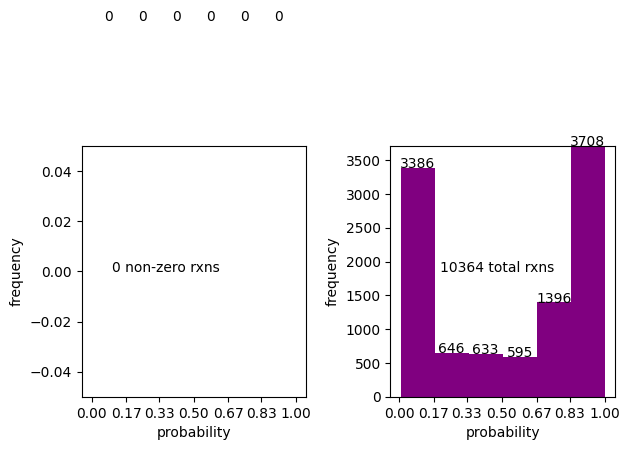

In [ ]:
nonZeroFlux = {ID: flux for ID, flux in fluxes_dic.items() if flux != 0}

from matplotlib.ticker import FormatStrFormatter
from matplotlib import pyplot
fig, axs = pyplot.subplots(1, 2, tight_layout=True)
from re import sub
model_rxns = {model: [rxn.id for rxn in model.reactions] for model in megaModels}
rxnProbabilities = [round(float(model.reactions.get_by_id(sub("(\_c\d)", "_c0", rxnID)).notes["probability"]), 3)
                    for rxnID in nonZeroFlux for model, modelRxnIDs in model_rxns.items() if rxnID in modelRxnIDs]
counts1, bins1, patches1 = axs[0].hist(rxnProbabilities, bins=len(megaModels), color="green")
counts2, bins2, patches2 = axs[1].hist([round(float(rxn.notes["probability"]), 3) for model in megaModels for rxn in model.reactions],
                                        bins=len(megaModels), color="purple")

# Label each bar
for count1, bin1, patch1 in zip(counts1, bins1, patches1):
    # Center the text horizontally on the patch (bar)
    x = bin1 + patch1.get_width() / 2
    # Position the text slightly above the top of the bar
    y = patch1.get_height() + 0.1
    # Use the count as the label
    axs[0].text(x, y, str(int(count1)), ha='center')

for count2, bin2, patch2 in zip(counts2, bins2, patches2):
    # Center the text horizontally on the patch (bar)
    x = bin2 + patch2.get_width() / 2
    # Position the text slightly above the top of the bar
    y = patch2.get_height() + 0.1
    # Use the count as the label
    axs[1].text(x, y, str(int(count2)), ha='center')

# print(max(counts1), len(rxnProbabilities), max(counts2))
# axs[0].set_xlim([0, 1])  ;  axs[1].set_xlim([0, 1])
from numpy import linspace
x_axis_range = [round(x,2) for x in linspace(0, 1, num=len(megaModels)+1)]
axs[0].set_xticks(x_axis_range)  ;  axs[1].set_xticks(x_axis_range)

axs[0].set_ylim([0, max(counts1)]) ;  axs[1].set_ylim([0, max(counts2)])
axs[0].text(.1, max(counts1)/2, f"{len(rxnProbabilities)} non-zero rxns")
axs[1].text(.2, max(counts2)/2, f"{sum(map(len, model_rxns.values()))} total rxns")
axs[0].set_xlabel("probability") ; axs[1].set_xlabel("probability")
axs[0].set_ylabel("frequency")   ; axs[1].set_ylabel("frequency")
# pyplot.show()
fig.savefig("probabilities_histogram.jpg")

# locs, labels = pyplot.xticks()
# print(locs, labels)
# rounded_labels = [round(loc, 3) for loc in locs]
# pyplot.xticks(locs, rounded_labels)
# ax.xaxis.set_major_formatter(FormatStrFormatter('%.4f'))



# from matplotlib import pyplot
# pyplot.bar(nonZeroFlux.keys(), nonZeroFlux.values())
# pyplot.xticks(rotation=90)
# pyplot.show()


In [ ]:
%run ../

constructed_model = build_from_species_models()